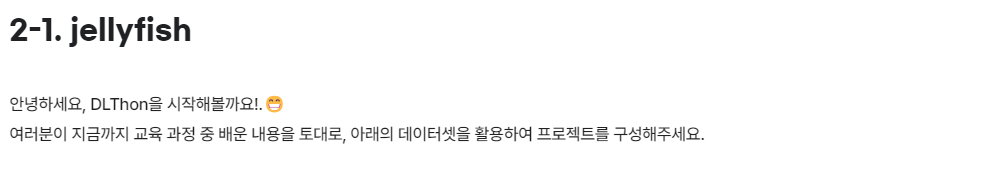

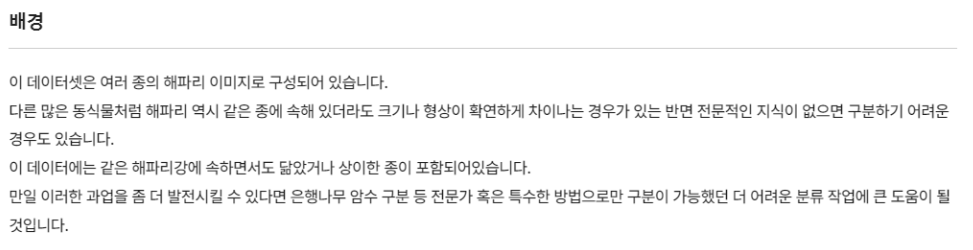

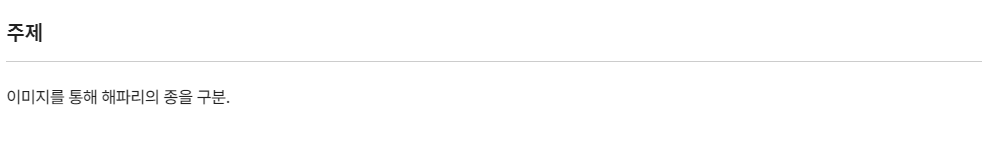

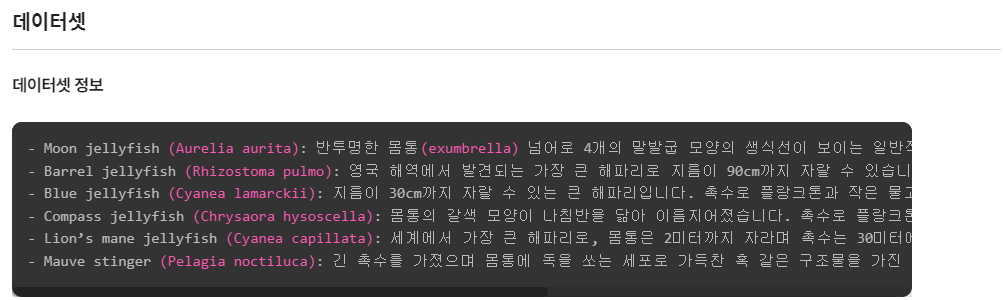

- Moon jellyfish (Aurelia aurita): 반투명한 몸통(exumbrella) 넘어로 4개의 말발굽 모양의 생식선이 보이는 일반적인 해파리입니다. 촉수로 메두사, 플랑크톤, 연체동물을 모아서 잡아먹습니다.
- Barrel jellyfish (Rhizostoma pulmo): 영국 해역에서 발견되는 가장 큰 해파리로 지름이 90cm까지 자랄 수 있습니다. 촉수로 플랑크톤과 작은 물고기를 잡아서 먹습니다.
- Blue jellyfish (Cyanea lamarckii): 지름이 30cm까지 자랄 수 있는 큰 해파리입니다. 촉수로 플랑크톤과 작은 물고기를 잡아먹습니다.
- Compass jellyfish (Chrysaora hysoscella): 몸통의 갈색 모양이 나침반을 닮아 이름지어졌습니다. 촉수로 플랑크톤이나 작은 물고기를 잡아먹습니다.
- Lion’s mane jellyfish (Cyanea capillata): 세계에서 가장 큰 해파리로, 몸통은 2미터까지 자라며 촉수는 30미터에 다다릅니다. 촉수로 플랑크톤과 작은 물고기를 잡아먹습니다.
- Mauve stinger (Pelagia noctiluca): 긴 촉수를 가졌으며 몸통에 독을 쏘는 세포로 가득찬 혹 같은 구조물을 가진 작은 해파리입니다. 작은 해파리나 멍게를 잡아먹습니다.

## 데이터셋은 kaggel에있는 jellyfish데이터셋을 사용
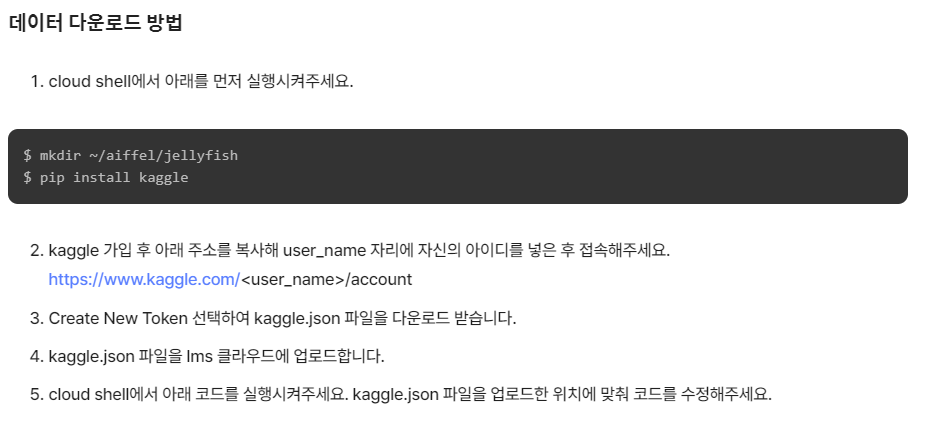
 ### 데이터셋 링크:https://www.kaggle.com/datasets/anshtanwar/jellyfish-types

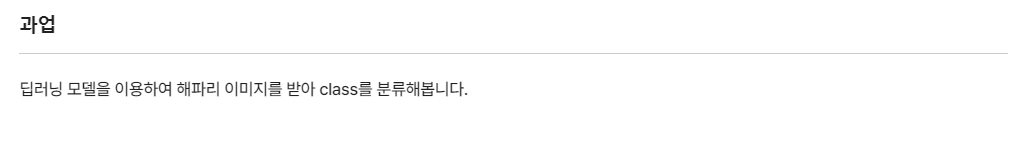

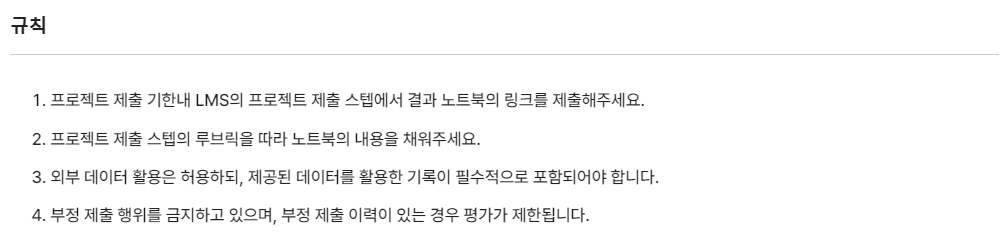

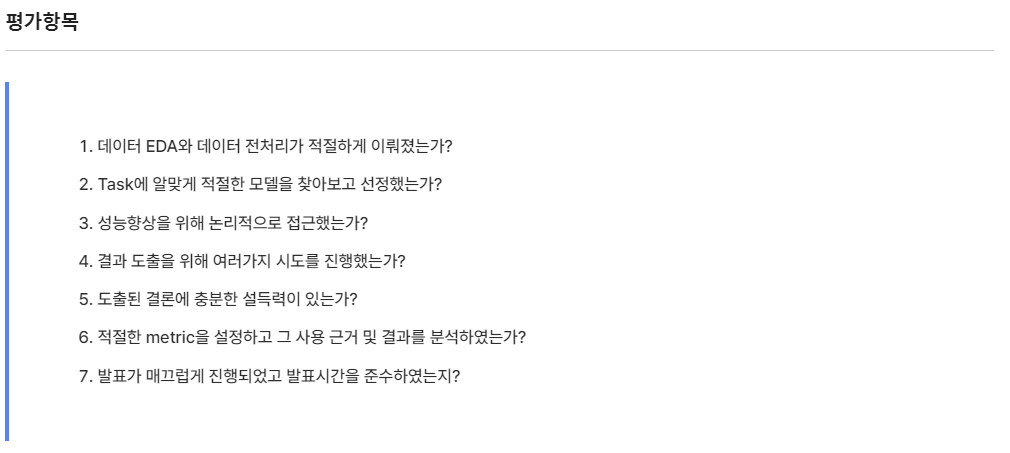

## 각각 모델들의 학습결과를 시각화하고 성능의 지표를 알아보고 저장하기위해 w&b툴을 사용
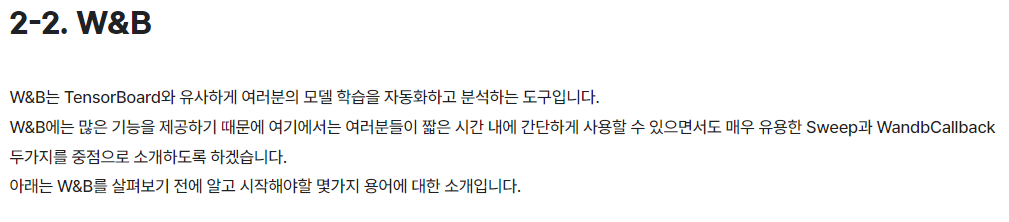

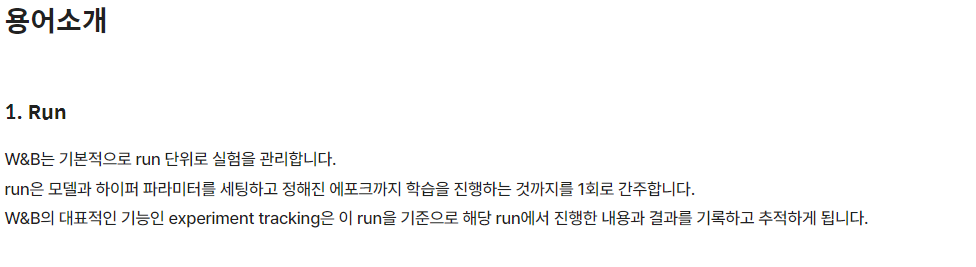
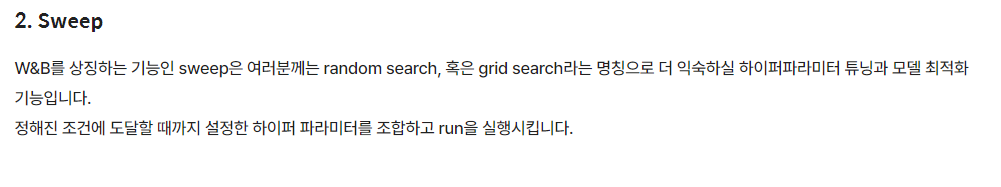
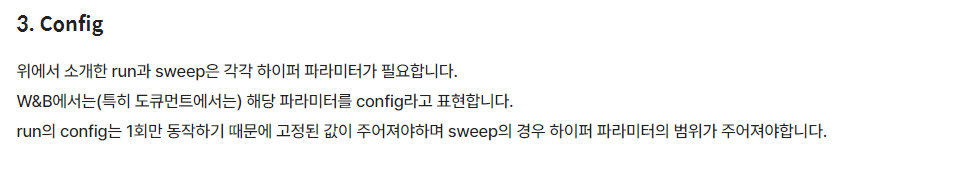

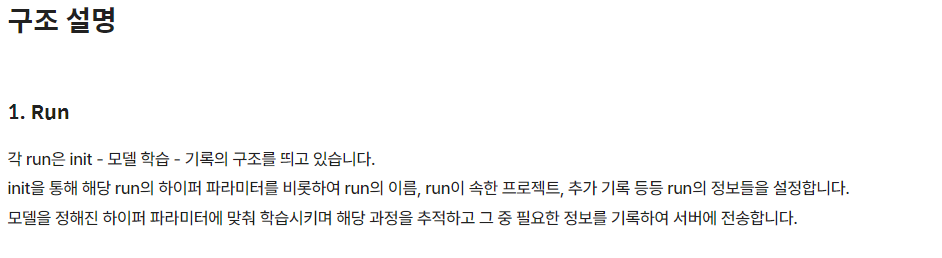
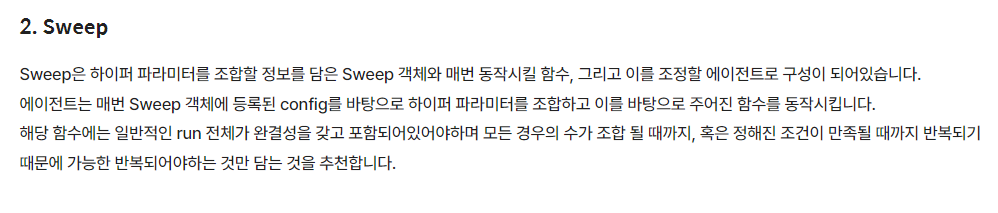
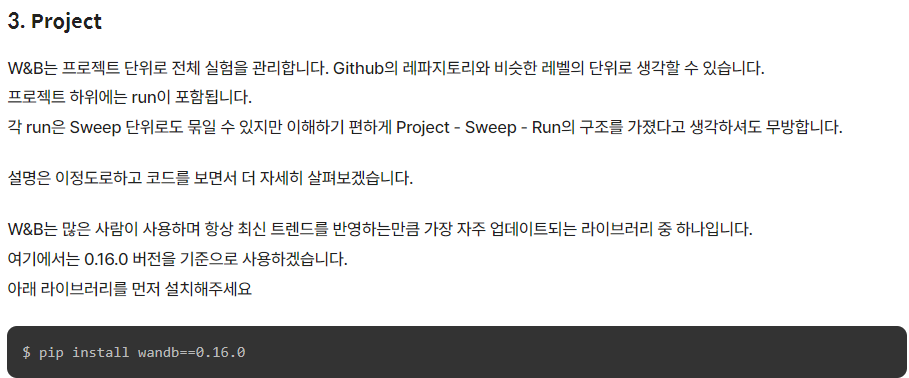


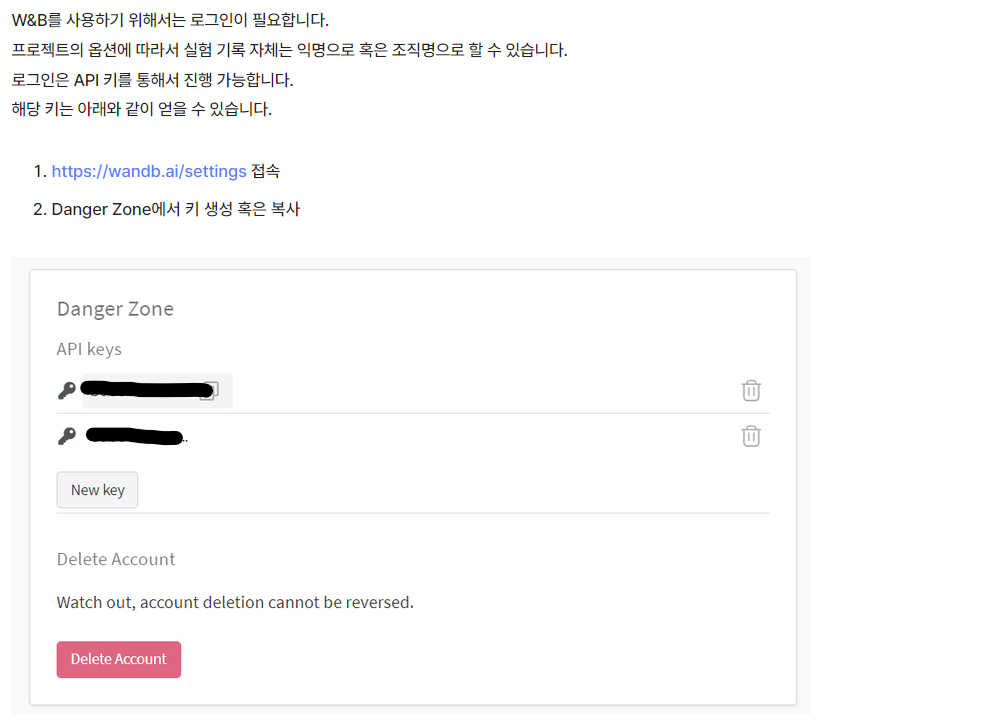
### w&b에서 key를 가져오기:https://wandb.ai/settings

In [ ]:
#본인의 key 
#wandb.login(key ='(본인의 key)')

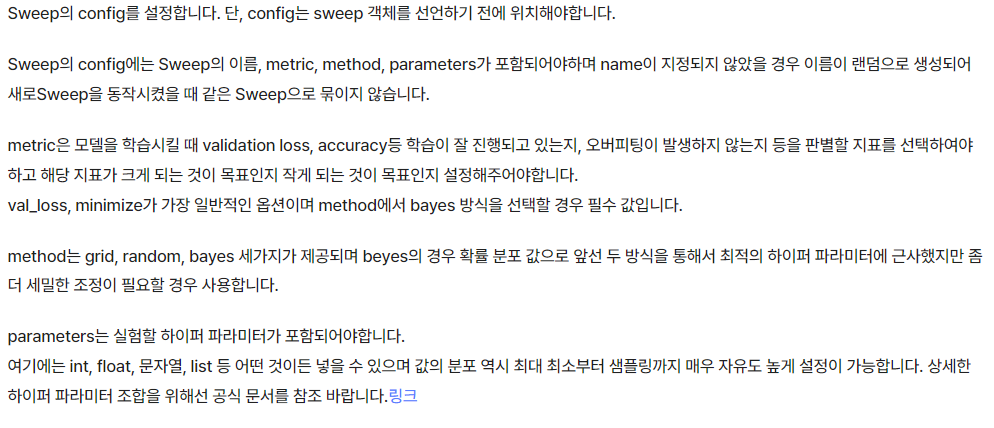
### w&b공식문서:https://docs.wandb.ai/guides/sweeps/define-sweep-configuration#configuration-keys

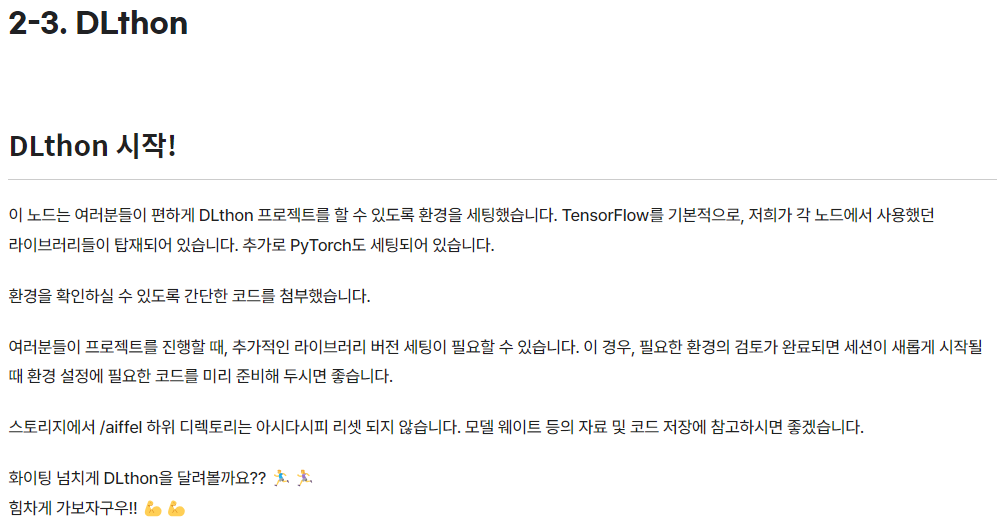

In [ ]:
# 이 코드를 실행해보시면 설치된 라이브러리 버전을 확인해보실 수 있습니다.

#!pip list
#tf.__version__


In [1]:
# GPU로 Tesla T4가 준비돼있습니다.
!nvidia-smi

Thu Jan 11 14:19:58 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

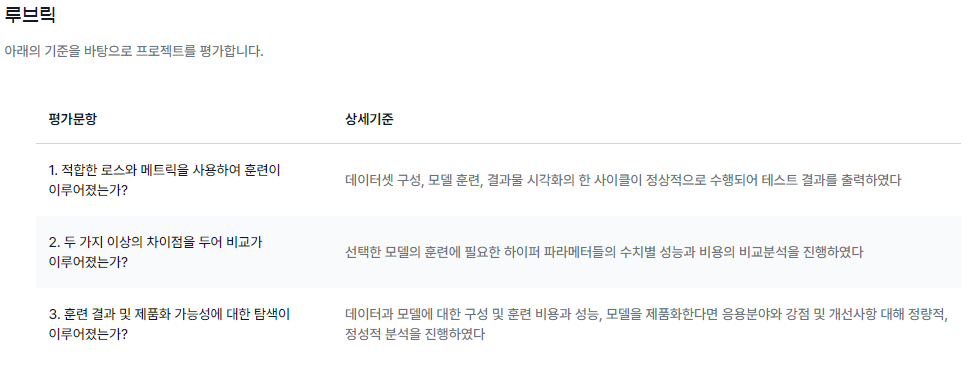


## 깃허브주소에 들어가시면 각자 처음에 진행했던 모델들과 성능을 확인해볼수있습니다.https://github.com/seulwithlove/Aiffel_DLthon.git
#### 슬:DL_THON-cnn_shallowResnet_renet18_seul.ipynb(cnn구조, shallowresnet구조,renet18구조)
#### 양희:DL_THON-cnn_yanghee.ipynb,  DL_THON-cnn_yanghee_2.ipynb(cnn구조)
#### 승환:DL_THON-CNN_seunghwan_2.ipynb,  DL_THON-VGG18_seunghwan_1.ipynb(cnn구조, vgg18구조)
#### 민규: DL_THONresnet18(kernal3x3)_minkyu.ipynb,  DL_THONresnet18(kernal2x2)_minkyu2.ipynb(resnet18구조(커널사이즈변경))

In [2]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 필요한 라이브러리 불러오기
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

#이미지shape은 상의후 224로 통일하기로함(아래의 이유를 근거로224,224의shape이 효과적이라 생각함)
# 1.사전 훈련된 모델 사용 가능: 많은 컴퓨터 비전 모델들은 이미지 크기에 제한이 있습니다. 대부분의 사전 훈련된 모델은 입력 이미지의 크기가 일정하도록 설계되어 있으며, 주로 224x224 크기의 이미지를 사용합니다. 따라서 이미지 크기를 224x224로 설정하면, 사전 훈련된 모델을 쉽게 사용할 수 있습니다.
# 2.계산 효율성: 이미지 크기가 작을수록 모델의 계산량이 줄어듭니다. 따라서 224x224 크기의 이미지를 사용하면, 모델의 추론 속도가 향상될 수 있습니다. 특히 실시간 응용 프로그램이나 리소스 제약이 있는 환경에서 유용합니다.
# 3.일반화 능력: 224x224 크기의 이미지는 일반적으로 객체 인식 및 분류 작업에 충분한 정보를 담고 있습니다. 이미지 크기가 충분히 크면 객체의 세부 사항을 캡처할 수 있고, 작은 객체도 잘 검출할 수 있습니다. 또한, 여러 이미지 크기를 사용하는 것보다 일정한 크기를 사용하는 것이 모델의 일반화 능력을 향상시킬 수 있습니다.
# 4.데이터셋 호환성: 많은 컴퓨터 비전 데이터셋은 이미지 크기에 제한을 두고 있습니다. 따라서 이미지 크기를 224x224로 설정하면, 다양한 데이터셋과 모델을 더 쉽게 호환할 수 있습니다. 또한, 이미지 크기를 통일하여 데이터 전처리 과정을 간소화할 수 있습니다.
# 이러한 이유로 이미지 크기를 224x224로 설정하는 것은 일반적으로 좋은 선택입니다. 
IMAGE_SIZE = [224, 224]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/jellyfish/Train_Test_Valid/Train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/jellyfish/Train_Test_Valid/valid/*/*'
TEST_PATH = ROOT_PATH + '/jellyfish/Train_Test_Valid/test/*/*'

# 초기 batch_size, epochs
BATCH_SIZE = 24
EPOCHS = 30

In [5]:
# 데이터 불러오기
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

# 각 샘플별 갯수를 변수로 할당
train_count = len(train_filenames)
test_count = len(test_filenames)
val_count = len(val_filenames)

print(train_count)
print(test_count)
print(val_count)

900
40
39


In [6]:
# 데이터 시각화
# import matplotlib.pyplot as plt

def visualize_dataset_counts(labels, counts, colors):
    # Create the charts
    plt.figure(figsize=(12, 6))  #그래프크기 사이즈 설정

    # Bar Chart(막대그래프)
    plt.subplot(121)
    plt.bar(labels, counts, color=colors)
    plt.xlabel("Dataset Type")
    plt.ylabel("Number of Images")
    plt.title("Dataset Counts Distribution")
    plt.grid(True)  # Add gridlines for visual reference(그래프 격자추가)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility(각 그래프에해당하는x축 레이블 회전)

    # Create the pie chart(원형그래프)
    plt.subplot(122)  # Position the pie chart in the second subplot
    plt.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
    plt.title("Dataset Ratio in Pie Chart")
    plt.axis("equal")  # Ensure a circular pie chart(원형으로 설정)

    # Adjust layout for better visualization
    plt.tight_layout()  # Prevent overlapping elements(그래프가 서로 간격을 맞춰서 보여줌)

    # Display the combined chart
    plt.show()

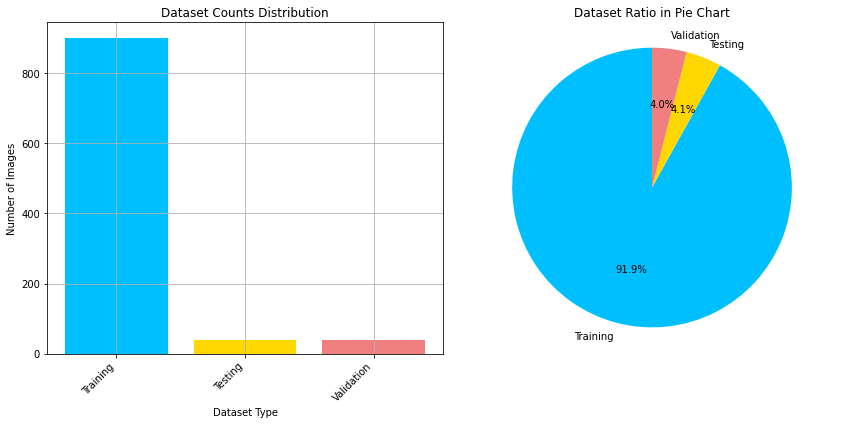

In [7]:
labels = ["Training", "Testing", "Validation"]
counts = [train_count, test_count, val_count]
colors = ["deepskyblue", "gold", "lightcoral"]

visualize_dataset_counts(labels, counts, colors)

# 데이터 다시 나누기

In [8]:
import random, math

# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

## 여기 추가
train_count = len(train_filenames)
val_count = len(val_filenames)

print(train_count)
print(val_count)

751
188


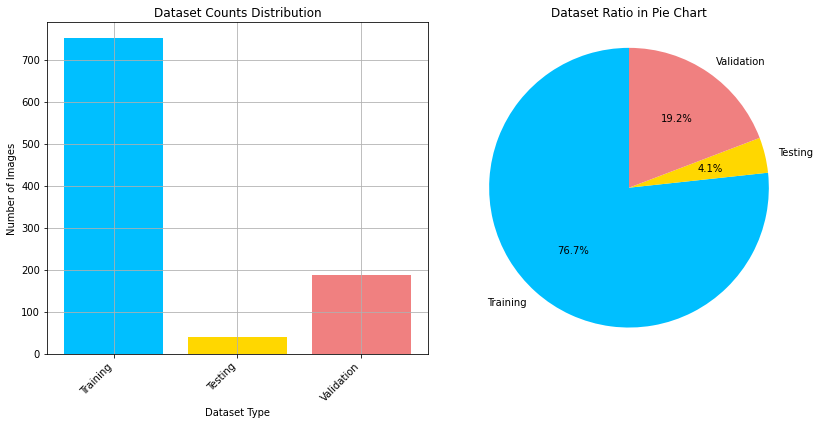

In [9]:
# 나눠진 데이터 다시 시각화
labels = ["Training", "Testing", "Validation"]
counts = [train_count, test_count, val_count]
colors = ["deepskyblue", "gold", "lightcoral"]

visualize_dataset_counts(labels, counts, colors)

# 미니 배치 사용

In [10]:
# tf.data instance 생성
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [11]:
# Train 데이터셋, validation 데이터셋 개수 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 751
Validating images count: 188


# 데이터 전처리
- 이미지 리사이즈

In [12]:
# 데이터 레이블 생성
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    #조건문으로 파일경로에 해당하는 부분에서 이름부분에따라 데이터가 나눠져있기때문에 이름을기준으로 데이터 라벨링하는작업
    if parts[-2] == "barrel_jellyfish":
        return 0   # barrel_jellyfish이면 라벨 0

    elif parts[-2] == "blue_jellyfish":
        return 1   # blue_jellyfish이면 라벨 1

    elif parts[-2] == "compass_jellyfish":
        return 2   # compass_jellyfish이면 라벨 2

    elif parts[-2] == "lions_mane_jellyfish":
        return 3   # lions_mane_jellyfish이면 라벨 3

    elif parts[-2] == "mauve_stinger_jellyfish":
        return 4   # mauve_stinger_jellyfish이면 라벨 4

    else :
        return 5  # Moon_jellyfish이면 라벨 5

In [13]:
# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

In [14]:
# train 데이터 셋과 validation 데이터 셋을 생성
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [15]:
# 이미지 리사이즈 결과, 레이블 확인
for image, label in train_ds.take(1): # 하나의 데이터만 가져온다
    print("Image shape: ", image.numpy().shape)
    print("Image type:", image.dtype)
    print("Label: ", label.numpy())


Image shape:  (224, 224, 3)
Image type: <dtype: 'float32'>
Label:  3


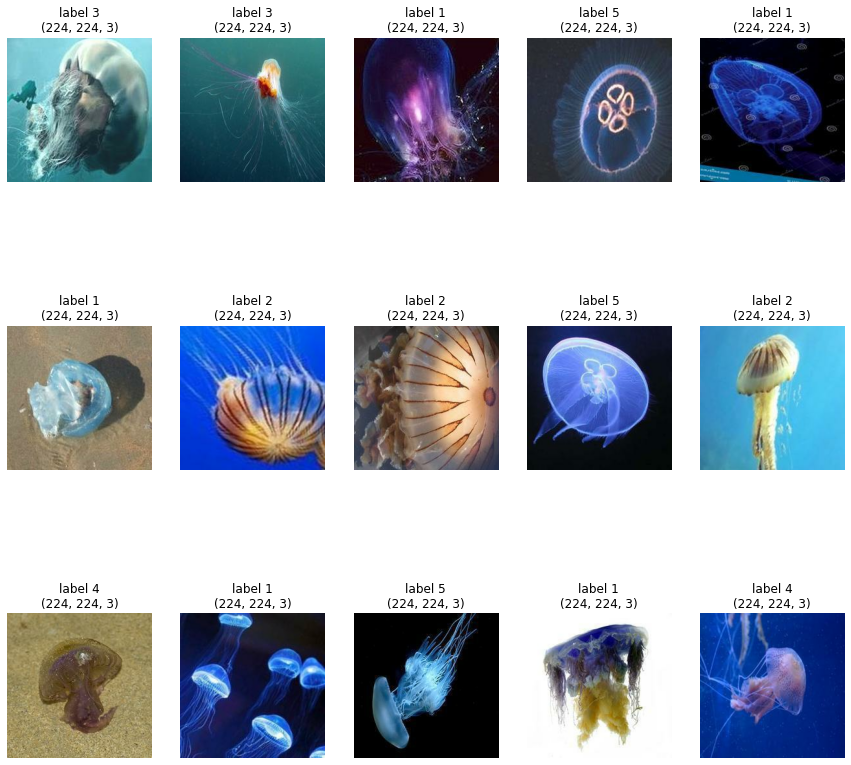

In [16]:
# 데이터셋 샘플 시각화

def show_dataset_samples(dataset, num_samples=15):
    plt.figure(figsize=(15, 15))
    
    for idx, (img, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(3, 5, idx + 1)
        # img = (img * 255) # 픽셀 정규화 했을경우 두 코드 사용 : 원래 픽셀값으로 돌려줌
        # img = tf.image.convert_image_dtype(img, tf.float32) 
        plt.imshow(img)
        plt.title(f'label {label}\n{img.shape}')
        plt.axis('off')

# Usage example with your training dataset
show_dataset_samples(train_ds)
plt.show()  # Display the figure


In [17]:
# augmentation function
def augment(img, label):
    # Randomly flip left or right
    img = tf.image.random_flip_left_right(img)
       
    img = tf.image.random_saturation(img, lower=0.5, upper=1.5)

    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    
    return img,label

In [18]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.map(augment, num_parallel_calls=AUTOTUNE)
    
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

In [19]:
# train, val 배치데이터 만들기
train_bat = prepare_for_training(train_ds)
val_bat = prepare_for_training(val_ds)

In [20]:
# test dataset 만들기
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_bat = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

40


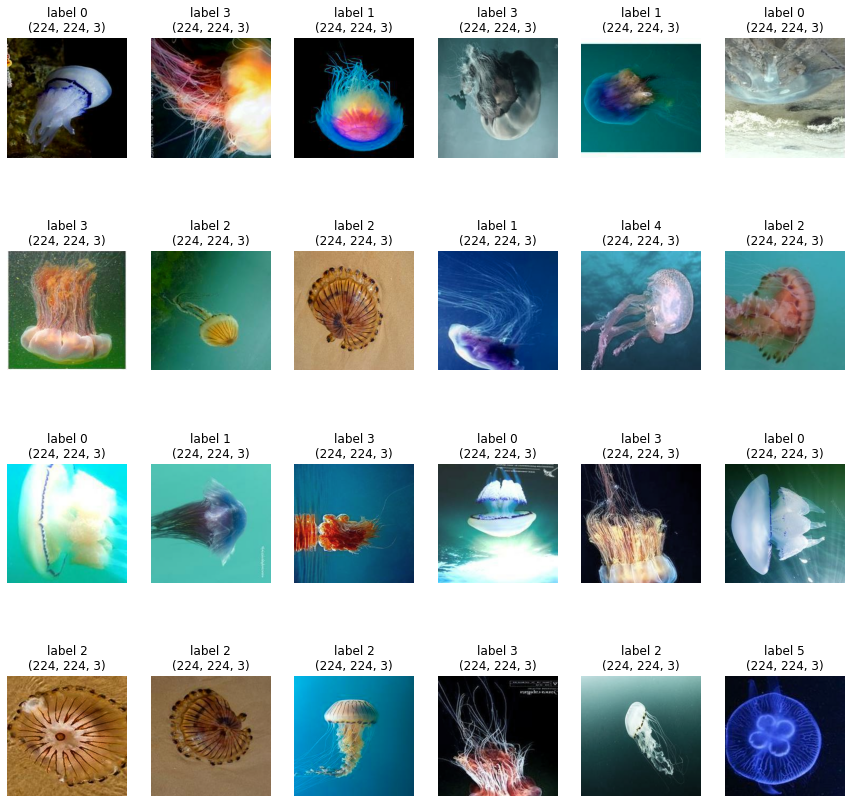

In [21]:
# 학습용 데이터 시각화 - augementation 제대로 처리되었는지 show_batch()로 확인

# 이미지 배치를 입력하면 여러 장의 이미지를 라벨과 함께 보여줍니다. 


def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 15))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4, math.ceil(BATCH_SIZE/4), n+1)
        # math.ceil(BATCH_SIZE/4)는 배치 크기를 4로 나눈 결과를 올림하여 필요한 행의 수를 계산
        # n이 아닌 n+1인 이유 : 인덱스가 0부터 시작하므로 1번째 이미지는 n+1이 되어야 합니다.
        plt.imshow(image_batch[n])   # 현재 서브플롯에 이미지를 표시
        
        # 현재 이미지에 대한 라벨을 가져오기
        label = label_batch[n].numpy()
        
        # 라벨을 기반으로 타이틀 지정
        plt.title(f'label {label}\n{image_batch[n].shape}')
        plt.axis("off")

# 훈련 데이터셋으로부터 하나의 배치를 가져오기 - iter(train_ds)로부터 next함수를 사용하여 다음 배치를 추출
image_batch, label_batch = next(iter(train_bat))
# show_batch 함수를 사용하여 훈련 데이터셋의 일부 이미지를 시각화
show_batch(image_batch.numpy(), label_batch)

In [22]:
# 이미지 Resize가 잘 되었는지, 라벨이 잘 들어가있는지 확인하기

for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Data type: ", image.dtype)
    print("Label: ", label.numpy())
    
# train_ds.take(1)은 하나의 데이터만 가져온다는 의미

Image shape:  (224, 224, 3)
Data type:  <dtype: 'float32'>
Label:  3


## Base Model
- learning rate = 0.00003
- batch size = 24
- kernel = (2,2)   
- Dence_filter = 16
- test accuracy(%) = 65
- optimizer = rmsprop
- epochs = 37

In [83]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [84]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [85]:
# 키 입력
wandb.login(key = "(본인의 키를 적으시면됩니다)")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [86]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [87]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (2, 2),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [88]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")
# sweep_id = wandb.sweep(sweep_config,
#                        entity = "aiffel_7th",#팀이름
#                        project = "Jellyfish")#팀안에 프로젝트이름

Create sweep with ID: ojddq3p6
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/ojddq3p6


In [89]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=10)# 카운트지정하면 학습을 10번실행해준다.

wandb: Agent Starting Run: twd5ou8n with config:
wandb: 	epoch: 44
wandb: 	learning_rate: 9.152722709024844e-05


Epoch 1/44
31/31 [==============================] - 4s 69ms/step - loss: 1.9574 - accuracy: 0.1962 - val_loss: 1.7773 - val_accuracy: 0.2202
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 2/44
31/31 [==============================] - 2s 65ms/step - loss: 1.7285 - accuracy: 0.2406 - val_loss: 1.7742 - val_accuracy: 0.1905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 3/44
31/31 [==============================] - 2s 70ms/step - loss: 1.7197 - accuracy: 0.2366 - val_loss: 1.7339 - val_accuracy: 0.2202
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 4/44
31/31 [==============================] - 2s 67ms/step - loss: 1.7056 - accuracy: 0.2500 - val_loss: 1.7399 - val_accuracy: 0.1964
Epoch 5/44
31/31 [==============================] - 2s 65ms/step - loss: 1.6725 - accuracy: 0.2594 - val_loss: 1.7256 - val_accuracy: 0.2560
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 6/44
31/31 [==============================] - 2s 64ms/step - loss: 1.6672 - accuracy: 0.2702 - val_loss: 1.7320 - val_accuracy: 0.2202
Epoch 7/44
31/31 [==============================] - 2s 74ms/step - loss: 1.6596 - accuracy: 0.2796 - val_loss: 1.7268 - val_accuracy: 0.1905
Epoch 8/44
31/31 [==============================] - 2s 64ms/step - loss: 1.6343 - accuracy: 0.2823 - val_loss: 1.7061 - val_accuracy: 0.2024
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 9/44
31/31 [==============================] - 2s 64ms/step - loss: 1.6339 - accuracy: 0.2702 - val_loss: 1.7089 - val_accuracy: 0.2560
Epoch 10/44
31/31 [==============================] - 2s 67ms/step - loss: 1.6107 - accuracy: 0.2930 - val_loss: 1.7262 - val_accuracy: 0.2262
Epoch 11/44
31/31 [==============================] - 2s 64ms/step - loss: 1.5953 - accuracy: 0.2863 - val_loss: 1.6850 - val_accuracy: 0.2560
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 12/44
31/31 [==============================] - 2s 63ms/step - loss: 1.6001 - accuracy: 0.2930 - val_loss: 1.6804 - val_accuracy: 0.2738
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 13/44
31/31 [==============================] - 2s 63ms/step - loss: 1.5698 - accuracy: 0.3145 - val_loss: 1.6817 - val_accuracy: 0.2321
Epoch 14/44
31/31 [==============================] - 2s 65ms/step - loss: 1.5980 - accuracy: 0.2917 - val_loss: 1.6688 - val_accuracy: 0.2381- loss: 1.6004 - accuracy
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 15/44
31/31 [==============================] - 2s 71ms/step - loss: 1.5570 - accuracy: 0.3280 - val_loss: 1.7470 - val_accuracy: 0.3036
Epoch 16/44
31/31 [==============================] - 2s 61ms/step - loss: 1.5651 - accuracy: 0.3320 - val_loss: 1.6415 - val_accuracy: 0.2798
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 17/44
31/31 [==============================] - 2s 67ms/step - loss: 1.5303 - accuracy: 0.3535 - val_loss: 1.6494 - val_accuracy: 0.2857
Epoch 18/44
31/31 [==============================] - 2s 61ms/step - loss: 1.5374 - accuracy: 0.3535 - val_loss: 1.6791 - val_accuracy: 0.2679
Epoch 19/44
31/31 [==============================] - 2s 62ms/step - loss: 1.5270 - accuracy: 0.3817 - val_loss: 1.6217 - val_accuracy: 0.3036
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 20/44
31/31 [==============================] - 2s 62ms/step - loss: 1.4772 - accuracy: 0.3871 - val_loss: 1.7079 - val_accuracy: 0.3214
Epoch 21/44
31/31 [==============================] - 2s 63ms/step - loss: 1.4951 - accuracy: 0.3965 - val_loss: 1.6367 - val_accuracy: 0.3333
Epoch 22/44
31/31 [==============================] - 2s 62ms/step - loss: 1.5075 - accuracy: 0.3669 - val_loss: 1.6092 - val_accuracy: 0.3512
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 23/44
31/31 [==============================] - 2s 62ms/step - loss: 1.4355 - accuracy: 0.4301 - val_loss: 1.6892 - val_accuracy: 0.3333
Epoch 24/44
31/31 [==============================] - 2s 63ms/step - loss: 1.4554 - accuracy: 0.3911 - val_loss: 1.5044 - val_accuracy: 0.3512
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 25/44
31/31 [==============================] - 2s 65ms/step - loss: 1.3486 - accuracy: 0.4624 - val_loss: 1.4802 - val_accuracy: 0.3810
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 26/44
31/31 [==============================] - 2s 61ms/step - loss: 1.3556 - accuracy: 0.4530 - val_loss: 1.5846 - val_accuracy: 0.3274
Epoch 27/44
31/31 [==============================] - 2s 65ms/step - loss: 1.3007 - accuracy: 0.4610 - val_loss: 1.4953 - val_accuracy: 0.3988
Epoch 28/44
31/31 [==============================] - 2s 62ms/step - loss: 1.3370 - accuracy: 0.4422 - val_loss: 1.4655 - val_accuracy: 0.4107
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 29/44
31/31 [==============================] - 2s 63ms/step - loss: 1.2646 - accuracy: 0.5108 - val_loss: 1.5466 - val_accuracy: 0.3452
Epoch 30/44
31/31 [==============================] - 2s 63ms/step - loss: 1.2949 - accuracy: 0.4866 - val_loss: 1.4617 - val_accuracy: 0.3869
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 31/44
31/31 [==============================] - 2s 62ms/step - loss: 1.2342 - accuracy: 0.5161 - val_loss: 1.4403 - val_accuracy: 0.3988
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 32/44
31/31 [==============================] - 2s 61ms/step - loss: 1.2430 - accuracy: 0.4960 - val_loss: 1.4972 - val_accuracy: 0.3929
Epoch 33/44
31/31 [==============================] - 2s 62ms/step - loss: 1.2460 - accuracy: 0.5108 - val_loss: 1.4296 - val_accuracy: 0.4286
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 34/44
31/31 [==============================] - 2s 67ms/step - loss: 1.2002 - accuracy: 0.5148 - val_loss: 1.4170 - val_accuracy: 0.4345
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 35/44
31/31 [==============================] - 2s 65ms/step - loss: 1.2248 - accuracy: 0.5161 - val_loss: 1.4519 - val_accuracy: 0.4524
Epoch 36/44
31/31 [==============================] - 2s 61ms/step - loss: 1.1647 - accuracy: 0.5444 - val_loss: 1.3417 - val_accuracy: 0.4464
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 37/44
31/31 [==============================] - 2s 65ms/step - loss: 1.1944 - accuracy: 0.5323 - val_loss: 1.3645 - val_accuracy: 0.4524
Epoch 38/44
31/31 [==============================] - 2s 65ms/step - loss: 1.1379 - accuracy: 0.5538 - val_loss: 1.4113 - val_accuracy: 0.4226
Epoch 39/44
31/31 [==============================] - 2s 65ms/step - loss: 1.1729 - accuracy: 0.5403 - val_loss: 1.3134 - val_accuracy: 0.5238
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 40/44
31/31 [==============================] - 2s 62ms/step - loss: 1.1252 - accuracy: 0.5753 - val_loss: 1.2540 - val_accuracy: 0.4762
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131415-twd5ou8n/files/model-best)... Done. 0.0s


Epoch 41/44
31/31 [==============================] - 2s 58ms/step - loss: 1.1197 - accuracy: 0.5417 - val_loss: 1.3448 - val_accuracy: 0.4524
Epoch 42/44
31/31 [==============================] - 2s 70ms/step - loss: 1.1313 - accuracy: 0.5565 - val_loss: 1.3265 - val_accuracy: 0.4821
Epoch 43/44
31/31 [==============================] - 2s 60ms/step - loss: 1.1092 - accuracy: 0.5605 - val_loss: 1.3578 - val_accuracy: 0.4881
Epoch 44/44
31/31 [==============================] - 2s 68ms/step - loss: 1.1081 - accuracy: 0.5551 - val_loss: 1.4716 - val_accuracy: 0.4583
2/2 - 0s - loss: 1.4352 - accuracy: 0.4000


wandb: Agent Starting Run: 2p3pe2dt with config:
wandb: 	epoch: 50
wandb: 	learning_rate: 7.068927307515532e-05


Epoch 1/50
31/31 [==============================] - 4s 67ms/step - loss: 1.1033 - accuracy: 0.5538 - val_loss: 1.3391 - val_accuracy: 0.4762
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 2/50
31/31 [==============================] - 2s 67ms/step - loss: 1.0442 - accuracy: 0.6156 - val_loss: 1.3476 - val_accuracy: 0.5298
Epoch 3/50
31/31 [==============================] - 2s 68ms/step - loss: 1.0231 - accuracy: 0.6075 - val_loss: 1.2724 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 4/50
31/31 [==============================] - 2s 78ms/step - loss: 1.0442 - accuracy: 0.6048 - val_loss: 1.2189 - val_accuracy: 0.4821
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 5/50
31/31 [==============================] - 2s 64ms/step - loss: 0.9944 - accuracy: 0.6075 - val_loss: 1.3655 - val_accuracy: 0.4286
Epoch 6/50
31/31 [==============================] - 2s 76ms/step - loss: 1.0247 - accuracy: 0.5941 - val_loss: 1.2245 - val_accuracy: 0.5179
Epoch 7/50
31/31 [==============================] - 2s 63ms/step - loss: 1.0025 - accuracy: 0.6263 - val_loss: 1.2585 - val_accuracy: 0.5000
Epoch 8/50
31/31 [==============================] - 2s 64ms/step - loss: 0.9796 - accuracy: 0.6169 - val_loss: 1.2663 - val_accuracy: 0.5000
Epoch 9/50
31/31 [==============================] - 2s 61ms/step - loss: 0.9571 - accuracy: 0.6411 - val_loss: 1.2070 - val_accuracy: 0.5238
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 10/50
31/31 [==============================] - 2s 65ms/step - loss: 0.9434 - accuracy: 0.6290 - val_loss: 1.2561 - val_accuracy: 0.5179
Epoch 11/50
31/31 [==============================] - 2s 60ms/step - loss: 0.9731 - accuracy: 0.6317 - val_loss: 1.2983 - val_accuracy: 0.4940
Epoch 12/50
31/31 [==============================] - 2s 65ms/step - loss: 0.9621 - accuracy: 0.6129 - val_loss: 1.1855 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 13/50
31/31 [==============================] - 2s 68ms/step - loss: 0.9608 - accuracy: 0.6344 - val_loss: 1.2843 - val_accuracy: 0.5060
Epoch 14/50
31/31 [==============================] - 2s 61ms/step - loss: 0.9274 - accuracy: 0.6505 - val_loss: 1.2284 - val_accuracy: 0.5536
Epoch 15/50
31/31 [==============================] - 2s 64ms/step - loss: 0.8962 - accuracy: 0.6559 - val_loss: 1.1542 - val_accuracy: 0.5476
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 16/50
31/31 [==============================] - 2s 61ms/step - loss: 0.9088 - accuracy: 0.6519 - val_loss: 1.1880 - val_accuracy: 0.5417
Epoch 17/50
31/31 [==============================] - 2s 63ms/step - loss: 0.9145 - accuracy: 0.6640 - val_loss: 1.2443 - val_accuracy: 0.4821
Epoch 18/50
31/31 [==============================] - 2s 60ms/step - loss: 0.8660 - accuracy: 0.6788 - val_loss: 1.1985 - val_accuracy: 0.5179
Epoch 19/50
31/31 [==============================] - 2s 67ms/step - loss: 0.8957 - accuracy: 0.6868 - val_loss: 1.2123 - val_accuracy: 0.5119
Epoch 20/50
31/31 [==============================] - 2s 60ms/step - loss: 0.8930 - accuracy: 0.6505 - val_loss: 1.2322 - val_accuracy: 0.5060
Epoch 21/50
31/31 [==============================] - 2s 65ms/step - loss: 0.8638 - accuracy: 0.6573 - val_loss: 1.1921 - val_accuracy: 0.5536
Epoch 22/50
31/31 [==============================] - 2s 58ms/step - loss: 0.8417 - accuracy: 0.6989 - val_loss: 1.2167 - val_accuracy: 0.5298
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 24/50
31/31 [==============================] - 2s 60ms/step - loss: 0.8604 - accuracy: 0.6747 - val_loss: 1.1621 - val_accuracy: 0.5179
Epoch 25/50
31/31 [==============================] - 2s 61ms/step - loss: 0.8476 - accuracy: 0.6922 - val_loss: 1.1551 - val_accuracy: 0.5536
Epoch 26/50
31/31 [==============================] - 2s 63ms/step - loss: 0.7919 - accuracy: 0.7191 - val_loss: 1.2269 - val_accuracy: 0.5179
Epoch 27/50
31/31 [==============================] - 2s 65ms/step - loss: 0.8049 - accuracy: 0.6868 - val_loss: 1.1665 - val_accuracy: 0.5060
Epoch 28/50
31/31 [==============================] - 2s 58ms/step - loss: 0.8272 - accuracy: 0.6909 - val_loss: 1.1803 - val_accuracy: 0.5417
Epoch 29/50
31/31 [==============================] - 2s 66ms/step - loss: 0.7949 - accuracy: 0.7177 - val_loss: 1.1502 - val_accuracy: 0.5357
Epoch 30/50
31/31 [==============================] - 2s 63ms/step - loss: 0.7536 - accuracy: 0.7298 - val_loss: 1.1676 - val_accuracy: 0.5595
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 32/50
31/31 [==============================] - 2s 65ms/step - loss: 0.7732 - accuracy: 0.7285 - val_loss: 1.1189 - val_accuracy: 0.5417
Epoch 33/50
31/31 [==============================] - 2s 60ms/step - loss: 0.7698 - accuracy: 0.7379 - val_loss: 1.0660 - val_accuracy: 0.6250
Epoch 34/50
31/31 [==============================] - 2s 65ms/step - loss: 0.7610 - accuracy: 0.7124 - val_loss: 1.1316 - val_accuracy: 0.5952
Epoch 35/50
31/31 [==============================] - 2s 59ms/step - loss: 0.7417 - accuracy: 0.7419 - val_loss: 1.1586 - val_accuracy: 0.5595
Epoch 36/50
31/31 [==============================] - 2s 72ms/step - loss: 0.7636 - accuracy: 0.7177 - val_loss: 1.1581 - val_accuracy: 0.5357
Epoch 37/50
31/31 [==============================] - 2s 63ms/step - loss: 0.7261 - accuracy: 0.7379 - val_loss: 1.1605 - val_accuracy: 0.5476
Epoch 38/50
31/31 [==============================] - 2s 58ms/step - loss: 0.6971 - accuracy: 0.7446 - val_loss: 1.2194 - val_accuracy: 0.5179
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131647-2p3pe2dt/files/model-best)... Done. 0.0s


Epoch 50/50
31/31 [==============================] - 2s 61ms/step - loss: 0.6219 - accuracy: 0.7728 - val_loss: 1.0381 - val_accuracy: 0.6071
2/2 - 0s - loss: 1.1123 - accuracy: 0.6000


wandb: Agent Starting Run: oec2dhgo with config:
wandb: 	epoch: 38
wandb: 	learning_rate: 8.118943896685032e-05


Epoch 1/38
31/31 [==============================] - 4s 70ms/step - loss: 0.6972 - accuracy: 0.7487 - val_loss: 1.0995 - val_accuracy: 0.6012
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best)... Done. 0.0s


Epoch 2/38
31/31 [==============================] - 2s 64ms/step - loss: 0.5959 - accuracy: 0.7823 - val_loss: 1.1375 - val_accuracy: 0.5119
Epoch 3/38
31/31 [==============================] - 2s 74ms/step - loss: 0.6103 - accuracy: 0.7876 - val_loss: 1.0392 - val_accuracy: 0.6131
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best)... Done. 0.0s


Epoch 4/38
31/31 [==============================] - 2s 65ms/step - loss: 0.5934 - accuracy: 0.7836 - val_loss: 1.1791 - val_accuracy: 0.5476
Epoch 5/38
31/31 [==============================] - 2s 64ms/step - loss: 0.6144 - accuracy: 0.8065 - val_loss: 1.0731 - val_accuracy: 0.5714
Epoch 6/38
31/31 [==============================] - 2s 64ms/step - loss: 0.6029 - accuracy: 0.7836 - val_loss: 0.9730 - val_accuracy: 0.6250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best)... Done. 0.0s


Epoch 7/38
31/31 [==============================] - 2s 63ms/step - loss: 0.5702 - accuracy: 0.8132 - val_loss: 1.0278 - val_accuracy: 0.5774
Epoch 8/38
31/31 [==============================] - 2s 65ms/step - loss: 0.5717 - accuracy: 0.8212 - val_loss: 1.1671 - val_accuracy: 0.5952
Epoch 9/38
31/31 [==============================] - 2s 63ms/step - loss: 0.5631 - accuracy: 0.7984 - val_loss: 1.0235 - val_accuracy: 0.6369
Epoch 10/38
31/31 [==============================] - 2s 61ms/step - loss: 0.5652 - accuracy: 0.8051 - val_loss: 0.9775 - val_accuracy: 0.6548
Epoch 11/38
31/31 [==============================] - 2s 60ms/step - loss: 0.5524 - accuracy: 0.8132 - val_loss: 1.0664 - val_accuracy: 0.6071
Epoch 12/38
31/31 [==============================] - 2s 65ms/step - loss: 0.5165 - accuracy: 0.8320 - val_loss: 1.1145 - val_accuracy: 0.5774
Epoch 13/38
31/31 [==============================] - 2s 61ms/step - loss: 0.5377 - accuracy: 0.8185 - val_loss: 1.0412 - val_accuracy: 0.6071
Epoch 14/

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_131909-oec2dhgo/files/model-best)... Done. 0.0s


Epoch 34/38
31/31 [==============================] - 2s 62ms/step - loss: 0.4313 - accuracy: 0.8522 - val_loss: 0.9937 - val_accuracy: 0.6548
Epoch 35/38
31/31 [==============================] - 2s 61ms/step - loss: 0.4135 - accuracy: 0.8737 - val_loss: 1.0334 - val_accuracy: 0.6369
Epoch 36/38
31/31 [==============================] - 2s 63ms/step - loss: 0.3864 - accuracy: 0.8790 - val_loss: 1.1692 - val_accuracy: 0.6131
Epoch 37/38
31/31 [==============================] - 2s 62ms/step - loss: 0.3655 - accuracy: 0.8871 - val_loss: 1.1710 - val_accuracy: 0.5952
Epoch 38/38
31/31 [==============================] - 2s 65ms/step - loss: 0.4073 - accuracy: 0.8696 - val_loss: 1.0242 - val_accuracy: 0.6429
2/2 - 0s - loss: 1.1880 - accuracy: 0.6000


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zy8m7ula with config:
wandb: 	epoch: 35
wandb: 	learning_rate: 9.906541044669067e-05


Epoch 1/35
31/31 [==============================] - 4s 70ms/step - loss: 0.4622 - accuracy: 0.8374 - val_loss: 0.9947 - val_accuracy: 0.6429
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132151-zy8m7ula/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132151-zy8m7ula/files/model-best)... Done. 0.0s


Epoch 2/35
31/31 [==============================] - 2s 66ms/step - loss: 0.4284 - accuracy: 0.8454 - val_loss: 1.1449 - val_accuracy: 0.5952
Epoch 3/35
31/31 [==============================] - 2s 69ms/step - loss: 0.4106 - accuracy: 0.8589 - val_loss: 1.0336 - val_accuracy: 0.6607
Epoch 4/35
31/31 [==============================] - 2s 65ms/step - loss: 0.4130 - accuracy: 0.8629 - val_loss: 1.2392 - val_accuracy: 0.6250
Epoch 5/35
31/31 [==============================] - 2s 70ms/step - loss: 0.3948 - accuracy: 0.8710 - val_loss: 1.0040 - val_accuracy: 0.6488
Epoch 6/35
31/31 [==============================] - 2s 62ms/step - loss: 0.3793 - accuracy: 0.8750 - val_loss: 1.1437 - val_accuracy: 0.5893
Epoch 7/35
31/31 [==============================] - 2s 62ms/step - loss: 0.3699 - accuracy: 0.8858 - val_loss: 1.1151 - val_accuracy: 0.6190
Epoch 8/35
31/31 [==============================] - 2s 64ms/step - loss: 0.3814 - accuracy: 0.8858 - val_loss: 1.0129 - val_accuracy: 0.6548
Epoch 9/35
31

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132151-zy8m7ula/files/model-best)... Done. 0.0s


Epoch 22/35
31/31 [==============================] - 2s 67ms/step - loss: 0.3241 - accuracy: 0.8898 - val_loss: 1.0629 - val_accuracy: 0.6845
Epoch 23/35
31/31 [==============================] - 2s 61ms/step - loss: 0.3220 - accuracy: 0.9005 - val_loss: 1.1327 - val_accuracy: 0.5893
Epoch 24/35
31/31 [==============================] - 2s 67ms/step - loss: 0.2982 - accuracy: 0.9059 - val_loss: 1.1914 - val_accuracy: 0.6190
Epoch 25/35
31/31 [==============================] - 2s 62ms/step - loss: 0.2971 - accuracy: 0.9046 - val_loss: 0.8808 - val_accuracy: 0.6905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132151-zy8m7ula/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132151-zy8m7ula/files/model-best)... Done. 0.0s


Epoch 26/35
31/31 [==============================] - 2s 66ms/step - loss: 0.2831 - accuracy: 0.9126 - val_loss: 1.2362 - val_accuracy: 0.6310
Epoch 27/35
31/31 [==============================] - 2s 71ms/step - loss: 0.2719 - accuracy: 0.9220 - val_loss: 1.1963 - val_accuracy: 0.6250
Epoch 28/35
31/31 [==============================] - 3s 85ms/step - loss: 0.2841 - accuracy: 0.9126 - val_loss: 1.0174 - val_accuracy: 0.6845
Epoch 29/35
31/31 [==============================] - 2s 61ms/step - loss: 0.2582 - accuracy: 0.9180 - val_loss: 1.1777 - val_accuracy: 0.5893
Epoch 30/35
31/31 [==============================] - 2s 63ms/step - loss: 0.2961 - accuracy: 0.9153 - val_loss: 1.1110 - val_accuracy: 0.6429
Epoch 31/35
31/31 [==============================] - 2s 59ms/step - loss: 0.2712 - accuracy: 0.9140 - val_loss: 1.0868 - val_accuracy: 0.6786
Epoch 32/35
31/31 [==============================] - 2s 67ms/step - loss: 0.2606 - accuracy: 0.9220 - val_loss: 0.9860 - val_accuracy: 0.6964
Epoch 

wandb: Agent Starting Run: dchcovfh with config:
wandb: 	epoch: 34
wandb: 	learning_rate: 6.5161032122781194e-06


Epoch 1/34
31/31 [==============================] - 4s 68ms/step - loss: 0.1987 - accuracy: 0.9597 - val_loss: 0.9785 - val_accuracy: 0.6905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132332-dchcovfh/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132332-dchcovfh/files/model-best)... Done. 0.0s


Epoch 2/34
31/31 [==============================] - 2s 64ms/step - loss: 0.2051 - accuracy: 0.9503 - val_loss: 1.0754 - val_accuracy: 0.6607
Epoch 3/34
31/31 [==============================] - 2s 65ms/step - loss: 0.1970 - accuracy: 0.9597 - val_loss: 0.9488 - val_accuracy: 0.6786
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132332-dchcovfh/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132332-dchcovfh/files/model-best)... Done. 0.0s


Epoch 4/34
31/31 [==============================] - 2s 63ms/step - loss: 0.1825 - accuracy: 0.9503 - val_loss: 0.9943 - val_accuracy: 0.6429
Epoch 5/34
31/31 [==============================] - 2s 71ms/step - loss: 0.1773 - accuracy: 0.9570 - val_loss: 1.1009 - val_accuracy: 0.6548
Epoch 6/34
31/31 [==============================] - 2s 63ms/step - loss: 0.1883 - accuracy: 0.9476 - val_loss: 0.9825 - val_accuracy: 0.6905
Epoch 7/34
31/31 [==============================] - 2s 65ms/step - loss: 0.1700 - accuracy: 0.9677 - val_loss: 1.1218 - val_accuracy: 0.6190
Epoch 8/34
31/31 [==============================] - 2s 64ms/step - loss: 0.1937 - accuracy: 0.9530 - val_loss: 1.0957 - val_accuracy: 0.6726
Epoch 9/34
31/31 [==============================] - 2s 63ms/step - loss: 0.1825 - accuracy: 0.9556 - val_loss: 1.1553 - val_accuracy: 0.6131
Epoch 10/34
31/31 [==============================] - 2s 62ms/step - loss: 0.1855 - accuracy: 0.9651 - val_loss: 0.9346 - val_accuracy: 0.6548
INFO:tensorf

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132332-dchcovfh/files/model-best)... Done. 0.0s


Epoch 11/34
31/31 [==============================] - 2s 63ms/step - loss: 0.1853 - accuracy: 0.9556 - val_loss: 1.0371 - val_accuracy: 0.6429
Epoch 12/34
31/31 [==============================] - 2s 64ms/step - loss: 0.1750 - accuracy: 0.9583 - val_loss: 0.9836 - val_accuracy: 0.7024
Epoch 13/34
31/31 [==============================] - 2s 59ms/step - loss: 0.1762 - accuracy: 0.9624 - val_loss: 1.0685 - val_accuracy: 0.6667
Epoch 14/34
31/31 [==============================] - 2s 64ms/step - loss: 0.1673 - accuracy: 0.9624 - val_loss: 1.0041 - val_accuracy: 0.6905
Epoch 15/34
31/31 [==============================] - 2s 61ms/step - loss: 0.1827 - accuracy: 0.9583 - val_loss: 1.0614 - val_accuracy: 0.6369
Epoch 16/34
31/31 [==============================] - 2s 61ms/step - loss: 0.1764 - accuracy: 0.9651 - val_loss: 1.0979 - val_accuracy: 0.6250
Epoch 17/34
31/31 [==============================] - 2s 66ms/step - loss: 0.1835 - accuracy: 0.9570 - val_loss: 1.0238 - val_accuracy: 0.6845
Epoch 

wandb: Agent Starting Run: qj0nd6or with config:
wandb: 	epoch: 37
wandb: 	learning_rate: 3.682831210438986e-05


Epoch 1/37
31/31 [==============================] - 4s 70ms/step - loss: 0.2018 - accuracy: 0.9462 - val_loss: 1.1149 - val_accuracy: 0.6369
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best)... Done. 0.0s


Epoch 2/37
31/31 [==============================] - 2s 68ms/step - loss: 0.1922 - accuracy: 0.9516 - val_loss: 1.0483 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best)... Done. 0.0s


Epoch 3/37
31/31 [==============================] - 2s 67ms/step - loss: 0.1816 - accuracy: 0.9530 - val_loss: 1.1085 - val_accuracy: 0.6369
Epoch 4/37
31/31 [==============================] - 2s 72ms/step - loss: 0.1837 - accuracy: 0.9543 - val_loss: 0.9685 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best)... Done. 0.0s


Epoch 5/37
31/31 [==============================] - 2s 62ms/step - loss: 0.1864 - accuracy: 0.9489 - val_loss: 1.1360 - val_accuracy: 0.6369
Epoch 6/37
31/31 [==============================] - 2s 69ms/step - loss: 0.1721 - accuracy: 0.9610 - val_loss: 1.1116 - val_accuracy: 0.6607
Epoch 7/37
31/31 [==============================] - 2s 62ms/step - loss: 0.1700 - accuracy: 0.9597 - val_loss: 1.0963 - val_accuracy: 0.6548
Epoch 8/37
31/31 [==============================] - 2s 62ms/step - loss: 0.1658 - accuracy: 0.9610 - val_loss: 1.1264 - val_accuracy: 0.6488
Epoch 9/37
31/31 [==============================] - 2s 64ms/step - loss: 0.1702 - accuracy: 0.9583 - val_loss: 1.0769 - val_accuracy: 0.6607
Epoch 10/37
31/31 [==============================] - 2s 62ms/step - loss: 0.1758 - accuracy: 0.9543 - val_loss: 1.0361 - val_accuracy: 0.6667
Epoch 11/37
31/31 [==============================] - 2s 68ms/step - loss: 0.1739 - accuracy: 0.9610 - val_loss: 1.0607 - val_accuracy: 0.6250
Epoch 12/37

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132604-qj0nd6or/files/model-best)... Done. 0.0s


Epoch 17/37
31/31 [==============================] - 2s 60ms/step - loss: 0.1553 - accuracy: 0.9637 - val_loss: 1.1693 - val_accuracy: 0.6726
Epoch 18/37
31/31 [==============================] - 2s 59ms/step - loss: 0.1556 - accuracy: 0.9651 - val_loss: 1.1510 - val_accuracy: 0.6548
Epoch 19/37
31/31 [==============================] - 2s 60ms/step - loss: 0.1553 - accuracy: 0.9704 - val_loss: 1.0935 - val_accuracy: 0.6488
Epoch 20/37
31/31 [==============================] - 2s 63ms/step - loss: 0.1574 - accuracy: 0.9651 - val_loss: 1.2353 - val_accuracy: 0.6548
Epoch 21/37
31/31 [==============================] - 2s 74ms/step - loss: 0.1510 - accuracy: 0.9704 - val_loss: 1.1091 - val_accuracy: 0.6250
Epoch 22/37
31/31 [==============================] - 3s 82ms/step - loss: 0.1461 - accuracy: 0.9651 - val_loss: 1.0473 - val_accuracy: 0.6726
Epoch 23/37
31/31 [==============================] - 2s 64ms/step - loss: 0.1544 - accuracy: 0.9610 - val_loss: 1.1352 - val_accuracy: 0.6548
Epoch 

wandb: Agent Starting Run: xoipa8n4 with config:
wandb: 	epoch: 49
wandb: 	learning_rate: 4.065164903846266e-05


Epoch 1/49
31/31 [==============================] - 4s 69ms/step - loss: 0.1490 - accuracy: 0.9556 - val_loss: 0.9476 - val_accuracy: 0.7024
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_132751-xoipa8n4/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_132751-xoipa8n4/files/model-best)... Done. 0.0s


Epoch 2/49
31/31 [==============================] - 2s 65ms/step - loss: 0.1339 - accuracy: 0.9718 - val_loss: 1.1123 - val_accuracy: 0.7202
Epoch 3/49
31/31 [==============================] - 2s 72ms/step - loss: 0.1335 - accuracy: 0.9704 - val_loss: 1.1787 - val_accuracy: 0.6548
Epoch 4/49
31/31 [==============================] - 2s 65ms/step - loss: 0.1379 - accuracy: 0.9664 - val_loss: 1.0589 - val_accuracy: 0.6786
Epoch 5/49
31/31 [==============================] - 2s 63ms/step - loss: 0.1285 - accuracy: 0.9731 - val_loss: 0.9609 - val_accuracy: 0.6845
Epoch 6/49
31/31 [==============================] - 2s 65ms/step - loss: 0.1384 - accuracy: 0.9704 - val_loss: 1.1252 - val_accuracy: 0.6786
Epoch 7/49
31/31 [==============================] - 2s 63ms/step - loss: 0.1245 - accuracy: 0.9704 - val_loss: 1.2849 - val_accuracy: 0.7202
Epoch 8/49
31/31 [==============================] - 2s 63ms/step - loss: 0.1191 - accuracy: 0.9798 - val_loss: 1.0853 - val_accuracy: 0.6607
Epoch 9/49
31

wandb: Agent Starting Run: tmppedwp with config:
wandb: 	epoch: 37
wandb: 	learning_rate: 3.756150291955624e-05


Epoch 1/37
31/31 [==============================] - 4s 70ms/step - loss: 0.0954 - accuracy: 0.9825 - val_loss: 1.2848 - val_accuracy: 0.6250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best)... Done. 0.0s


Epoch 2/37
31/31 [==============================] - 2s 65ms/step - loss: 0.0910 - accuracy: 0.9839 - val_loss: 1.3400 - val_accuracy: 0.6429
Epoch 3/37
31/31 [==============================] - 2s 63ms/step - loss: 0.0910 - accuracy: 0.9852 - val_loss: 1.1725 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best)... Done. 0.0s


Epoch 4/37
31/31 [==============================] - 2s 63ms/step - loss: 0.0871 - accuracy: 0.9852 - val_loss: 1.2358 - val_accuracy: 0.6607
Epoch 5/37
31/31 [==============================] - 2s 64ms/step - loss: 0.0819 - accuracy: 0.9825 - val_loss: 1.0951 - val_accuracy: 0.6845
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best)... Done. 0.0s


Epoch 6/37
31/31 [==============================] - 2s 64ms/step - loss: 0.0832 - accuracy: 0.9825 - val_loss: 1.1799 - val_accuracy: 0.6667
Epoch 7/37
31/31 [==============================] - 2s 71ms/step - loss: 0.0920 - accuracy: 0.9758 - val_loss: 1.2979 - val_accuracy: 0.6369
Epoch 8/37
31/31 [==============================] - 2s 62ms/step - loss: 0.0789 - accuracy: 0.9866 - val_loss: 1.2856 - val_accuracy: 0.6905
Epoch 9/37
31/31 [==============================] - 2s 61ms/step - loss: 0.0772 - accuracy: 0.9906 - val_loss: 1.2921 - val_accuracy: 0.6488
Epoch 10/37
31/31 [==============================] - 2s 63ms/step - loss: 0.0909 - accuracy: 0.9839 - val_loss: 1.3007 - val_accuracy: 0.6607s - loss: 0.0972 - accura
Epoch 11/37
31/31 [==============================] - 2s 62ms/step - loss: 0.0704 - accuracy: 0.9919 - val_loss: 1.1472 - val_accuracy: 0.6845
Epoch 12/37
31/31 [==============================] - 2s 60ms/step - loss: 0.0877 - accuracy: 0.9745 - val_loss: 1.2398 - val_ac

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133004-tmppedwp/files/model-best)... Done. 0.0s


Epoch 21/37
31/31 [==============================] - 2s 62ms/step - loss: 0.0801 - accuracy: 0.9825 - val_loss: 1.2639 - val_accuracy: 0.6488- loss: 0.0802 - accuracy
Epoch 22/37
31/31 [==============================] - 2s 80ms/step - loss: 0.0735 - accuracy: 0.9892 - val_loss: 1.2252 - val_accuracy: 0.7083
Epoch 23/37
31/31 [==============================] - 2s 72ms/step - loss: 0.0690 - accuracy: 0.9879 - val_loss: 1.4125 - val_accuracy: 0.6429
Epoch 24/37
31/31 [==============================] - 2s 61ms/step - loss: 0.0734 - accuracy: 0.9852 - val_loss: 1.2560 - val_accuracy: 0.6667
Epoch 25/37
31/31 [==============================] - 2s 62ms/step - loss: 0.0636 - accuracy: 0.9919 - val_loss: 1.4512 - val_accuracy: 0.6488
Epoch 26/37
31/31 [==============================] - 2s 65ms/step - loss: 0.0793 - accuracy: 0.9812 - val_loss: 1.0880 - val_accuracy: 0.6964
Epoch 27/37
31/31 [==============================] - 2s 64ms/step - loss: 0.0746 - accuracy: 0.9879 - val_loss: 1.1574 - va

wandb: Agent Starting Run: 9zsk0hiz with config:
wandb: 	epoch: 37
wandb: 	learning_rate: 3.958773910330783e-05


Epoch 1/37
31/31 [==============================] - 4s 70ms/step - loss: 0.0685 - accuracy: 0.9866 - val_loss: 1.1620 - val_accuracy: 0.7262
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_133236-9zsk0hiz/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133236-9zsk0hiz/files/model-best)... Done. 0.0s


Epoch 2/37
31/31 [==============================] - 2s 67ms/step - loss: 0.0669 - accuracy: 0.9919 - val_loss: 1.2193 - val_accuracy: 0.6667
Epoch 3/37
31/31 [==============================] - 2s 68ms/step - loss: 0.0561 - accuracy: 0.9946 - val_loss: 1.3825 - val_accuracy: 0.6667
Epoch 4/37
31/31 [==============================] - 2s 74ms/step - loss: 0.0592 - accuracy: 0.9892 - val_loss: 1.2605 - val_accuracy: 0.6845
Epoch 5/37
31/31 [==============================] - 2s 67ms/step - loss: 0.0593 - accuracy: 0.9892 - val_loss: 1.3481 - val_accuracy: 0.6488
Epoch 6/37
31/31 [==============================] - 2s 74ms/step - loss: 0.0576 - accuracy: 0.9933 - val_loss: 1.2114 - val_accuracy: 0.6548
Epoch 7/37
31/31 [==============================] - 2s 66ms/step - loss: 0.0618 - accuracy: 0.9892 - val_loss: 1.2445 - val_accuracy: 0.6845
Epoch 8/37
31/31 [==============================] - 2s 73ms/step - loss: 0.0658 - accuracy: 0.9892 - val_loss: 1.4359 - val_accuracy: 0.6607
Epoch 9/37
31

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133236-9zsk0hiz/files/model-best)... Done. 0.0s


Epoch 29/37
31/31 [==============================] - 2s 61ms/step - loss: 0.0539 - accuracy: 0.9919 - val_loss: 1.1757 - val_accuracy: 0.7024
Epoch 30/37
31/31 [==============================] - 2s 61ms/step - loss: 0.0525 - accuracy: 0.9892 - val_loss: 1.5218 - val_accuracy: 0.6488
Epoch 31/37
31/31 [==============================] - 2s 66ms/step - loss: 0.0386 - accuracy: 0.9987 - val_loss: 1.4146 - val_accuracy: 0.6548
Epoch 32/37
31/31 [==============================] - 2s 63ms/step - loss: 0.0413 - accuracy: 0.9973 - val_loss: 1.1850 - val_accuracy: 0.6548
Epoch 33/37
31/31 [==============================] - 2s 62ms/step - loss: 0.0562 - accuracy: 0.9906 - val_loss: 1.5287 - val_accuracy: 0.6488
Epoch 34/37
31/31 [==============================] - 2s 60ms/step - loss: 0.0544 - accuracy: 0.9892 - val_loss: 1.3849 - val_accuracy: 0.6429
Epoch 35/37
31/31 [==============================] - 2s 67ms/step - loss: 0.0458 - accuracy: 0.9960 - val_loss: 1.5461 - val_accuracy: 0.6548
Epoch 

wandb: Agent Starting Run: 0qf8n5pc with config:
wandb: 	epoch: 28
wandb: 	learning_rate: 2.0966710624061174e-05


Epoch 1/28
31/31 [==============================] - 4s 70ms/step - loss: 0.0397 - accuracy: 0.9973 - val_loss: 1.3951 - val_accuracy: 0.6607
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_133422-0qf8n5pc/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133422-0qf8n5pc/files/model-best)... Done. 0.0s


Epoch 2/28
31/31 [==============================] - 2s 64ms/step - loss: 0.0396 - accuracy: 0.9973 - val_loss: 1.2978 - val_accuracy: 0.7143
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_133422-0qf8n5pc/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133422-0qf8n5pc/files/model-best)... Done. 0.0s


Epoch 3/28
31/31 [==============================] - 2s 67ms/step - loss: 0.0386 - accuracy: 0.9960 - val_loss: 1.4819 - val_accuracy: 0.6488
Epoch 4/28
31/31 [==============================] - 2s 63ms/step - loss: 0.0388 - accuracy: 0.9960 - val_loss: 1.4945 - val_accuracy: 0.6429
Epoch 5/28
31/31 [==============================] - 3s 87ms/step - loss: 0.0366 - accuracy: 0.9973 - val_loss: 1.4158 - val_accuracy: 0.6607
Epoch 6/28
31/31 [==============================] - 2s 65ms/step - loss: 0.0405 - accuracy: 0.9946 - val_loss: 1.5301 - val_accuracy: 0.6369
Epoch 7/28
31/31 [==============================] - 2s 68ms/step - loss: 0.0336 - accuracy: 0.9987 - val_loss: 1.3704 - val_accuracy: 0.6726
Epoch 8/28
31/31 [==============================] - 2s 62ms/step - loss: 0.0355 - accuracy: 0.9973 - val_loss: 1.3830 - val_accuracy: 0.6786
Epoch 9/28
31/31 [==============================] - 2s 64ms/step - loss: 0.0345 - accuracy: 0.9973 - val_loss: 1.2622 - val_accuracy: 0.6667
INFO:tensorfl

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_133422-0qf8n5pc/files/model-best)... Done. 0.0s


Epoch 10/28
31/31 [==============================] - 2s 62ms/step - loss: 0.0371 - accuracy: 0.9946 - val_loss: 1.3213 - val_accuracy: 0.6726
Epoch 11/28
31/31 [==============================] - 2s 61ms/step - loss: 0.0385 - accuracy: 0.9946 - val_loss: 1.3846 - val_accuracy: 0.6250
Epoch 12/28
31/31 [==============================] - 2s 61ms/step - loss: 0.0369 - accuracy: 0.9960 - val_loss: 1.3430 - val_accuracy: 0.6845
Epoch 13/28
31/31 [==============================] - 2s 66ms/step - loss: 0.0330 - accuracy: 0.9987 - val_loss: 1.4334 - val_accuracy: 0.6786
Epoch 14/28
31/31 [==============================] - 2s 76ms/step - loss: 0.0360 - accuracy: 0.9973 - val_loss: 1.4369 - val_accuracy: 0.6667
Epoch 15/28
31/31 [==============================] - 3s 83ms/step - loss: 0.0350 - accuracy: 0.9960 - val_loss: 1.4766 - val_accuracy: 0.6488
Epoch 16/28
31/31 [==============================] - 2s 62ms/step - loss: 0.0337 - accuracy: 0.9973 - val_loss: 1.3418 - val_accuracy: 0.6786
Epoch 

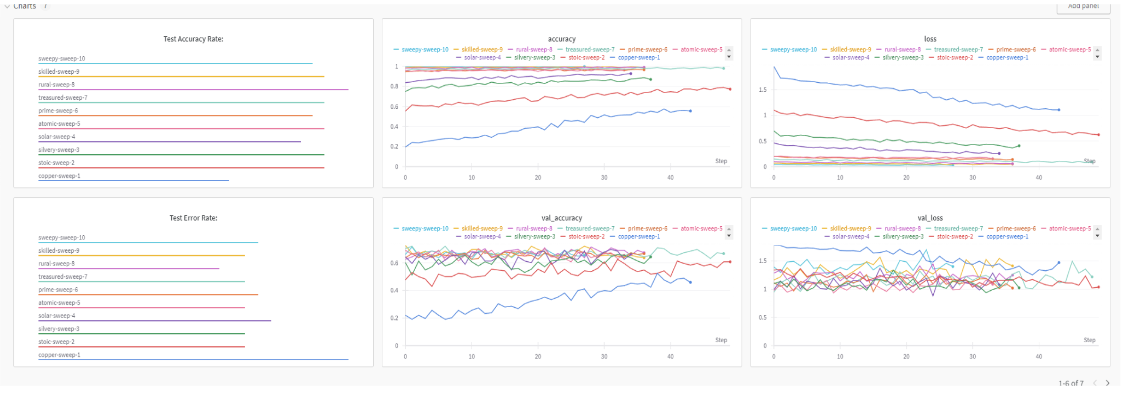

## 실험 모델 3
- learning rate = 0.00009
- batch size = 24
- kernel = (3,3)   
- Dence_filter = 255
- test accuracy(%) = 80
- optimizer = rmsprop
- epochs = 50
- Dence = 16->255   
- dropout = 30%추가

In [23]:
# 모델 작업 - 함수화 
from tensorflow.keras.regularizers import l2
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [24]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [25]:
# 키 입력
wandb.login(key = "본인의 키를 입력하시면 됩니다.")

wandb: Currently logged in as: lapsyom. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [26]:
# # 키 입력
# wandb.login(key = "(본인 키 넣으세요)")

In [27]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [28]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (3, 3),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [29]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: eaahs1fj
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/eaahs1fj


In [30]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: 5lefilec with config:
wandb: 	epoch: 31
wandb: 	learning_rate: 1.0336673523196088e-05
wandb: Currently logged in as: lapsyom (aiffel_7th). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/31
31/31 [==============================] - 7s 75ms/step - loss: 1.9154 - accuracy: 0.2204 - val_loss: 1.7413 - val_accuracy: 0.1905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.3s


Epoch 2/31
31/31 [==============================] - 3s 83ms/step - loss: 1.6996 - accuracy: 0.2836 - val_loss: 1.6993 - val_accuracy: 0.2440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.0s


Epoch 3/31
31/31 [==============================] - 2s 81ms/step - loss: 1.6809 - accuracy: 0.2849 - val_loss: 1.6949 - val_accuracy: 0.2321
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.0s


Epoch 4/31
31/31 [==============================] - 2s 77ms/step - loss: 1.6259 - accuracy: 0.3185 - val_loss: 1.6330 - val_accuracy: 0.2440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.0s


Epoch 5/31
31/31 [==============================] - 2s 80ms/step - loss: 1.5881 - accuracy: 0.3306 - val_loss: 1.6707 - val_accuracy: 0.2083
Epoch 6/31
31/31 [==============================] - 2s 66ms/step - loss: 1.5881 - accuracy: 0.3333 - val_loss: 1.6434 - val_accuracy: 0.2679
Epoch 7/31
31/31 [==============================] - 2s 70ms/step - loss: 1.5354 - accuracy: 0.3441 - val_loss: 1.6037 - val_accuracy: 0.3155
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 0.9s


Epoch 8/31
31/31 [==============================] - 2s 76ms/step - loss: 1.4871 - accuracy: 0.4099 - val_loss: 1.5773 - val_accuracy: 0.2976
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.1s


Epoch 9/31
31/31 [==============================] - 2s 73ms/step - loss: 1.4803 - accuracy: 0.4086 - val_loss: 1.5931 - val_accuracy: 0.3155
Epoch 10/31
31/31 [==============================] - 2s 67ms/step - loss: 1.4579 - accuracy: 0.3750 - val_loss: 1.5134 - val_accuracy: 0.3095
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.1s


Epoch 11/31
31/31 [==============================] - 2s 81ms/step - loss: 1.4472 - accuracy: 0.4046 - val_loss: 1.5150 - val_accuracy: 0.3214
Epoch 12/31
31/31 [==============================] - 2s 70ms/step - loss: 1.4126 - accuracy: 0.4409 - val_loss: 1.4536 - val_accuracy: 0.4167s - loss: 1.421
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.0s


Epoch 13/31
31/31 [==============================] - 2s 74ms/step - loss: 1.4018 - accuracy: 0.3952 - val_loss: 1.5398 - val_accuracy: 0.3810
Epoch 14/31
31/31 [==============================] - 2s 67ms/step - loss: 1.3726 - accuracy: 0.4382 - val_loss: 1.4735 - val_accuracy: 0.3571
Epoch 15/31
31/31 [==============================] - 2s 68ms/step - loss: 1.3752 - accuracy: 0.4234 - val_loss: 1.4065 - val_accuracy: 0.4286
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.1s


Epoch 16/31
31/31 [==============================] - 2s 76ms/step - loss: 1.3156 - accuracy: 0.4489 - val_loss: 1.4413 - val_accuracy: 0.3690
Epoch 17/31
31/31 [==============================] - 2s 76ms/step - loss: 1.3464 - accuracy: 0.4637 - val_loss: 1.4045 - val_accuracy: 0.3988
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.4s


Epoch 18/31
31/31 [==============================] - 3s 85ms/step - loss: 1.2938 - accuracy: 0.4812 - val_loss: 1.3604 - val_accuracy: 0.4345ccuracy: 0.48
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 0.9s


Epoch 19/31
31/31 [==============================] - 3s 86ms/step - loss: 1.2928 - accuracy: 0.4664 - val_loss: 1.5092 - val_accuracy: 0.3452
Epoch 20/31
31/31 [==============================] - 2s 75ms/step - loss: 1.3004 - accuracy: 0.4852 - val_loss: 1.3648 - val_accuracy: 0.4167
Epoch 21/31
31/31 [==============================] - 2s 79ms/step - loss: 1.2815 - accuracy: 0.4946 - val_loss: 1.4244 - val_accuracy: 0.3929 accuracy: 0.
Epoch 22/31
31/31 [==============================] - 2s 75ms/step - loss: 1.2708 - accuracy: 0.5000 - val_loss: 1.3457 - val_accuracy: 0.4881
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 0.9s


Epoch 23/31
31/31 [==============================] - 3s 83ms/step - loss: 1.2382 - accuracy: 0.5000 - val_loss: 1.3374 - val_accuracy: 0.4583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.6s


Epoch 24/31
31/31 [==============================] - 2s 80ms/step - loss: 1.2248 - accuracy: 0.5376 - val_loss: 1.3553 - val_accuracy: 0.4643
Epoch 25/31
31/31 [==============================] - 2s 72ms/step - loss: 1.2238 - accuracy: 0.5269 - val_loss: 1.3627 - val_accuracy: 0.4464
Epoch 26/31
31/31 [==============================] - 2s 70ms/step - loss: 1.2196 - accuracy: 0.5161 - val_loss: 1.4661 - val_accuracy: 0.4107
Epoch 27/31
31/31 [==============================] - 2s 67ms/step - loss: 1.1704 - accuracy: 0.5228 - val_loss: 1.3244 - val_accuracy: 0.4107
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.1s


Epoch 28/31
31/31 [==============================] - 2s 73ms/step - loss: 1.1941 - accuracy: 0.5161 - val_loss: 1.2931 - val_accuracy: 0.4286
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063600-5lefilec/files/model-best)... Done. 1.1s


Epoch 29/31
31/31 [==============================] - 2s 74ms/step - loss: 1.2063 - accuracy: 0.5269 - val_loss: 1.3439 - val_accuracy: 0.4167
Epoch 30/31
31/31 [==============================] - 2s 65ms/step - loss: 1.1750 - accuracy: 0.5269 - val_loss: 1.3658 - val_accuracy: 0.4405
Epoch 31/31
31/31 [==============================] - 2s 66ms/step - loss: 1.1740 - accuracy: 0.5363 - val_loss: 1.3987 - val_accuracy: 0.4226
2/2 - 0s - loss: 1.1891 - accuracy: 0.5250


wandb: Agent Starting Run: qaozsd3p with config:
wandb: 	epoch: 35
wandb: 	learning_rate: 2.2872833118468548e-05


Epoch 1/35
31/31 [==============================] - 4s 75ms/step - loss: 1.3685 - accuracy: 0.4597 - val_loss: 1.4139 - val_accuracy: 0.3631
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 0.9s


Epoch 2/35
31/31 [==============================] - 2s 76ms/step - loss: 1.2812 - accuracy: 0.4973 - val_loss: 1.4210 - val_accuracy: 0.4345
Epoch 3/35
31/31 [==============================] - 2s 72ms/step - loss: 1.2782 - accuracy: 0.4758 - val_loss: 1.3901 - val_accuracy: 0.4524
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.1s


Epoch 4/35
31/31 [==============================] - 2s 76ms/step - loss: 1.2063 - accuracy: 0.5242 - val_loss: 1.3068 - val_accuracy: 0.4345
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.1s


Epoch 5/35
31/31 [==============================] - 2s 79ms/step - loss: 1.2019 - accuracy: 0.5296 - val_loss: 1.2757 - val_accuracy: 0.4821
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.1s


Epoch 6/35
31/31 [==============================] - 2s 74ms/step - loss: 1.1624 - accuracy: 0.5403 - val_loss: 1.4345 - val_accuracy: 0.3869- loss: 1.1281 - accura
Epoch 7/35
31/31 [==============================] - 2s 69ms/step - loss: 1.2003 - accuracy: 0.5363 - val_loss: 1.2160 - val_accuracy: 0.5179
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 0.9s


Epoch 8/35
31/31 [==============================] - 2s 74ms/step - loss: 1.1093 - accuracy: 0.5618 - val_loss: 1.2264 - val_accuracy: 0.4762
Epoch 9/35
31/31 [==============================] - 2s 67ms/step - loss: 1.1187 - accuracy: 0.5632 - val_loss: 1.3680 - val_accuracy: 0.4167
Epoch 10/35
31/31 [==============================] - 2s 68ms/step - loss: 1.1330 - accuracy: 0.5739 - val_loss: 1.3354 - val_accuracy: 0.4702
Epoch 11/35
31/31 [==============================] - 2s 70ms/step - loss: 1.0986 - accuracy: 0.5672 - val_loss: 1.2306 - val_accuracy: 0.4821
Epoch 12/35
31/31 [==============================] - 2s 66ms/step - loss: 1.0716 - accuracy: 0.5538 - val_loss: 1.3786 - val_accuracy: 0.4821
Epoch 13/35
31/31 [==============================] - 2s 69ms/step - loss: 1.1184 - accuracy: 0.5430 - val_loss: 1.2780 - val_accuracy: 0.5000
Epoch 14/35
31/31 [==============================] - 2s 66ms/step - loss: 1.0377 - accuracy: 0.5860 - val_loss: 1.2872 - val_accuracy: 0.5060
Epoch 15

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.0s


Epoch 19/35
31/31 [==============================] - 2s 76ms/step - loss: 0.9851 - accuracy: 0.6223 - val_loss: 1.3482 - val_accuracy: 0.4821
Epoch 20/35
31/31 [==============================] - 2s 71ms/step - loss: 0.9794 - accuracy: 0.6048 - val_loss: 1.2040 - val_accuracy: 0.5119
Epoch 21/35
31/31 [==============================] - 2s 67ms/step - loss: 0.9641 - accuracy: 0.6317 - val_loss: 1.3155 - val_accuracy: 0.4821
Epoch 22/35
31/31 [==============================] - 2s 72ms/step - loss: 0.9507 - accuracy: 0.6505 - val_loss: 1.1314 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.0s


Epoch 23/35
31/31 [==============================] - 3s 89ms/step - loss: 0.9480 - accuracy: 0.6290 - val_loss: 1.2720 - val_accuracy: 0.4583
Epoch 24/35
31/31 [==============================] - 2s 70ms/step - loss: 0.9194 - accuracy: 0.6519 - val_loss: 1.1990 - val_accuracy: 0.5000
Epoch 25/35
31/31 [==============================] - 2s 68ms/step - loss: 0.9140 - accuracy: 0.6613 - val_loss: 1.2322 - val_accuracy: 0.5179- loss: 0.9111 - accuracy: 0.66
Epoch 26/35
31/31 [==============================] - 2s 70ms/step - loss: 0.9118 - accuracy: 0.6532 - val_loss: 1.0636 - val_accuracy: 0.5833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.1s


Epoch 27/35
31/31 [==============================] - 2s 73ms/step - loss: 0.8849 - accuracy: 0.6734 - val_loss: 1.1000 - val_accuracy: 0.5714
Epoch 28/35
31/31 [==============================] - 2s 67ms/step - loss: 0.8787 - accuracy: 0.6761 - val_loss: 1.1691 - val_accuracy: 0.5238
Epoch 29/35
31/31 [==============================] - 2s 66ms/step - loss: 0.8860 - accuracy: 0.6747 - val_loss: 1.3092 - val_accuracy: 0.4524
Epoch 30/35
31/31 [==============================] - 2s 71ms/step - loss: 0.8806 - accuracy: 0.6720 - val_loss: 1.1689 - val_accuracy: 0.5893
Epoch 31/35
31/31 [==============================] - 2s 66ms/step - loss: 0.8968 - accuracy: 0.6613 - val_loss: 1.1290 - val_accuracy: 0.5357
Epoch 32/35
31/31 [==============================] - 2s 65ms/step - loss: 0.8387 - accuracy: 0.6841 - val_loss: 1.0588 - val_accuracy: 0.5774
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.1s


Epoch 33/35
31/31 [==============================] - 2s 76ms/step - loss: 0.8540 - accuracy: 0.6989 - val_loss: 1.0927 - val_accuracy: 0.5833
Epoch 34/35
31/31 [==============================] - 2s 66ms/step - loss: 0.8460 - accuracy: 0.6828 - val_loss: 1.0581 - val_accuracy: 0.5952
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_063936-qaozsd3p/files/model-best)... Done. 1.0s


Epoch 35/35
31/31 [==============================] - 2s 74ms/step - loss: 0.8281 - accuracy: 0.6841 - val_loss: 1.1809 - val_accuracy: 0.5298
2/2 - 0s - loss: 1.0466 - accuracy: 0.5250


wandb: Agent Starting Run: 2oc0r64j with config:
wandb: 	epoch: 51
wandb: 	learning_rate: 9.250732138017458e-05


Epoch 1/51
31/31 [==============================] - 4s 75ms/step - loss: 1.6398 - accuracy: 0.5054 - val_loss: 1.2261 - val_accuracy: 0.4702
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.3s


Epoch 2/51
31/31 [==============================] - 2s 74ms/step - loss: 1.1568 - accuracy: 0.5672 - val_loss: 1.3282 - val_accuracy: 0.4405
Epoch 3/51
31/31 [==============================] - 2s 73ms/step - loss: 1.0182 - accuracy: 0.6062 - val_loss: 1.2064 - val_accuracy: 0.5655
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 4/51
31/31 [==============================] - 2s 81ms/step - loss: 0.9923 - accuracy: 0.6237 - val_loss: 1.2315 - val_accuracy: 0.5595
Epoch 5/51
31/31 [==============================] - 2s 71ms/step - loss: 0.9495 - accuracy: 0.6411 - val_loss: 1.2412 - val_accuracy: 0.5298
Epoch 6/51
31/31 [==============================] - 2s 74ms/step - loss: 0.9220 - accuracy: 0.6640 - val_loss: 1.4288 - val_accuracy: 0.4524
Epoch 7/51
31/31 [==============================] - 2s 67ms/step - loss: 0.8797 - accuracy: 0.6747 - val_loss: 1.1755 - val_accuracy: 0.5595
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 8/51
31/31 [==============================] - 2s 71ms/step - loss: 0.8294 - accuracy: 0.6895 - val_loss: 0.9702 - val_accuracy: 0.6071
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.0s


Epoch 9/51
31/31 [==============================] - 2s 76ms/step - loss: 0.7747 - accuracy: 0.7070 - val_loss: 1.1151 - val_accuracy: 0.5417
Epoch 10/51
31/31 [==============================] - 2s 69ms/step - loss: 0.7387 - accuracy: 0.7191 - val_loss: 1.1934 - val_accuracy: 0.5536
Epoch 11/51
31/31 [==============================] - 2s 69ms/step - loss: 0.7425 - accuracy: 0.7339 - val_loss: 1.1073 - val_accuracy: 0.6071
Epoch 12/51
31/31 [==============================] - 2s 68ms/step - loss: 0.6823 - accuracy: 0.7634 - val_loss: 0.9342 - val_accuracy: 0.6131- loss: 0.6926 - accu - ETA: 0s - loss: 0.6804 - accuracy: 0.
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.0s


Epoch 13/51
31/31 [==============================] - 2s 74ms/step - loss: 0.7133 - accuracy: 0.7487 - val_loss: 1.4016 - val_accuracy: 0.4821
Epoch 14/51
31/31 [==============================] - 2s 67ms/step - loss: 0.6755 - accuracy: 0.7446 - val_loss: 0.9298 - val_accuracy: 0.6369
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 0.9s


Epoch 15/51
31/31 [==============================] - 2s 75ms/step - loss: 0.6399 - accuracy: 0.7608 - val_loss: 1.0125 - val_accuracy: 0.6012
Epoch 16/51
31/31 [==============================] - 2s 67ms/step - loss: 0.6264 - accuracy: 0.7621 - val_loss: 1.0289 - val_accuracy: 0.6190
Epoch 17/51
31/31 [==============================] - 2s 66ms/step - loss: 0.5664 - accuracy: 0.7917 - val_loss: 0.9236 - val_accuracy: 0.6548
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 18/51
31/31 [==============================] - 2s 72ms/step - loss: 0.5700 - accuracy: 0.7863 - val_loss: 1.0082 - val_accuracy: 0.6131
Epoch 19/51
31/31 [==============================] - 2s 66ms/step - loss: 0.5263 - accuracy: 0.8253 - val_loss: 0.8901 - val_accuracy: 0.6726
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 20/51
31/31 [==============================] - 2s 75ms/step - loss: 0.5481 - accuracy: 0.8024 - val_loss: 0.9791 - val_accuracy: 0.6488
Epoch 21/51
31/31 [==============================] - 2s 71ms/step - loss: 0.5154 - accuracy: 0.8132 - val_loss: 0.9063 - val_accuracy: 0.6190
Epoch 22/51
31/31 [==============================] - 2s 67ms/step - loss: 0.4666 - accuracy: 0.8454 - val_loss: 0.9891 - val_accuracy: 0.6488
Epoch 23/51
31/31 [==============================] - 2s 70ms/step - loss: 0.4449 - accuracy: 0.8387 - val_loss: 0.9885 - val_accuracy: 0.6786
Epoch 24/51
31/31 [==============================] - 2s 65ms/step - loss: 0.4819 - accuracy: 0.8293 - val_loss: 0.9148 - val_accuracy: 0.6190
Epoch 25/51
31/31 [==============================] - 2s 66ms/step - loss: 0.4354 - accuracy: 0.8401 - val_loss: 1.1611 - val_accuracy: 0.6310
Epoch 26/51
31/31 [==============================] - 2s 64ms/step - loss: 0.4255 - accuracy: 0.8347 - val_loss: 0.9599 - val_accuracy: 0.6786
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 29/51
31/31 [==============================] - 2s 70ms/step - loss: 0.4022 - accuracy: 0.8629 - val_loss: 1.0413 - val_accuracy: 0.6548
Epoch 30/51
31/31 [==============================] - 2s 64ms/step - loss: 0.3803 - accuracy: 0.8737 - val_loss: 0.9087 - val_accuracy: 0.6905
Epoch 31/51
31/31 [==============================] - 2s 65ms/step - loss: 0.3718 - accuracy: 0.8763 - val_loss: 0.8548 - val_accuracy: 0.7143
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 32/51
31/31 [==============================] - 2s 74ms/step - loss: 0.3798 - accuracy: 0.8562 - val_loss: 0.8132 - val_accuracy: 0.7083
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.1s


Epoch 33/51
31/31 [==============================] - 2s 72ms/step - loss: 0.3106 - accuracy: 0.9032 - val_loss: 0.9800 - val_accuracy: 0.6786
Epoch 34/51
31/31 [==============================] - 2s 66ms/step - loss: 0.3535 - accuracy: 0.8777 - val_loss: 1.0380 - val_accuracy: 0.6071
Epoch 35/51
31/31 [==============================] - 2s 66ms/step - loss: 0.3128 - accuracy: 0.8952 - val_loss: 1.2138 - val_accuracy: 0.6429
Epoch 36/51
31/31 [==============================] - 2s 65ms/step - loss: 0.2883 - accuracy: 0.8965 - val_loss: 0.8006 - val_accuracy: 0.7262
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064210-2oc0r64j/files/model-best)... Done. 1.0s


Epoch 37/51
31/31 [==============================] - 2s 74ms/step - loss: 0.2932 - accuracy: 0.9019 - val_loss: 0.9660 - val_accuracy: 0.6250
Epoch 38/51
31/31 [==============================] - 2s 80ms/step - loss: 0.3058 - accuracy: 0.9046 - val_loss: 0.8402 - val_accuracy: 0.7560
Epoch 39/51
31/31 [==============================] - 2s 66ms/step - loss: 0.2362 - accuracy: 0.9194 - val_loss: 0.9598 - val_accuracy: 0.7024
Epoch 40/51
31/31 [==============================] - 2s 74ms/step - loss: 0.2656 - accuracy: 0.9180 - val_loss: 0.8359 - val_accuracy: 0.7262- loss: 0.2855 - accuracy
Epoch 41/51
31/31 [==============================] - 2s 66ms/step - loss: 0.2542 - accuracy: 0.9167 - val_loss: 0.8602 - val_accuracy: 0.7202
Epoch 42/51
31/31 [==============================] - 2s 68ms/step - loss: 0.2798 - accuracy: 0.9032 - val_loss: 0.8937 - val_accuracy: 0.7143
Epoch 43/51
31/31 [==============================] - 2s 64ms/step - loss: 0.2359 - accuracy: 0.9220 - val_loss: 0.9366 - va

wandb: Agent Starting Run: 63qmjayd with config:
wandb: 	epoch: 48
wandb: 	learning_rate: 4.2765583555627744e-05


Epoch 1/48
31/31 [==============================] - 4s 74ms/step - loss: 0.1458 - accuracy: 0.9570 - val_loss: 0.7915 - val_accuracy: 0.7083
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064522-63qmjayd/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064522-63qmjayd/files/model-best)... Done. 1.1s


Epoch 2/48
31/31 [==============================] - 2s 78ms/step - loss: 0.1217 - accuracy: 0.9664 - val_loss: 0.7403 - val_accuracy: 0.7440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064522-63qmjayd/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064522-63qmjayd/files/model-best)... Done. 1.1s


Epoch 3/48
31/31 [==============================] - 2s 80ms/step - loss: 0.1436 - accuracy: 0.9530 - val_loss: 0.8387 - val_accuracy: 0.7262
Epoch 4/48
31/31 [==============================] - 2s 69ms/step - loss: 0.1348 - accuracy: 0.9570 - val_loss: 0.7497 - val_accuracy: 0.7321
Epoch 5/48
31/31 [==============================] - 2s 73ms/step - loss: 0.1234 - accuracy: 0.9664 - val_loss: 0.7953 - val_accuracy: 0.7143
Epoch 6/48
31/31 [==============================] - 2s 67ms/step - loss: 0.1214 - accuracy: 0.9637 - val_loss: 0.8842 - val_accuracy: 0.7202
Epoch 7/48
31/31 [==============================] - 2s 69ms/step - loss: 0.1250 - accuracy: 0.9677 - val_loss: 0.8220 - val_accuracy: 0.7321
Epoch 8/48
31/31 [==============================] - 2s 65ms/step - loss: 0.0989 - accuracy: 0.9772 - val_loss: 0.9492 - val_accuracy: 0.7381
Epoch 9/48
31/31 [==============================] - 2s 70ms/step - loss: 0.1116 - accuracy: 0.9718 - val_loss: 0.8600 - val_accuracy: 0.7440
Epoch 10/48
3

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064522-63qmjayd/files/model-best)... Done. 1.1s


Epoch 21/48
31/31 [==============================] - 2s 72ms/step - loss: 0.0780 - accuracy: 0.9839 - val_loss: 0.7695 - val_accuracy: 0.7619
Epoch 22/48
31/31 [==============================] - 2s 63ms/step - loss: 0.0768 - accuracy: 0.9798 - val_loss: 0.9544 - val_accuracy: 0.7381
Epoch 23/48
31/31 [==============================] - 2s 64ms/step - loss: 0.0689 - accuracy: 0.9879 - val_loss: 0.9626 - val_accuracy: 0.7024
Epoch 24/48
31/31 [==============================] - 2s 64ms/step - loss: 0.0852 - accuracy: 0.9758 - val_loss: 0.8464 - val_accuracy: 0.7083
Epoch 25/48
31/31 [==============================] - 2s 64ms/step - loss: 0.0828 - accuracy: 0.9745 - val_loss: 0.9810 - val_accuracy: 0.6905
Epoch 26/48
31/31 [==============================] - 2s 67ms/step - loss: 0.0551 - accuracy: 0.9933 - val_loss: 0.7958 - val_accuracy: 0.7619
Epoch 27/48
31/31 [==============================] - 2s 70ms/step - loss: 0.0861 - accuracy: 0.9758 - val_loss: 0.9397 - val_accuracy: 0.6964
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064522-63qmjayd/files/model-best)... Done. 1.1s


Epoch 29/48
31/31 [==============================] - 2s 75ms/step - loss: 0.0640 - accuracy: 0.9879 - val_loss: 0.7697 - val_accuracy: 0.7321
Epoch 30/48
31/31 [==============================] - 2s 66ms/step - loss: 0.0774 - accuracy: 0.9798 - val_loss: 0.9905 - val_accuracy: 0.6964
Epoch 31/48
31/31 [==============================] - 2s 67ms/step - loss: 0.0566 - accuracy: 0.9852 - val_loss: 0.7731 - val_accuracy: 0.7500
Epoch 32/48
31/31 [==============================] - 2s 62ms/step - loss: 0.0427 - accuracy: 0.9919 - val_loss: 0.9636 - val_accuracy: 0.7321
Epoch 33/48
31/31 [==============================] - 2s 81ms/step - loss: 0.0628 - accuracy: 0.9812 - val_loss: 1.0467 - val_accuracy: 0.6845
Epoch 34/48
31/31 [==============================] - 2s 66ms/step - loss: 0.0725 - accuracy: 0.9812 - val_loss: 0.7876 - val_accuracy: 0.7857
Epoch 35/48
31/31 [==============================] - 2s 64ms/step - loss: 0.0614 - accuracy: 0.9906 - val_loss: 1.0733 - val_accuracy: 0.6905
Epoch 

wandb: Agent Starting Run: 68kvaej1 with config:
wandb: 	epoch: 49
wandb: 	learning_rate: 3.582038614435582e-06


Epoch 1/49
31/31 [==============================] - 4s 75ms/step - loss: 0.0331 - accuracy: 0.9919 - val_loss: 0.9701 - val_accuracy: 0.7321
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best)... Done. 0.9s


Epoch 2/49
31/31 [==============================] - 2s 71ms/step - loss: 0.0329 - accuracy: 0.9946 - val_loss: 0.9648 - val_accuracy: 0.7738
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best)... Done. 1.1s


Epoch 3/49
31/31 [==============================] - 2s 77ms/step - loss: 0.0261 - accuracy: 0.9960 - val_loss: 0.8207 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best)... Done. 1.1s


Epoch 4/49
31/31 [==============================] - 2s 77ms/step - loss: 0.0330 - accuracy: 0.9933 - val_loss: 0.8381 - val_accuracy: 0.7619
Epoch 5/49
31/31 [==============================] - 2s 66ms/step - loss: 0.0364 - accuracy: 0.9906 - val_loss: 0.8837 - val_accuracy: 0.7381
Epoch 6/49
31/31 [==============================] - 2s 70ms/step - loss: 0.0271 - accuracy: 0.9933 - val_loss: 0.9453 - val_accuracy: 0.7321
Epoch 7/49
31/31 [==============================] - 2s 64ms/step - loss: 0.0279 - accuracy: 0.9973 - val_loss: 0.8696 - val_accuracy: 0.7381
Epoch 8/49
31/31 [==============================] - 2s 67ms/step - loss: 0.0353 - accuracy: 0.9933 - val_loss: 0.9093 - val_accuracy: 0.7440
Epoch 9/49
31/31 [==============================] - 2s 63ms/step - loss: 0.0312 - accuracy: 0.9933 - val_loss: 0.8206 - val_accuracy: 0.7619
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best)... Done. 1.1s


Epoch 10/49
31/31 [==============================] - 2s 72ms/step - loss: 0.0275 - accuracy: 0.9960 - val_loss: 0.9601 - val_accuracy: 0.7143
Epoch 11/49
31/31 [==============================] - 2s 65ms/step - loss: 0.0251 - accuracy: 0.9973 - val_loss: 0.8613 - val_accuracy: 0.7262
Epoch 12/49
31/31 [==============================] - 2s 68ms/step - loss: 0.0324 - accuracy: 0.9973 - val_loss: 1.0061 - val_accuracy: 0.7321
Epoch 13/49
31/31 [==============================] - 2s 67ms/step - loss: 0.0285 - accuracy: 0.9973 - val_loss: 0.9817 - val_accuracy: 0.7321
Epoch 14/49
31/31 [==============================] - 2s 69ms/step - loss: 0.0314 - accuracy: 0.9946 - val_loss: 0.8673 - val_accuracy: 0.7321
Epoch 15/49
31/31 [==============================] - 2s 67ms/step - loss: 0.0269 - accuracy: 0.9973 - val_loss: 0.8855 - val_accuracy: 0.7560
Epoch 16/49
31/31 [==============================] - 2s 69ms/step - loss: 0.0311 - accuracy: 0.9960 - val_loss: 0.9136 - val_accuracy: 0.7262
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_064754-68kvaej1/files/model-best)... Done. 0.9s


Epoch 18/49
31/31 [==============================] - 2s 77ms/step - loss: 0.0245 - accuracy: 0.9973 - val_loss: 0.8478 - val_accuracy: 0.7440
Epoch 19/49
31/31 [==============================] - 2s 66ms/step - loss: 0.0202 - accuracy: 0.9987 - val_loss: 0.8933 - val_accuracy: 0.7560
Epoch 20/49
31/31 [==============================] - 2s 66ms/step - loss: 0.0239 - accuracy: 0.9973 - val_loss: 0.9483 - val_accuracy: 0.7381
Epoch 21/49
31/31 [==============================] - 2s 64ms/step - loss: 0.0235 - accuracy: 0.9973 - val_loss: 0.9613 - val_accuracy: 0.7440
Epoch 22/49
31/31 [==============================] - 2s 67ms/step - loss: 0.0276 - accuracy: 0.9960 - val_loss: 0.9598 - val_accuracy: 0.7321
Epoch 23/49
31/31 [==============================] - 2s 64ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.9169 - val_accuracy: 0.7440
Epoch 24/49
31/31 [==============================] - 2s 68ms/step - loss: 0.0379 - accuracy: 0.9906 - val_loss: 0.8966 - val_accuracy: 0.7321
Epoch 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r5ftd8gp with config:
wandb: 	epoch: 45
wandb: 	learning_rate: 5.516519332172802e-05


Epoch 1/45
31/31 [==============================] - 4s 72ms/step - loss: 0.0646 - accuracy: 0.9866 - val_loss: 0.7660 - val_accuracy: 0.7321
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_065037-r5ftd8gp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_065037-r5ftd8gp/files/model-best)... Done. 1.1s


Epoch 2/45
31/31 [==============================] - 2s 72ms/step - loss: 0.0425 - accuracy: 0.9946 - val_loss: 0.9739 - val_accuracy: 0.7262
Epoch 3/45
31/31 [==============================] - 2s 75ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.8997 - val_accuracy: 0.7500
Epoch 4/45
31/31 [==============================] - 2s 64ms/step - loss: 0.0381 - accuracy: 0.9919 - val_loss: 0.7891 - val_accuracy: 0.7679
Epoch 5/45
31/31 [==============================] - 2s 66ms/step - loss: 0.0376 - accuracy: 0.9933 - val_loss: 1.1601 - val_accuracy: 0.6905
Epoch 6/45
31/31 [==============================] - 2s 64ms/step - loss: 0.0485 - accuracy: 0.9866 - val_loss: 0.8931 - val_accuracy: 0.7262
Epoch 7/45
31/31 [==============================] - 2s 72ms/step - loss: 0.0412 - accuracy: 0.9906 - val_loss: 1.2486 - val_accuracy: 0.7143
Epoch 8/45
31/31 [==============================] - 2s 66ms/step - loss: 0.0425 - accuracy: 0.9892 - val_loss: 1.1757 - val_accuracy: 0.7321
Epoch 9/45
31

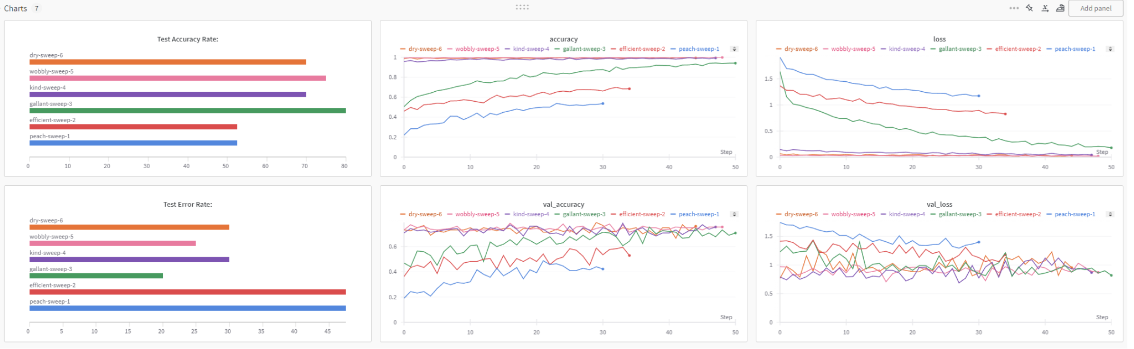

## 실험 모델 4
- learning rate = 0.00005
- batch size = 24
- kernel = (2,2)   
- Dence_filter = 255
- test accuracy(%) = 75
- optimizer = rmsprop
- epochs = 21
- Dence = 16->255   
- dropout = 30%


In [36]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [37]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [38]:
# 키 입력
wandb.login(key = "본인의 키를 입력하세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [39]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [40]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (2, 2),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [41]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: d3add57b
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/d3add57b


In [42]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: timvod1j with config:
wandb: 	epoch: 13
wandb: 	learning_rate: 8.589271076122453e-05


Epoch 1/13
31/31 [==============================] - 4s 71ms/step - loss: 3.8990 - accuracy: 0.2110 - val_loss: 1.8738 - val_accuracy: 0.2262
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.0s


Epoch 2/13
31/31 [==============================] - 2s 76ms/step - loss: 1.7671 - accuracy: 0.2903 - val_loss: 1.7861 - val_accuracy: 0.2440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.1s


Epoch 3/13
31/31 [==============================] - 2s 79ms/step - loss: 1.6939 - accuracy: 0.2863 - val_loss: 1.7722 - val_accuracy: 0.2440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.0s


Epoch 4/13
31/31 [==============================] - 2s 73ms/step - loss: 1.6520 - accuracy: 0.3038 - val_loss: 1.6085 - val_accuracy: 0.2679
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.1s


Epoch 5/13
31/31 [==============================] - 2s 76ms/step - loss: 1.5184 - accuracy: 0.3737 - val_loss: 1.5312 - val_accuracy: 0.2619
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.5s


Epoch 6/13
31/31 [==============================] - 2s 74ms/step - loss: 1.4970 - accuracy: 0.3629 - val_loss: 1.4964 - val_accuracy: 0.3214
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.0s


Epoch 7/13
31/31 [==============================] - 2s 79ms/step - loss: 1.4515 - accuracy: 0.3911 - val_loss: 1.4064 - val_accuracy: 0.3929
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.0s


Epoch 8/13
31/31 [==============================] - 2s 74ms/step - loss: 1.3998 - accuracy: 0.4274 - val_loss: 1.3979 - val_accuracy: 0.3869
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.0s


Epoch 9/13
31/31 [==============================] - 2s 75ms/step - loss: 1.3643 - accuracy: 0.4570 - val_loss: 1.3883 - val_accuracy: 0.4048- loss: 1.3748 - accuracy: 0.
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.1s


Epoch 10/13
31/31 [==============================] - 2s 73ms/step - loss: 1.3223 - accuracy: 0.4570 - val_loss: 1.3111 - val_accuracy: 0.4286
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 0.9s


Epoch 11/13
31/31 [==============================] - 2s 72ms/step - loss: 1.3044 - accuracy: 0.4462 - val_loss: 1.3335 - val_accuracy: 0.4226
Epoch 12/13
31/31 [==============================] - 2s 66ms/step - loss: 1.2584 - accuracy: 0.5081 - val_loss: 1.3147 - val_accuracy: 0.4583
Epoch 13/13
31/31 [==============================] - 2s 66ms/step - loss: 1.1932 - accuracy: 0.5255 - val_loss: 1.2537 - val_accuracy: 0.4702
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_071930-timvod1j/files/model-best)... Done. 1.1s


2/2 - 0s - loss: 1.1222 - accuracy: 0.6000


wandb: Agent Starting Run: me8szsio with config:
wandb: 	epoch: 19
wandb: 	learning_rate: 3.0046066652200523e-05


Epoch 1/19
31/31 [==============================] - 4s 78ms/step - loss: 1.1537 - accuracy: 0.5551 - val_loss: 1.2972 - val_accuracy: 0.4940
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.5s


Epoch 2/19
31/31 [==============================] - 2s 70ms/step - loss: 1.1174 - accuracy: 0.5645 - val_loss: 1.2464 - val_accuracy: 0.4940
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.0s


Epoch 3/19
31/31 [==============================] - 2s 79ms/step - loss: 1.1240 - accuracy: 0.5672 - val_loss: 1.2596 - val_accuracy: 0.4881
Epoch 4/19
31/31 [==============================] - 2s 66ms/step - loss: 1.1113 - accuracy: 0.5887 - val_loss: 1.2353 - val_accuracy: 0.4940loss: 1.1270 - accuracy: 
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.1s


Epoch 5/19
31/31 [==============================] - 2s 72ms/step - loss: 1.1012 - accuracy: 0.5699 - val_loss: 1.2477 - val_accuracy: 0.4940
Epoch 6/19
31/31 [==============================] - 2s 69ms/step - loss: 1.0596 - accuracy: 0.5968 - val_loss: 1.2191 - val_accuracy: 0.5179
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.0s


Epoch 7/19
31/31 [==============================] - 2s 68ms/step - loss: 1.0758 - accuracy: 0.5954 - val_loss: 1.1875 - val_accuracy: 0.5119
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.2s


Epoch 8/19
31/31 [==============================] - 2s 72ms/step - loss: 1.0547 - accuracy: 0.5874 - val_loss: 1.2153 - val_accuracy: 0.4821
Epoch 9/19
31/31 [==============================] - 2s 67ms/step - loss: 1.0263 - accuracy: 0.6156 - val_loss: 1.1918 - val_accuracy: 0.5238
Epoch 10/19
31/31 [==============================] - 2s 65ms/step - loss: 1.0429 - accuracy: 0.6062 - val_loss: 1.2191 - val_accuracy: 0.4940loss: 1.0342 - accuracy
Epoch 11/19
31/31 [==============================] - 2s 66ms/step - loss: 1.0182 - accuracy: 0.6250 - val_loss: 1.1856 - val_accuracy: 0.4821
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.1s


Epoch 12/19
31/31 [==============================] - 2s 72ms/step - loss: 0.9859 - accuracy: 0.6075 - val_loss: 1.1853 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.1s


Epoch 13/19
31/31 [==============================] - 2s 69ms/step - loss: 0.9906 - accuracy: 0.6169 - val_loss: 1.1577 - val_accuracy: 0.5119
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.1s


Epoch 14/19
31/31 [==============================] - 2s 72ms/step - loss: 1.0034 - accuracy: 0.6048 - val_loss: 1.1313 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.8s


Epoch 15/19
31/31 [==============================] - 2s 73ms/step - loss: 0.9872 - accuracy: 0.6196 - val_loss: 1.1308 - val_accuracy: 0.4881
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.1s


Epoch 16/19
31/31 [==============================] - 2s 78ms/step - loss: 0.9416 - accuracy: 0.6371 - val_loss: 1.1276 - val_accuracy: 0.5952- loss: 0.9019 - accu
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072109-me8szsio/files/model-best)... Done. 1.0s


Epoch 17/19
31/31 [==============================] - 2s 78ms/step - loss: 0.9582 - accuracy: 0.6465 - val_loss: 1.1428 - val_accuracy: 0.5476
Epoch 18/19
31/31 [==============================] - 2s 64ms/step - loss: 0.9690 - accuracy: 0.6465 - val_loss: 1.1488 - val_accuracy: 0.5119
Epoch 19/19
31/31 [==============================] - 2s 69ms/step - loss: 0.9091 - accuracy: 0.6478 - val_loss: 1.1457 - val_accuracy: 0.5357
2/2 - 0s - loss: 1.0211 - accuracy: 0.6250


wandb: Agent Starting Run: as4840sw with config:
wandb: 	epoch: 31
wandb: 	learning_rate: 2.989994369061737e-05


Epoch 1/31
31/31 [==============================] - 5s 72ms/step - loss: 0.9723 - accuracy: 0.6384 - val_loss: 1.0988 - val_accuracy: 0.5298
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.2s


Epoch 2/31
31/31 [==============================] - 3s 90ms/step - loss: 0.9069 - accuracy: 0.6599 - val_loss: 1.1268 - val_accuracy: 0.6071
Epoch 3/31
31/31 [==============================] - 2s 72ms/step - loss: 0.8994 - accuracy: 0.6761 - val_loss: 1.1643 - val_accuracy: 0.5476
Epoch 4/31
31/31 [==============================] - 2s 65ms/step - loss: 0.9286 - accuracy: 0.6599 - val_loss: 1.1471 - val_accuracy: 0.5476
Epoch 5/31
31/31 [==============================] - 2s 68ms/step - loss: 0.8833 - accuracy: 0.6774 - val_loss: 1.1342 - val_accuracy: 0.5714 - accuracy: 0.67
Epoch 6/31
31/31 [==============================] - 2s 64ms/step - loss: 0.8859 - accuracy: 0.6707 - val_loss: 1.1250 - val_accuracy: 0.5655- loss: 0.8904 - accuracy: 0.
Epoch 7/31
31/31 [==============================] - 2s 67ms/step - loss: 0.8662 - accuracy: 0.6922 - val_loss: 1.1106 - val_accuracy: 0.5536
Epoch 8/31
31/31 [==============================] - 2s 65ms/step - loss: 0.8544 - accuracy: 0.6989 - val_los

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.1s


Epoch 10/31
31/31 [==============================] - 2s 77ms/step - loss: 0.8528 - accuracy: 0.6976 - val_loss: 1.0744 - val_accuracy: 0.5595
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 0.9s


Epoch 11/31
31/31 [==============================] - 2s 70ms/step - loss: 0.8244 - accuracy: 0.7245 - val_loss: 1.1640 - val_accuracy: 0.5000
Epoch 12/31
31/31 [==============================] - 2s 70ms/step - loss: 0.8374 - accuracy: 0.6949 - val_loss: 1.1046 - val_accuracy: 0.5536
Epoch 13/31
31/31 [==============================] - 2s 62ms/step - loss: 0.8095 - accuracy: 0.7191 - val_loss: 1.0482 - val_accuracy: 0.5655
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.0s


Epoch 14/31
31/31 [==============================] - 2s 73ms/step - loss: 0.8133 - accuracy: 0.7097 - val_loss: 1.0914 - val_accuracy: 0.5595
Epoch 15/31
31/31 [==============================] - 2s 65ms/step - loss: 0.7908 - accuracy: 0.7285 - val_loss: 1.0589 - val_accuracy: 0.5357
Epoch 16/31
31/31 [==============================] - 2s 66ms/step - loss: 0.8198 - accuracy: 0.7110 - val_loss: 1.1160 - val_accuracy: 0.5833
Epoch 17/31
31/31 [==============================] - 2s 68ms/step - loss: 0.7954 - accuracy: 0.7164 - val_loss: 1.1549 - val_accuracy: 0.5417
Epoch 18/31
31/31 [==============================] - 2s 73ms/step - loss: 0.8026 - accuracy: 0.7056 - val_loss: 1.1177 - val_accuracy: 0.6071- loss: 0.8029 - accu
Epoch 19/31
31/31 [==============================] - 2s 66ms/step - loss: 0.7809 - accuracy: 0.7043 - val_loss: 1.0402 - val_accuracy: 0.5595
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.1s


Epoch 20/31
31/31 [==============================] - 2s 71ms/step - loss: 0.7538 - accuracy: 0.7392 - val_loss: 1.0532 - val_accuracy: 0.5595
Epoch 21/31
31/31 [==============================] - 2s 69ms/step - loss: 0.7781 - accuracy: 0.7245 - val_loss: 1.0836 - val_accuracy: 0.5595
Epoch 22/31
31/31 [==============================] - 2s 68ms/step - loss: 0.7377 - accuracy: 0.7460 - val_loss: 1.1020 - val_accuracy: 0.5238
Epoch 23/31
31/31 [==============================] - 2s 66ms/step - loss: 0.7504 - accuracy: 0.7164 - val_loss: 1.0606 - val_accuracy: 0.5774
Epoch 24/31
31/31 [==============================] - 2s 69ms/step - loss: 0.7071 - accuracy: 0.7473 - val_loss: 1.0345 - val_accuracy: 0.5833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.7s


Epoch 25/31
31/31 [==============================] - 2s 75ms/step - loss: 0.7470 - accuracy: 0.7352 - val_loss: 1.0275 - val_accuracy: 0.5714s - loss: 0.7245 - accu
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.0s


Epoch 26/31
31/31 [==============================] - 2s 77ms/step - loss: 0.6866 - accuracy: 0.7634 - val_loss: 1.0470 - val_accuracy: 0.6369
Epoch 27/31
31/31 [==============================] - 2s 66ms/step - loss: 0.7216 - accuracy: 0.7352 - val_loss: 1.0610 - val_accuracy: 0.5536
Epoch 28/31
31/31 [==============================] - 2s 67ms/step - loss: 0.6960 - accuracy: 0.7567 - val_loss: 1.0534 - val_accuracy: 0.6131
Epoch 29/31
31/31 [==============================] - 2s 67ms/step - loss: 0.6897 - accuracy: 0.7406 - val_loss: 0.9790 - val_accuracy: 0.6012
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072250-as4840sw/files/model-best)... Done. 1.4s


Epoch 30/31
31/31 [==============================] - 2s 75ms/step - loss: 0.6931 - accuracy: 0.7433 - val_loss: 1.0640 - val_accuracy: 0.6012
Epoch 31/31
31/31 [==============================] - 2s 66ms/step - loss: 0.6968 - accuracy: 0.7567 - val_loss: 1.1058 - val_accuracy: 0.5893
2/2 - 0s - loss: 1.0346 - accuracy: 0.6000


wandb: Agent Starting Run: mon4oevq with config:
wandb: 	epoch: 22
wandb: 	learning_rate: 4.8375262356270305e-05


Epoch 1/22
31/31 [==============================] - 4s 73ms/step - loss: 0.7426 - accuracy: 0.7191 - val_loss: 1.0970 - val_accuracy: 0.5595
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best)... Done. 1.0s


Epoch 2/22
31/31 [==============================] - 3s 87ms/step - loss: 0.6916 - accuracy: 0.7608 - val_loss: 1.1127 - val_accuracy: 0.6071
Epoch 3/22
31/31 [==============================] - 2s 70ms/step - loss: 0.6925 - accuracy: 0.7392 - val_loss: 1.0606 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best)... Done. 1.4s


Epoch 4/22
31/31 [==============================] - 2s 76ms/step - loss: 0.6828 - accuracy: 0.7500 - val_loss: 1.1145 - val_accuracy: 0.5357
Epoch 5/22
31/31 [==============================] - 2s 75ms/step - loss: 0.6542 - accuracy: 0.7675 - val_loss: 0.9903 - val_accuracy: 0.6310
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best)... Done. 1.1s


Epoch 6/22
31/31 [==============================] - 2s 75ms/step - loss: 0.6985 - accuracy: 0.7567 - val_loss: 0.9509 - val_accuracy: 0.6310
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best)... Done. 1.1s


Epoch 7/22
31/31 [==============================] - 2s 71ms/step - loss: 0.6699 - accuracy: 0.7594 - val_loss: 1.0386 - val_accuracy: 0.5952
Epoch 8/22
31/31 [==============================] - 2s 68ms/step - loss: 0.6336 - accuracy: 0.7890 - val_loss: 0.9545 - val_accuracy: 0.6429
Epoch 9/22
31/31 [==============================] - 2s 65ms/step - loss: 0.6289 - accuracy: 0.7782 - val_loss: 0.9552 - val_accuracy: 0.6071
Epoch 10/22
31/31 [==============================] - 2s 68ms/step - loss: 0.6744 - accuracy: 0.7554 - val_loss: 1.0188 - val_accuracy: 0.6250
Epoch 11/22
31/31 [==============================] - 2s 65ms/step - loss: 0.5982 - accuracy: 0.8011 - val_loss: 1.0202 - val_accuracy: 0.6071
Epoch 12/22
31/31 [==============================] - 2s 68ms/step - loss: 0.6110 - accuracy: 0.7782 - val_loss: 1.0124 - val_accuracy: 0.5714
Epoch 13/22
31/31 [==============================] - 2s 64ms/step - loss: 0.6205 - accuracy: 0.7796 - val_loss: 1.0190 - val_accuracy: 0.6190
Epoch 14/

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072452-mon4oevq/files/model-best)... Done. 1.1s


Epoch 22/22
31/31 [==============================] - 2s 73ms/step - loss: 0.5128 - accuracy: 0.8360 - val_loss: 1.0386 - val_accuracy: 0.5893
2/2 - 0s - loss: 1.0236 - accuracy: 0.7000


wandb: Agent Starting Run: c1wcq0eg with config:
wandb: 	epoch: 40
wandb: 	learning_rate: 2.703945491912283e-06


Epoch 1/40
31/31 [==============================] - 4s 73ms/step - loss: 0.4970 - accuracy: 0.8212 - val_loss: 0.8877 - val_accuracy: 0.6548
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072623-c1wcq0eg/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072623-c1wcq0eg/files/model-best)... Done. 1.1s


Epoch 2/40
31/31 [==============================] - 2s 76ms/step - loss: 0.4537 - accuracy: 0.8602 - val_loss: 0.9065 - val_accuracy: 0.6607s - loss: 0.4286 
Epoch 3/40
31/31 [==============================] - 2s 71ms/step - loss: 0.4557 - accuracy: 0.8468 - val_loss: 0.8984 - val_accuracy: 0.6548
Epoch 4/40
31/31 [==============================] - 2s 68ms/step - loss: 0.4874 - accuracy: 0.8401 - val_loss: 0.9220 - val_accuracy: 0.6667
Epoch 5/40
31/31 [==============================] - 2s 70ms/step - loss: 0.4674 - accuracy: 0.8508 - val_loss: 0.9340 - val_accuracy: 0.6369
Epoch 6/40
31/31 [==============================] - 2s 71ms/step - loss: 0.4402 - accuracy: 0.8683 - val_loss: 0.9512 - val_accuracy: 0.6786
Epoch 7/40
31/31 [==============================] - 2s 68ms/step - loss: 0.4857 - accuracy: 0.8468 - val_loss: 0.9707 - val_accuracy: 0.63690.5001 - accuracy: 
Epoch 8/40
31/31 [==============================] - 2s 67ms/step - loss: 0.4779 - accuracy: 0.8387 - val_loss: 0.9738 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072623-c1wcq0eg/files/model-best)... Done. 1.1s


Epoch 24/40
31/31 [==============================] - 2s 75ms/step - loss: 0.4641 - accuracy: 0.8495 - val_loss: 0.9248 - val_accuracy: 0.6667
Epoch 25/40
31/31 [==============================] - 2s 67ms/step - loss: 0.4361 - accuracy: 0.8683 - val_loss: 0.9718 - val_accuracy: 0.6190
Epoch 26/40
31/31 [==============================] - 2s 68ms/step - loss: 0.4225 - accuracy: 0.8831 - val_loss: 0.9320 - val_accuracy: 0.6607
Epoch 27/40
31/31 [==============================] - 2s 67ms/step - loss: 0.4499 - accuracy: 0.8575 - val_loss: 0.9163 - val_accuracy: 0.6429ss: 0.4358 - accura
Epoch 28/40
31/31 [==============================] - 2s 73ms/step - loss: 0.4295 - accuracy: 0.8629 - val_loss: 0.9006 - val_accuracy: 0.6310
Epoch 29/40
31/31 [==============================] - 2s 66ms/step - loss: 0.4620 - accuracy: 0.8535 - val_loss: 0.8699 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072623-c1wcq0eg/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072623-c1wcq0eg/files/model-best)... Done. 0.9s


Epoch 30/40
31/31 [==============================] - 2s 71ms/step - loss: 0.4341 - accuracy: 0.8535 - val_loss: 0.9572 - val_accuracy: 0.6310
Epoch 31/40
31/31 [==============================] - 2s 68ms/step - loss: 0.4233 - accuracy: 0.8817 - val_loss: 0.9366 - val_accuracy: 0.6488
Epoch 32/40
31/31 [==============================] - 2s 66ms/step - loss: 0.4344 - accuracy: 0.8710 - val_loss: 0.8856 - val_accuracy: 0.6488
Epoch 33/40
31/31 [==============================] - 2s 72ms/step - loss: 0.4297 - accuracy: 0.8831 - val_loss: 0.8925 - val_accuracy: 0.6845
Epoch 34/40
31/31 [==============================] - 2s 67ms/step - loss: 0.4292 - accuracy: 0.8750 - val_loss: 0.9118 - val_accuracy: 0.6548
Epoch 35/40
31/31 [==============================] - 2s 77ms/step - loss: 0.4592 - accuracy: 0.8508 - val_loss: 0.9555 - val_accuracy: 0.6429
Epoch 36/40
31/31 [==============================] - 2s 71ms/step - loss: 0.4261 - accuracy: 0.8589 - val_loss: 0.9254 - val_accuracy: 0.6488
Epoch 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q5x3c2jv with config:
wandb: 	epoch: 22
wandb: 	learning_rate: 5.7457739044551355e-05


Epoch 1/22
31/31 [==============================] - 4s 73ms/step - loss: 0.5739 - accuracy: 0.7944 - val_loss: 0.9683 - val_accuracy: 0.6310
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best)... Done. 1.1s


Epoch 2/22
31/31 [==============================] - 2s 76ms/step - loss: 0.4908 - accuracy: 0.8562 - val_loss: 0.9948 - val_accuracy: 0.6250
Epoch 3/22
31/31 [==============================] - 2s 69ms/step - loss: 0.5072 - accuracy: 0.8360 - val_loss: 1.0311 - val_accuracy: 0.5893
Epoch 4/22
31/31 [==============================] - 2s 66ms/step - loss: 0.4987 - accuracy: 0.8401 - val_loss: 1.0620 - val_accuracy: 0.6190
Epoch 5/22
31/31 [==============================] - 2s 68ms/step - loss: 0.4990 - accuracy: 0.8266 - val_loss: 0.9070 - val_accuracy: 0.6845
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best)... Done. 1.1s


Epoch 6/22
31/31 [==============================] - 2s 76ms/step - loss: 0.5061 - accuracy: 0.8266 - val_loss: 0.9567 - val_accuracy: 0.6548
Epoch 7/22
31/31 [==============================] - 2s 68ms/step - loss: 0.4723 - accuracy: 0.8508 - val_loss: 0.8991 - val_accuracy: 0.6369
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best)... Done. 1.1s


Epoch 8/22
31/31 [==============================] - 2s 71ms/step - loss: 0.4463 - accuracy: 0.8468 - val_loss: 0.9069 - val_accuracy: 0.6786s - loss: 0.4166 - accu
Epoch 9/22
31/31 [==============================] - 2s 68ms/step - loss: 0.4757 - accuracy: 0.8172 - val_loss: 1.0529 - val_accuracy: 0.5893
Epoch 10/22
31/31 [==============================] - 2s 69ms/step - loss: 0.4568 - accuracy: 0.8508 - val_loss: 0.9149 - val_accuracy: 0.6548
Epoch 11/22
31/31 [==============================] - 2s 66ms/step - loss: 0.4557 - accuracy: 0.8333 - val_loss: 0.9626 - val_accuracy: 0.6905
Epoch 12/22
31/31 [==============================] - 2s 71ms/step - loss: 0.4351 - accuracy: 0.8441 - val_loss: 0.9746 - val_accuracy: 0.6310
Epoch 13/22
31/31 [==============================] - 2s 66ms/step - loss: 0.4252 - accuracy: 0.8427 - val_loss: 0.8782 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best)... Done. 1.1s


Epoch 14/22
31/31 [==============================] - 2s 77ms/step - loss: 0.4415 - accuracy: 0.8454 - val_loss: 0.9772 - val_accuracy: 0.6250
Epoch 15/22
31/31 [==============================] - 2s 69ms/step - loss: 0.4285 - accuracy: 0.8562 - val_loss: 0.9452 - val_accuracy: 0.6310
Epoch 16/22
31/31 [==============================] - 2s 68ms/step - loss: 0.3994 - accuracy: 0.8737 - val_loss: 0.8854 - val_accuracy: 0.6726
Epoch 17/22
31/31 [==============================] - 2s 67ms/step - loss: 0.4072 - accuracy: 0.8777 - val_loss: 0.8968 - val_accuracy: 0.6548
Epoch 18/22
31/31 [==============================] - 2s 69ms/step - loss: 0.4038 - accuracy: 0.8629 - val_loss: 0.9557 - val_accuracy: 0.6726
Epoch 19/22
31/31 [==============================] - 2s 67ms/step - loss: 0.3734 - accuracy: 0.8831 - val_loss: 0.9429 - val_accuracy: 0.6369
Epoch 20/22
31/31 [==============================] - 2s 71ms/step - loss: 0.4283 - accuracy: 0.8575 - val_loss: 0.9567 - val_accuracy: 0.6071
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_072841-q5x3c2jv/files/model-best)... Done. 1.1s


Epoch 22/22
31/31 [==============================] - 2s 75ms/step - loss: 0.3954 - accuracy: 0.8602 - val_loss: 0.8610 - val_accuracy: 0.6667
2/2 - 0s - loss: 0.8375 - accuracy: 0.7500


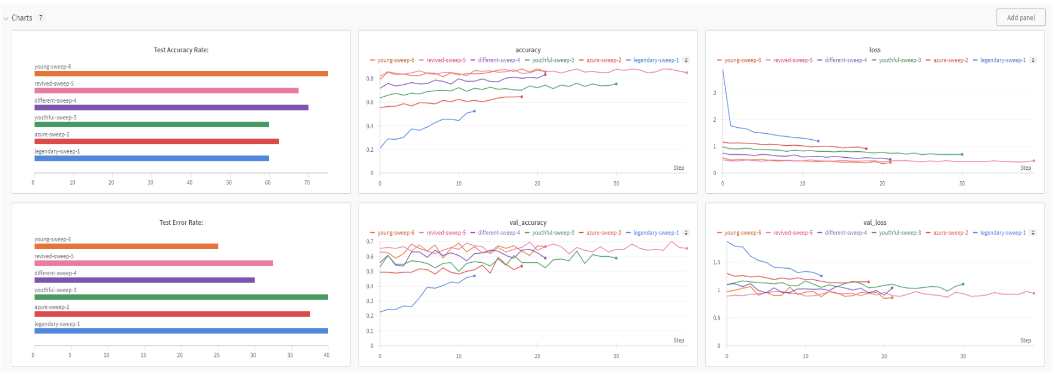

## 실험 모델 5
- learning rate = 0.00008
- batch size = 24
- kernel = (5,5)   
- Dence_filter = 255
- test accuracy(%) = 77.5
- optimizer = rmsprop
- epochs = 29
- Dence = 255   
- dropout = 30%



In [43]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [44]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [45]:
# 키 입력
wandb.login(key = "본인의 키를 입력하세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [46]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [47]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (5, 5),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [48]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: hfswu0hv
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/hfswu0hv


In [49]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: 2bn33dq3 with config:
wandb: 	epoch: 17
wandb: 	learning_rate: 9.951517598575426e-05


Epoch 1/17
31/31 [==============================] - 5s 77ms/step - loss: 1.8949 - accuracy: 0.2984 - val_loss: 1.5916 - val_accuracy: 0.3274
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.1s


Epoch 2/17
31/31 [==============================] - 2s 80ms/step - loss: 1.4324 - accuracy: 0.4046 - val_loss: 1.4172 - val_accuracy: 0.3750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.1s


Epoch 3/17
31/31 [==============================] - 2s 80ms/step - loss: 1.3172 - accuracy: 0.4637 - val_loss: 1.5834 - val_accuracy: 0.3274
Epoch 4/17
31/31 [==============================] - 2s 70ms/step - loss: 1.2897 - accuracy: 0.5067 - val_loss: 1.2903 - val_accuracy: 0.4464
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.0s


Epoch 5/17
31/31 [==============================] - 3s 82ms/step - loss: 1.2174 - accuracy: 0.5242 - val_loss: 1.3727 - val_accuracy: 0.4286
Epoch 6/17
31/31 [==============================] - 2s 72ms/step - loss: 1.1672 - accuracy: 0.5538 - val_loss: 1.4897 - val_accuracy: 0.4226
Epoch 7/17
31/31 [==============================] - 2s 70ms/step - loss: 1.1124 - accuracy: 0.5780 - val_loss: 1.3069 - val_accuracy: 0.4762
Epoch 8/17
31/31 [==============================] - 2s 69ms/step - loss: 1.0711 - accuracy: 0.5954 - val_loss: 1.3032 - val_accuracy: 0.500011 - accuracy: 0.59
Epoch 9/17
31/31 [==============================] - 2s 69ms/step - loss: 1.0360 - accuracy: 0.6048 - val_loss: 1.3116 - val_accuracy: 0.4345
Epoch 10/17
31/31 [==============================] - 2s 70ms/step - loss: 1.0046 - accuracy: 0.6116 - val_loss: 1.1904 - val_accuracy: 0.5119
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.1s


Epoch 11/17
31/31 [==============================] - 2s 76ms/step - loss: 1.0062 - accuracy: 0.6223 - val_loss: 1.2255 - val_accuracy: 0.4762
Epoch 12/17
31/31 [==============================] - 2s 72ms/step - loss: 0.9332 - accuracy: 0.6277 - val_loss: 1.1964 - val_accuracy: 0.5000
Epoch 13/17
31/31 [==============================] - 2s 70ms/step - loss: 0.9062 - accuracy: 0.6505 - val_loss: 1.2969 - val_accuracy: 0.5000
Epoch 14/17
31/31 [==============================] - 2s 68ms/step - loss: 0.8865 - accuracy: 0.6694 - val_loss: 1.1828 - val_accuracy: 0.5893
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.1s


Epoch 15/17
31/31 [==============================] - 2s 75ms/step - loss: 0.8553 - accuracy: 0.6734 - val_loss: 1.1773 - val_accuracy: 0.5595
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.0s


Epoch 16/17
31/31 [==============================] - 2s 77ms/step - loss: 0.8208 - accuracy: 0.7043 - val_loss: 1.4272 - val_accuracy: 0.5179
Epoch 17/17
31/31 [==============================] - 2s 66ms/step - loss: 0.7813 - accuracy: 0.7245 - val_loss: 1.1353 - val_accuracy: 0.5833- loss: 0.7769 
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_073944-2bn33dq3/files/model-best)... Done. 1.1s


2/2 - 0s - loss: 0.9771 - accuracy: 0.6750


wandb: Agent Starting Run: 2l43y11a with config:
wandb: 	epoch: 16
wandb: 	learning_rate: 2.5509652861665095e-05


Epoch 1/16
31/31 [==============================] - 4s 73ms/step - loss: 0.6928 - accuracy: 0.7621 - val_loss: 1.0559 - val_accuracy: 0.5833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074112-2l43y11a/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074112-2l43y11a/files/model-best)... Done. 1.4s


Epoch 2/16
31/31 [==============================] - 2s 76ms/step - loss: 0.6446 - accuracy: 0.7715 - val_loss: 1.0881 - val_accuracy: 0.6131
Epoch 3/16
31/31 [==============================] - 2s 70ms/step - loss: 0.6608 - accuracy: 0.7836 - val_loss: 1.0903 - val_accuracy: 0.6012ss: 0.6811 - accuracy: 
Epoch 4/16
31/31 [==============================] - 2s 71ms/step - loss: 0.6399 - accuracy: 0.7608 - val_loss: 1.0899 - val_accuracy: 0.5714
Epoch 5/16
31/31 [==============================] - 2s 66ms/step - loss: 0.6148 - accuracy: 0.7809 - val_loss: 1.0006 - val_accuracy: 0.6250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074112-2l43y11a/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074112-2l43y11a/files/model-best)... Done. 1.0s


Epoch 6/16
31/31 [==============================] - 2s 77ms/step - loss: 0.6121 - accuracy: 0.7863 - val_loss: 1.0721 - val_accuracy: 0.5714
Epoch 7/16
31/31 [==============================] - 2s 72ms/step - loss: 0.6173 - accuracy: 0.7876 - val_loss: 1.0542 - val_accuracy: 0.6250
Epoch 8/16
31/31 [==============================] - 2s 71ms/step - loss: 0.5661 - accuracy: 0.7903 - val_loss: 1.0164 - val_accuracy: 0.5833
Epoch 9/16
31/31 [==============================] - 2s 73ms/step - loss: 0.5815 - accuracy: 0.8011 - val_loss: 1.0579 - val_accuracy: 0.5774
Epoch 10/16
31/31 [==============================] - 2s 65ms/step - loss: 0.5710 - accuracy: 0.7997 - val_loss: 1.0614 - val_accuracy: 0.6131
Epoch 11/16
31/31 [==============================] - 2s 70ms/step - loss: 0.5328 - accuracy: 0.8145 - val_loss: 1.0569 - val_accuracy: 0.6012
Epoch 12/16
31/31 [==============================] - 2s 70ms/step - loss: 0.5594 - accuracy: 0.7970 - val_loss: 0.9480 - val_accuracy: 0.6369: 0.5489 - 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074112-2l43y11a/files/model-best)... Done. 0.9s


Epoch 13/16
31/31 [==============================] - 3s 82ms/step - loss: 0.5343 - accuracy: 0.8306 - val_loss: 0.9937 - val_accuracy: 0.6012
Epoch 14/16
31/31 [==============================] - 2s 71ms/step - loss: 0.5237 - accuracy: 0.8091 - val_loss: 1.0489 - val_accuracy: 0.6190
Epoch 15/16
31/31 [==============================] - 2s 72ms/step - loss: 0.5289 - accuracy: 0.8145 - val_loss: 1.0022 - val_accuracy: 0.6369
Epoch 16/16
31/31 [==============================] - 2s 67ms/step - loss: 0.5107 - accuracy: 0.8051 - val_loss: 1.0086 - val_accuracy: 0.5952
2/2 - 0s - loss: 0.8228 - accuracy: 0.7500


wandb: Agent Starting Run: k61sikh5 with config:
wandb: 	epoch: 32
wandb: 	learning_rate: 3.0978023487524365e-05


Epoch 1/32
31/31 [==============================] - 4s 76ms/step - loss: 0.5539 - accuracy: 0.7970 - val_loss: 1.0873 - val_accuracy: 0.5476
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 2/32
31/31 [==============================] - 3s 82ms/step - loss: 0.5302 - accuracy: 0.8293 - val_loss: 0.9834 - val_accuracy: 0.6131
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 3/32
31/31 [==============================] - 2s 81ms/step - loss: 0.5186 - accuracy: 0.8199 - val_loss: 0.9548 - val_accuracy: 0.6369
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 4/32
31/31 [==============================] - 2s 80ms/step - loss: 0.5051 - accuracy: 0.8226 - val_loss: 0.9709 - val_accuracy: 0.6250
Epoch 5/32
31/31 [==============================] - 2s 73ms/step - loss: 0.4935 - accuracy: 0.8508 - val_loss: 0.8940 - val_accuracy: 0.6905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 6/32
31/31 [==============================] - 2s 79ms/step - loss: 0.4754 - accuracy: 0.8320 - val_loss: 0.9431 - val_accuracy: 0.6429
Epoch 7/32
31/31 [==============================] - 2s 72ms/step - loss: 0.4683 - accuracy: 0.8562 - val_loss: 0.9917 - val_accuracy: 0.6071
Epoch 8/32
31/31 [==============================] - 3s 87ms/step - loss: 0.4383 - accuracy: 0.8535 - val_loss: 0.8799 - val_accuracy: 0.7083
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.9s


Epoch 9/32
31/31 [==============================] - 3s 83ms/step - loss: 0.4790 - accuracy: 0.8427 - val_loss: 0.9311 - val_accuracy: 0.6667
Epoch 10/32
31/31 [==============================] - 2s 71ms/step - loss: 0.4380 - accuracy: 0.8642 - val_loss: 0.9299 - val_accuracy: 0.6667
Epoch 11/32
31/31 [==============================] - 2s 78ms/step - loss: 0.4390 - accuracy: 0.8562 - val_loss: 1.0054 - val_accuracy: 0.6369
Epoch 12/32
31/31 [==============================] - 2s 72ms/step - loss: 0.4129 - accuracy: 0.8656 - val_loss: 0.8757 - val_accuracy: 0.7143
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 13/32
31/31 [==============================] - 2s 81ms/step - loss: 0.4162 - accuracy: 0.8656 - val_loss: 0.8834 - val_accuracy: 0.6905
Epoch 14/32
31/31 [==============================] - 2s 71ms/step - loss: 0.4019 - accuracy: 0.8562 - val_loss: 0.9787 - val_accuracy: 0.6548
Epoch 15/32
31/31 [==============================] - 2s 71ms/step - loss: 0.3968 - accuracy: 0.8750 - val_loss: 0.9408 - val_accuracy: 0.6607
Epoch 16/32
31/31 [==============================] - 2s 70ms/step - loss: 0.3752 - accuracy: 0.8777 - val_loss: 0.9655 - val_accuracy: 0.6726
Epoch 17/32
31/31 [==============================] - 2s 73ms/step - loss: 0.3527 - accuracy: 0.8804 - val_loss: 0.8791 - val_accuracy: 0.6905
Epoch 18/32
31/31 [==============================] - 2s 69ms/step - loss: 0.4205 - accuracy: 0.8656 - val_loss: 0.9133 - val_accuracy: 0.6607
Epoch 19/32
31/31 [==============================] - 2s 71ms/step - loss: 0.3611 - accuracy: 0.8804 - val_loss: 1.0030 - val_accuracy: 0.6667
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 23/32
31/31 [==============================] - 2s 78ms/step - loss: 0.3523 - accuracy: 0.8790 - val_loss: 0.8129 - val_accuracy: 0.7083
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074222-k61sikh5/files/model-best)... Done. 1.1s


Epoch 24/32
31/31 [==============================] - 2s 79ms/step - loss: 0.3506 - accuracy: 0.8978 - val_loss: 0.8654 - val_accuracy: 0.7024
Epoch 25/32
31/31 [==============================] - 2s 69ms/step - loss: 0.3537 - accuracy: 0.8925 - val_loss: 0.8912 - val_accuracy: 0.6905
Epoch 26/32
31/31 [==============================] - 2s 74ms/step - loss: 0.3313 - accuracy: 0.8992 - val_loss: 0.8354 - val_accuracy: 0.7083
Epoch 27/32
31/31 [==============================] - 2s 69ms/step - loss: 0.3314 - accuracy: 0.8871 - val_loss: 0.8925 - val_accuracy: 0.6845
Epoch 28/32
31/31 [==============================] - 2s 72ms/step - loss: 0.3011 - accuracy: 0.9073 - val_loss: 0.8509 - val_accuracy: 0.7143
Epoch 29/32
31/31 [==============================] - 2s 70ms/step - loss: 0.3083 - accuracy: 0.9180 - val_loss: 0.8767 - val_accuracy: 0.7083
Epoch 30/32
31/31 [==============================] - 2s 73ms/step - loss: 0.2798 - accuracy: 0.9140 - val_loss: 0.8312 - val_accuracy: 0.7083
Epoch 

wandb: Agent Starting Run: og3d9jyz with config:
wandb: 	epoch: 34
wandb: 	learning_rate: 2.269498867124531e-05


Epoch 1/34
31/31 [==============================] - 4s 76ms/step - loss: 0.3123 - accuracy: 0.9086 - val_loss: 0.8755 - val_accuracy: 0.6905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best)... Done. 0.9s


Epoch 2/34
31/31 [==============================] - 3s 87ms/step - loss: 0.3082 - accuracy: 0.9046 - val_loss: 0.8132 - val_accuracy: 0.7381
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best)... Done. 1.1s


Epoch 3/34
31/31 [==============================] - 2s 78ms/step - loss: 0.2730 - accuracy: 0.9180 - val_loss: 0.9316 - val_accuracy: 0.6726
Epoch 4/34
31/31 [==============================] - 2s 71ms/step - loss: 0.2579 - accuracy: 0.9274 - val_loss: 0.8642 - val_accuracy: 0.7024
Epoch 5/34
31/31 [==============================] - 2s 70ms/step - loss: 0.2521 - accuracy: 0.9274 - val_loss: 0.8745 - val_accuracy: 0.7024
Epoch 6/34
31/31 [==============================] - 2s 68ms/step - loss: 0.2793 - accuracy: 0.9167 - val_loss: 0.7901 - val_accuracy: 0.7321
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best)... Done. 1.1s


Epoch 7/34
31/31 [==============================] - 2s 76ms/step - loss: 0.2698 - accuracy: 0.9046 - val_loss: 0.8542 - val_accuracy: 0.6726
Epoch 8/34
31/31 [==============================] - 2s 70ms/step - loss: 0.2621 - accuracy: 0.9247 - val_loss: 0.8781 - val_accuracy: 0.7024
Epoch 9/34
31/31 [==============================] - 2s 68ms/step - loss: 0.2515 - accuracy: 0.9261 - val_loss: 0.7753 - val_accuracy: 0.7143
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074434-og3d9jyz/files/model-best)... Done. 0.9s


Epoch 10/34
31/31 [==============================] - 2s 75ms/step - loss: 0.2380 - accuracy: 0.9382 - val_loss: 0.9844 - val_accuracy: 0.6667
Epoch 11/34
31/31 [==============================] - 2s 68ms/step - loss: 0.2473 - accuracy: 0.9261 - val_loss: 0.8058 - val_accuracy: 0.7381
Epoch 12/34
31/31 [==============================] - 2s 71ms/step - loss: 0.2504 - accuracy: 0.9234 - val_loss: 0.8348 - val_accuracy: 0.7202
Epoch 13/34
31/31 [==============================] - 2s 70ms/step - loss: 0.2268 - accuracy: 0.9328 - val_loss: 0.8227 - val_accuracy: 0.7202
Epoch 14/34
31/31 [==============================] - 2s 72ms/step - loss: 0.2290 - accuracy: 0.9355 - val_loss: 0.8845 - val_accuracy: 0.7202
Epoch 15/34
31/31 [==============================] - 2s 66ms/step - loss: 0.2361 - accuracy: 0.9301 - val_loss: 0.8113 - val_accuracy: 0.7143
Epoch 16/34
31/31 [==============================] - 2s 69ms/step - loss: 0.2220 - accuracy: 0.9368 - val_loss: 0.8268 - val_accuracy: 0.7440
Epoch 

wandb: Agent Starting Run: 7iskz9sr with config:
wandb: 	epoch: 14
wandb: 	learning_rate: 3.851936890980311e-05


Epoch 1/14
31/31 [==============================] - 4s 78ms/step - loss: 0.2388 - accuracy: 0.9194 - val_loss: 1.0738 - val_accuracy: 0.6786
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best)... Done. 0.9s


Epoch 2/14
31/31 [==============================] - 2s 79ms/step - loss: 0.2018 - accuracy: 0.9368 - val_loss: 0.9503 - val_accuracy: 0.6964
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best)... Done. 1.1s


Epoch 3/14
31/31 [==============================] - 2s 82ms/step - loss: 0.1989 - accuracy: 0.9409 - val_loss: 0.8830 - val_accuracy: 0.6964
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best)... Done. 1.1s


Epoch 4/14
31/31 [==============================] - 2s 77ms/step - loss: 0.1878 - accuracy: 0.9449 - val_loss: 0.9498 - val_accuracy: 0.7024
Epoch 5/14
31/31 [==============================] - 2s 70ms/step - loss: 0.1919 - accuracy: 0.9355 - val_loss: 0.9575 - val_accuracy: 0.7083
Epoch 6/14
31/31 [==============================] - 2s 71ms/step - loss: 0.1684 - accuracy: 0.9610 - val_loss: 0.8559 - val_accuracy: 0.6964
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best)... Done. 1.0s


Epoch 7/14
31/31 [==============================] - 2s 81ms/step - loss: 0.1853 - accuracy: 0.9489 - val_loss: 1.1008 - val_accuracy: 0.6429
Epoch 8/14
31/31 [==============================] - 2s 69ms/step - loss: 0.2002 - accuracy: 0.9368 - val_loss: 0.9359 - val_accuracy: 0.7143
Epoch 9/14
31/31 [==============================] - 2s 70ms/step - loss: 0.1734 - accuracy: 0.9435 - val_loss: 0.7963 - val_accuracy: 0.7321
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074711-7iskz9sr/files/model-best)... Done. 1.1s


Epoch 10/14
31/31 [==============================] - 2s 76ms/step - loss: 0.1842 - accuracy: 0.9409 - val_loss: 1.0114 - val_accuracy: 0.6845
Epoch 11/14
31/31 [==============================] - 2s 70ms/step - loss: 0.1847 - accuracy: 0.9382 - val_loss: 1.0735 - val_accuracy: 0.6726s - loss: 0.183
Epoch 12/14
31/31 [==============================] - 2s 69ms/step - loss: 0.1781 - accuracy: 0.9530 - val_loss: 0.8892 - val_accuracy: 0.6905
Epoch 13/14
31/31 [==============================] - 2s 68ms/step - loss: 0.1581 - accuracy: 0.9556 - val_loss: 0.9570 - val_accuracy: 0.6667
Epoch 14/14
31/31 [==============================] - 2s 69ms/step - loss: 0.1933 - accuracy: 0.9395 - val_loss: 0.8122 - val_accuracy: 0.7321
2/2 - 0s - loss: 0.8503 - accuracy: 0.7500


wandb: Agent Starting Run: pfknnsl6 with config:
wandb: 	epoch: 29
wandb: 	learning_rate: 8.453112620321092e-05


Epoch 1/29
31/31 [==============================] - 5s 87ms/step - loss: 0.4393 - accuracy: 0.8495 - val_loss: 0.9565 - val_accuracy: 0.7024
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074824-pfknnsl6/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074824-pfknnsl6/files/model-best)... Done. 1.7s


Epoch 2/29
31/31 [==============================] - 2s 76ms/step - loss: 0.2755 - accuracy: 0.9086 - val_loss: 1.0989 - val_accuracy: 0.6726
Epoch 3/29
31/31 [==============================] - 2s 71ms/step - loss: 0.2545 - accuracy: 0.9059 - val_loss: 1.0570 - val_accuracy: 0.6786
Epoch 4/29
31/31 [==============================] - 2s 72ms/step - loss: 0.2451 - accuracy: 0.9153 - val_loss: 1.0312 - val_accuracy: 0.6845
Epoch 5/29
31/31 [==============================] - 2s 72ms/step - loss: 0.2438 - accuracy: 0.9261 - val_loss: 0.8841 - val_accuracy: 0.7024
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_074824-pfknnsl6/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074824-pfknnsl6/files/model-best)... Done. 1.1s


Epoch 6/29
31/31 [==============================] - 2s 77ms/step - loss: 0.2491 - accuracy: 0.9167 - val_loss: 0.9465 - val_accuracy: 0.6905
Epoch 7/29
31/31 [==============================] - 2s 77ms/step - loss: 0.2440 - accuracy: 0.9194 - val_loss: 1.0227 - val_accuracy: 0.6667
Epoch 8/29
31/31 [==============================] - 2s 67ms/step - loss: 0.2031 - accuracy: 0.9274 - val_loss: 1.2069 - val_accuracy: 0.6369
Epoch 9/29
31/31 [==============================] - 2s 72ms/step - loss: 0.2296 - accuracy: 0.9274 - val_loss: 0.9443 - val_accuracy: 0.7083
Epoch 10/29
31/31 [==============================] - 2s 81ms/step - loss: 0.2039 - accuracy: 0.9328 - val_loss: 1.0914 - val_accuracy: 0.6667
Epoch 11/29
31/31 [==============================] - 2s 73ms/step - loss: 0.2098 - accuracy: 0.9382 - val_loss: 1.0114 - val_accuracy: 0.6786
Epoch 12/29
31/31 [==============================] - 2s 67ms/step - loss: 0.1840 - accuracy: 0.9382 - val_loss: 0.8221 - val_accuracy: 0.7440
INFO:tenso

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_074824-pfknnsl6/files/model-best)... Done. 0.9s


Epoch 13/29
31/31 [==============================] - 2s 75ms/step - loss: 0.2066 - accuracy: 0.9368 - val_loss: 0.8663 - val_accuracy: 0.7500
Epoch 14/29
31/31 [==============================] - 2s 70ms/step - loss: 0.1705 - accuracy: 0.9530 - val_loss: 1.3061 - val_accuracy: 0.6845
Epoch 15/29
31/31 [==============================] - 2s 67ms/step - loss: 0.2016 - accuracy: 0.9409 - val_loss: 1.3278 - val_accuracy: 0.6131
Epoch 16/29
31/31 [==============================] - 2s 71ms/step - loss: 0.1825 - accuracy: 0.9516 - val_loss: 1.1274 - val_accuracy: 0.6667
Epoch 17/29
31/31 [==============================] - 2s 66ms/step - loss: 0.1847 - accuracy: 0.9409 - val_loss: 1.0333 - val_accuracy: 0.6905
Epoch 18/29
31/31 [==============================] - 2s 68ms/step - loss: 0.2050 - accuracy: 0.9247 - val_loss: 1.0889 - val_accuracy: 0.6607
Epoch 19/29
31/31 [==============================] - 2s 69ms/step - loss: 0.1880 - accuracy: 0.9422 - val_loss: 0.9627 - val_accuracy: 0.6845
Epoch 

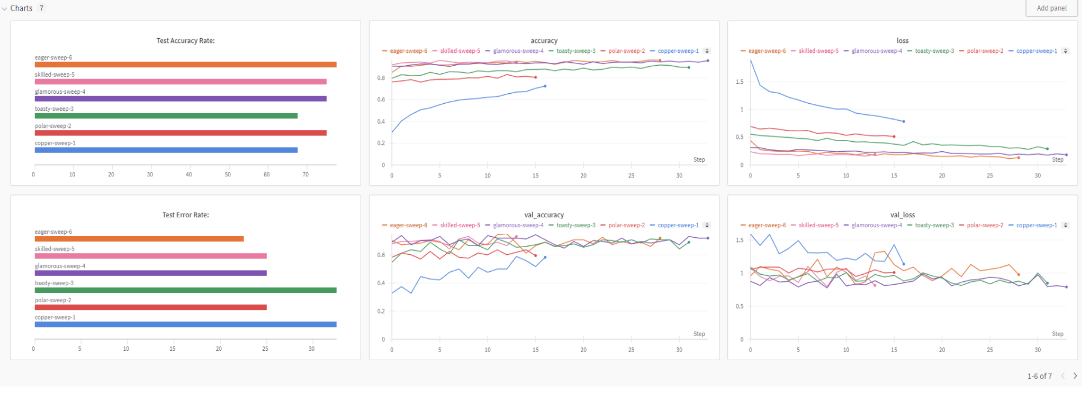

## 실험 모델 6
- learning rate = 0.00009
- batch size = 24->32  #배치사이즈 수정
- kernel = (2,2)   
- Dence_filter = 255
- test accuracy(%) = 77.5
- optimizer = rmsprop
- epochs = 40
- Dence = 255   
- dropout = 30%


In [50]:
BATCH_SIZE = 32

In [51]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [52]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [53]:
# 키 입력
wandb.login(key = "본인의 키를 입력하세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [54]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [55]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (2, 2),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [56]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: s6taqloy
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/s6taqloy


In [57]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: quuqxwk1 with config:
wandb: 	epoch: 28
wandb: 	learning_rate: 8.748595086859658e-05


Epoch 1/28
23/23 [==============================] - 4s 79ms/step - loss: 3.0428 - accuracy: 0.1975 - val_loss: 1.7969 - val_accuracy: 0.2583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 2/28
23/23 [==============================] - 2s 83ms/step - loss: 1.8156 - accuracy: 0.2681 - val_loss: 1.7262 - val_accuracy: 0.2583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 3/28
23/23 [==============================] - 2s 81ms/step - loss: 1.6463 - accuracy: 0.3225 - val_loss: 1.6526 - val_accuracy: 0.2417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.0s


Epoch 4/28
23/23 [==============================] - 2s 88ms/step - loss: 1.6495 - accuracy: 0.3134 - val_loss: 1.7168 - val_accuracy: 0.3000
Epoch 5/28
23/23 [==============================] - 2s 74ms/step - loss: 1.6033 - accuracy: 0.3279 - val_loss: 1.5750 - val_accuracy: 0.3333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 0.9s


Epoch 6/28
23/23 [==============================] - 2s 82ms/step - loss: 1.5294 - accuracy: 0.3623 - val_loss: 1.5980 - val_accuracy: 0.3250
Epoch 7/28
23/23 [==============================] - 2s 80ms/step - loss: 1.4895 - accuracy: 0.3605 - val_loss: 1.5307 - val_accuracy: 0.2750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 8/28
23/23 [==============================] - 2s 80ms/step - loss: 1.4593 - accuracy: 0.4022 - val_loss: 1.4824 - val_accuracy: 0.3667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 9/28
23/23 [==============================] - 2s 84ms/step - loss: 1.4353 - accuracy: 0.4004 - val_loss: 1.3785 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.0s


Epoch 10/28
23/23 [==============================] - 2s 85ms/step - loss: 1.3412 - accuracy: 0.4638 - val_loss: 1.4152 - val_accuracy: 0.3917
Epoch 11/28
23/23 [==============================] - 2s 79ms/step - loss: 1.3697 - accuracy: 0.4620 - val_loss: 1.3954 - val_accuracy: 0.4500
Epoch 12/28
23/23 [==============================] - 2s 76ms/step - loss: 1.3544 - accuracy: 0.4257 - val_loss: 1.2936 - val_accuracy: 0.4583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 13/28
23/23 [==============================] - 2s 79ms/step - loss: 1.3212 - accuracy: 0.4801 - val_loss: 1.5157 - val_accuracy: 0.3917
Epoch 14/28
23/23 [==============================] - 2s 73ms/step - loss: 1.2937 - accuracy: 0.4620 - val_loss: 1.3741 - val_accuracy: 0.4667
Epoch 15/28
23/23 [==============================] - 2s 77ms/step - loss: 1.2720 - accuracy: 0.4674 - val_loss: 1.2850 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.0s


Epoch 16/28
23/23 [==============================] - 2s 81ms/step - loss: 1.2462 - accuracy: 0.5091 - val_loss: 1.2702 - val_accuracy: 0.4417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 17/28
23/23 [==============================] - 2s 77ms/step - loss: 1.2144 - accuracy: 0.5236 - val_loss: 1.3126 - val_accuracy: 0.4000
Epoch 18/28
23/23 [==============================] - 2s 81ms/step - loss: 1.2246 - accuracy: 0.5217 - val_loss: 1.1623 - val_accuracy: 0.5583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.1s


Epoch 19/28
23/23 [==============================] - 2s 82ms/step - loss: 1.1615 - accuracy: 0.5489 - val_loss: 1.3075 - val_accuracy: 0.4917
Epoch 20/28
23/23 [==============================] - 2s 79ms/step - loss: 1.2034 - accuracy: 0.5290 - val_loss: 1.1855 - val_accuracy: 0.5250
Epoch 21/28
23/23 [==============================] - 2s 70ms/step - loss: 1.0847 - accuracy: 0.5833 - val_loss: 1.2329 - val_accuracy: 0.5000
Epoch 22/28
23/23 [==============================] - 2s 78ms/step - loss: 1.1332 - accuracy: 0.5562 - val_loss: 1.1892 - val_accuracy: 0.5083
Epoch 23/28
23/23 [==============================] - 2s 76ms/step - loss: 1.0637 - accuracy: 0.5815 - val_loss: 1.1543 - val_accuracy: 0.5667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.0s


Epoch 24/28
23/23 [==============================] - 2s 86ms/step - loss: 1.0696 - accuracy: 0.6051 - val_loss: 1.2548 - val_accuracy: 0.4667
Epoch 25/28
23/23 [==============================] - 2s 75ms/step - loss: 1.1183 - accuracy: 0.5562 - val_loss: 1.2087 - val_accuracy: 0.4917
Epoch 26/28
23/23 [==============================] - 2s 73ms/step - loss: 1.0419 - accuracy: 0.6232 - val_loss: 1.0958 - val_accuracy: 0.5833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_075826-quuqxwk1/files/model-best)... Done. 1.8s


Epoch 27/28
23/23 [==============================] - 2s 81ms/step - loss: 1.0876 - accuracy: 0.5833 - val_loss: 1.1900 - val_accuracy: 0.5583
Epoch 28/28
23/23 [==============================] - 2s 78ms/step - loss: 1.0095 - accuracy: 0.6123 - val_loss: 1.1081 - val_accuracy: 0.5917
2/2 - 0s - loss: 1.0153 - accuracy: 0.6750


wandb: Agent Starting Run: u0k4a5u9 with config:
wandb: 	epoch: 33
wandb: 	learning_rate: 5.6656815801218945e-05


Epoch 1/33
23/23 [==============================] - 4s 80ms/step - loss: 1.0098 - accuracy: 0.6105 - val_loss: 1.1131 - val_accuracy: 0.6000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.1s


Epoch 2/33
23/23 [==============================] - 2s 79ms/step - loss: 0.9888 - accuracy: 0.6196 - val_loss: 1.2445 - val_accuracy: 0.5250
Epoch 3/33
23/23 [==============================] - 2s 87ms/step - loss: 0.9470 - accuracy: 0.6286 - val_loss: 1.1824 - val_accuracy: 0.5250
Epoch 4/33
23/23 [==============================] - 2s 75ms/step - loss: 0.8938 - accuracy: 0.6721 - val_loss: 1.1788 - val_accuracy: 0.5333
Epoch 5/33
23/23 [==============================] - 2s 80ms/step - loss: 0.9471 - accuracy: 0.6359 - val_loss: 1.1171 - val_accuracy: 0.5833
Epoch 6/33
23/23 [==============================] - 2s 74ms/step - loss: 0.8984 - accuracy: 0.7011 - val_loss: 1.1544 - val_accuracy: 0.5417
Epoch 7/33
23/23 [==============================] - 2s 78ms/step - loss: 0.8863 - accuracy: 0.6522 - val_loss: 1.0723 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.1s


Epoch 8/33
23/23 [==============================] - 2s 82ms/step - loss: 0.9316 - accuracy: 0.6576 - val_loss: 1.1140 - val_accuracy: 0.4833
Epoch 9/33
23/23 [==============================] - 3s 114ms/step - loss: 0.8593 - accuracy: 0.6812 - val_loss: 1.1071 - val_accuracy: 0.5917
Epoch 10/33
23/23 [==============================] - 2s 77ms/step - loss: 0.8794 - accuracy: 0.6920 - val_loss: 1.2486 - val_accuracy: 0.5333
Epoch 11/33
23/23 [==============================] - 2s 78ms/step - loss: 0.8527 - accuracy: 0.6775 - val_loss: 1.0533 - val_accuracy: 0.5667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.0s


Epoch 12/33
23/23 [==============================] - 2s 78ms/step - loss: 0.8087 - accuracy: 0.6902 - val_loss: 1.1363 - val_accuracy: 0.5083
Epoch 13/33
23/23 [==============================] - 2s 74ms/step - loss: 0.8380 - accuracy: 0.7156 - val_loss: 1.0497 - val_accuracy: 0.5667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.1s


Epoch 14/33
23/23 [==============================] - 2s 88ms/step - loss: 0.8373 - accuracy: 0.6993 - val_loss: 1.1302 - val_accuracy: 0.5333
Epoch 15/33
23/23 [==============================] - 2s 75ms/step - loss: 0.7930 - accuracy: 0.6975 - val_loss: 1.1498 - val_accuracy: 0.5750
Epoch 16/33
23/23 [==============================] - 2s 75ms/step - loss: 0.8109 - accuracy: 0.7065 - val_loss: 1.1234 - val_accuracy: 0.5750
Epoch 17/33
23/23 [==============================] - 2s 77ms/step - loss: 0.8075 - accuracy: 0.6938 - val_loss: 0.9901 - val_accuracy: 0.6417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.1s


Epoch 18/33
23/23 [==============================] - 2s 78ms/step - loss: 0.7751 - accuracy: 0.7246 - val_loss: 0.8604 - val_accuracy: 0.6833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.1s


Epoch 19/33
23/23 [==============================] - 2s 80ms/step - loss: 0.7429 - accuracy: 0.7518 - val_loss: 1.0308 - val_accuracy: 0.5917
Epoch 20/33
23/23 [==============================] - 2s 73ms/step - loss: 0.7438 - accuracy: 0.7192 - val_loss: 1.0574 - val_accuracy: 0.6083
Epoch 21/33
23/23 [==============================] - 2s 81ms/step - loss: 0.7485 - accuracy: 0.7301 - val_loss: 1.0574 - val_accuracy: 0.5583
Epoch 22/33
23/23 [==============================] - 2s 71ms/step - loss: 0.7691 - accuracy: 0.7264 - val_loss: 1.1649 - val_accuracy: 0.5333
Epoch 23/33
23/23 [==============================] - 2s 72ms/step - loss: 0.7426 - accuracy: 0.7192 - val_loss: 1.1221 - val_accuracy: 0.5667 0s - loss: 0.7492 - accuracy: 0.71 - ETA: 0s - loss: 0.7465 - accuracy: 0.71
Epoch 24/33
23/23 [==============================] - 2s 73ms/step - loss: 0.7306 - accuracy: 0.7337 - val_loss: 1.0441 - val_accuracy: 0.5750
Epoch 25/33
23/23 [==============================] - 2s 84ms/step - los

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080032-u0k4a5u9/files/model-best)... Done. 1.1s


2/2 - 0s - loss: 0.8850 - accuracy: 0.7750


wandb: Agent Starting Run: 4ynr0pkp with config:
wandb: 	epoch: 48
wandb: 	learning_rate: 9.301955676446632e-05


Epoch 1/48
23/23 [==============================] - 4s 85ms/step - loss: 0.7526 - accuracy: 0.7391 - val_loss: 1.2355 - val_accuracy: 0.5333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.1s


Epoch 2/48
23/23 [==============================] - 2s 80ms/step - loss: 0.7099 - accuracy: 0.7591 - val_loss: 1.0722 - val_accuracy: 0.5667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.1s


Epoch 3/48
23/23 [==============================] - 2s 84ms/step - loss: 0.6811 - accuracy: 0.7572 - val_loss: 1.0092 - val_accuracy: 0.5917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.0s


Epoch 4/48
23/23 [==============================] - 2s 90ms/step - loss: 0.6476 - accuracy: 0.7572 - val_loss: 1.2481 - val_accuracy: 0.5500
Epoch 5/48
23/23 [==============================] - 2s 77ms/step - loss: 0.6604 - accuracy: 0.7736 - val_loss: 1.0524 - val_accuracy: 0.6000
Epoch 6/48
23/23 [==============================] - 2s 79ms/step - loss: 0.6614 - accuracy: 0.7681 - val_loss: 1.0613 - val_accuracy: 0.6083
Epoch 7/48
23/23 [==============================] - 2s 75ms/step - loss: 0.6400 - accuracy: 0.7591 - val_loss: 0.9605 - val_accuracy: 0.6500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.1s


Epoch 8/48
23/23 [==============================] - 2s 87ms/step - loss: 0.6392 - accuracy: 0.7591 - val_loss: 0.9535 - val_accuracy: 0.6250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 2.4s


Epoch 9/48
23/23 [==============================] - 2s 86ms/step - loss: 0.6114 - accuracy: 0.7772 - val_loss: 1.0040 - val_accuracy: 0.6417
Epoch 10/48
23/23 [==============================] - 2s 77ms/step - loss: 0.5720 - accuracy: 0.7899 - val_loss: 0.8339 - val_accuracy: 0.6583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.1s


Epoch 11/48
23/23 [==============================] - 2s 81ms/step - loss: 0.5920 - accuracy: 0.7971 - val_loss: 0.7780 - val_accuracy: 0.6750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.1s


Epoch 12/48
23/23 [==============================] - 2s 89ms/step - loss: 0.5814 - accuracy: 0.7736 - val_loss: 1.0136 - val_accuracy: 0.6000
Epoch 13/48
23/23 [==============================] - 2s 77ms/step - loss: 0.5832 - accuracy: 0.7989 - val_loss: 0.9478 - val_accuracy: 0.7000
Epoch 14/48
23/23 [==============================] - 2s 79ms/step - loss: 0.5504 - accuracy: 0.8007 - val_loss: 1.2549 - val_accuracy: 0.6250
Epoch 15/48
23/23 [==============================] - 2s 76ms/step - loss: 0.5986 - accuracy: 0.8025 - val_loss: 0.8833 - val_accuracy: 0.6667
Epoch 16/48
23/23 [==============================] - 2s 79ms/step - loss: 0.5635 - accuracy: 0.8152 - val_loss: 0.9143 - val_accuracy: 0.6583
Epoch 17/48
23/23 [==============================] - 2s 83ms/step - loss: 0.5195 - accuracy: 0.8225 - val_loss: 0.9559 - val_accuracy: 0.6500
Epoch 18/48
23/23 [==============================] - 2s 85ms/step - loss: 0.5369 - accuracy: 0.8243 - val_loss: 0.9671 - val_accuracy: 0.6250
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080226-4ynr0pkp/files/model-best)... Done. 1.1s


Epoch 32/48
23/23 [==============================] - 2s 85ms/step - loss: 0.4077 - accuracy: 0.8569 - val_loss: 1.0960 - val_accuracy: 0.6250
Epoch 33/48
23/23 [==============================] - 2s 73ms/step - loss: 0.4155 - accuracy: 0.8623 - val_loss: 1.0374 - val_accuracy: 0.6250
Epoch 34/48
23/23 [==============================] - 2s 80ms/step - loss: 0.3597 - accuracy: 0.8877 - val_loss: 0.9321 - val_accuracy: 0.6667
Epoch 35/48
23/23 [==============================] - 2s 70ms/step - loss: 0.4225 - accuracy: 0.8442 - val_loss: 0.9429 - val_accuracy: 0.6500
Epoch 36/48
23/23 [==============================] - 2s 75ms/step - loss: 0.4378 - accuracy: 0.8496 - val_loss: 0.9201 - val_accuracy: 0.6583
Epoch 37/48
23/23 [==============================] - 2s 71ms/step - loss: 0.3570 - accuracy: 0.8732 - val_loss: 0.7491 - val_accuracy: 0.7083
Epoch 38/48
23/23 [==============================] - 2s 76ms/step - loss: 0.4019 - accuracy: 0.8714 - val_loss: 0.9750 - val_accuracy: 0.6917
Epoch 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m9m9lw8q with config:
wandb: 	epoch: 30
wandb: 	learning_rate: 7.405931899710116e-05


Epoch 1/30
23/23 [==============================] - 4s 87ms/step - loss: 0.3522 - accuracy: 0.8732 - val_loss: 0.8114 - val_accuracy: 0.7167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best)... Done. 0.9s


Epoch 2/30
23/23 [==============================] - 2s 88ms/step - loss: 0.2991 - accuracy: 0.9004 - val_loss: 0.6877 - val_accuracy: 0.7333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best)... Done. 1.0s


Epoch 3/30
23/23 [==============================] - 2s 85ms/step - loss: 0.2890 - accuracy: 0.9004 - val_loss: 0.9384 - val_accuracy: 0.6667
Epoch 4/30
23/23 [==============================] - 2s 80ms/step - loss: 0.2473 - accuracy: 0.9330 - val_loss: 0.7854 - val_accuracy: 0.7167
Epoch 5/30
23/23 [==============================] - 2s 81ms/step - loss: 0.2900 - accuracy: 0.8967 - val_loss: 0.9137 - val_accuracy: 0.6833
Epoch 6/30
23/23 [==============================] - 2s 85ms/step - loss: 0.2702 - accuracy: 0.9185 - val_loss: 0.7544 - val_accuracy: 0.7417
Epoch 7/30
23/23 [==============================] - 2s 78ms/step - loss: 0.2449 - accuracy: 0.9203 - val_loss: 0.7509 - val_accuracy: 0.7250
Epoch 8/30
23/23 [==============================] - 2s 74ms/step - loss: 0.2461 - accuracy: 0.9330 - val_loss: 0.8011 - val_accuracy: 0.7083
Epoch 9/30
23/23 [==============================] - 2s 78ms/step - loss: 0.3010 - accuracy: 0.9112 - val_loss: 0.7257 - val_accuracy: 0.7333
Epoch 10/30
2

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best)... Done. 0.9s


Epoch 23/30
23/23 [==============================] - 2s 84ms/step - loss: 0.2005 - accuracy: 0.9384 - val_loss: 1.0357 - val_accuracy: 0.7083
Epoch 24/30
23/23 [==============================] - 2s 77ms/step - loss: 0.2463 - accuracy: 0.9275 - val_loss: 0.8800 - val_accuracy: 0.7250
Epoch 25/30
23/23 [==============================] - 2s 76ms/step - loss: 0.1816 - accuracy: 0.9511 - val_loss: 0.9507 - val_accuracy: 0.6833
Epoch 26/30
23/23 [==============================] - 2s 74ms/step - loss: 0.1581 - accuracy: 0.9547 - val_loss: 0.8868 - val_accuracy: 0.7083
Epoch 27/30
23/23 [==============================] - 2s 75ms/step - loss: 0.2212 - accuracy: 0.9312 - val_loss: 0.8813 - val_accuracy: 0.7083
Epoch 28/30
23/23 [==============================] - 2s 83ms/step - loss: 0.1893 - accuracy: 0.9565 - val_loss: 0.6729 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080504-m9m9lw8q/files/model-best)... Done. 1.1s


Epoch 29/30
23/23 [==============================] - 2s 91ms/step - loss: 0.1944 - accuracy: 0.9330 - val_loss: 0.8742 - val_accuracy: 0.7083
Epoch 30/30
23/23 [==============================] - 2s 75ms/step - loss: 0.1764 - accuracy: 0.9438 - val_loss: 1.1019 - val_accuracy: 0.6833
2/2 - 0s - loss: 1.0524 - accuracy: 0.6500


wandb: Agent Starting Run: 9fpzo84i with config:
wandb: 	epoch: 40
wandb: 	learning_rate: 9.64353414884436e-05


Epoch 1/40
23/23 [==============================] - 4s 105ms/step - loss: 0.2799 - accuracy: 0.8986 - val_loss: 0.7345 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_080741-9fpzo84i/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_080741-9fpzo84i/files/model-best)... Done. 1.1s


Epoch 2/40
23/23 [==============================] - 2s 89ms/step - loss: 0.2053 - accuracy: 0.9312 - val_loss: 0.8132 - val_accuracy: 0.7250
Epoch 3/40
23/23 [==============================] - 2s 89ms/step - loss: 0.2468 - accuracy: 0.9221 - val_loss: 0.7413 - val_accuracy: 0.7250
Epoch 4/40
23/23 [==============================] - 2s 76ms/step - loss: 0.2112 - accuracy: 0.9257 - val_loss: 0.8746 - val_accuracy: 0.7250
Epoch 5/40
23/23 [==============================] - 2s 77ms/step - loss: 0.1919 - accuracy: 0.9384 - val_loss: 0.7480 - val_accuracy: 0.7667
Epoch 6/40
23/23 [==============================] - 2s 78ms/step - loss: 0.1905 - accuracy: 0.9312 - val_loss: 0.9345 - val_accuracy: 0.6750
Epoch 7/40
23/23 [==============================] - 2s 81ms/step - loss: 0.1868 - accuracy: 0.9511 - val_loss: 0.8732 - val_accuracy: 0.7167
Epoch 8/40
23/23 [==============================] - 2s 80ms/step - loss: 0.1766 - accuracy: 0.9420 - val_loss: 1.1080 - val_accuracy: 0.6417
Epoch 9/40
23

wandb: Agent Starting Run: z6wgzcpv with config:
wandb: 	epoch: 37
wandb: 	learning_rate: 9.525028240900854e-05


Epoch 1/37
23/23 [==============================] - 4s 84ms/step - loss: 0.1403 - accuracy: 0.9511 - val_loss: 1.1317 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best)... Done. 1.1s


Epoch 2/37
23/23 [==============================] - 2s 78ms/step - loss: 0.1092 - accuracy: 0.9620 - val_loss: 0.8213 - val_accuracy: 0.7333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best)... Done. 1.1s


Epoch 3/37
23/23 [==============================] - 2s 87ms/step - loss: 0.1109 - accuracy: 0.9764 - val_loss: 1.0233 - val_accuracy: 0.7333
Epoch 4/37
23/23 [==============================] - 2s 77ms/step - loss: 0.1115 - accuracy: 0.9656 - val_loss: 0.9366 - val_accuracy: 0.6833
Epoch 5/37
23/23 [==============================] - 2s 81ms/step - loss: 0.1119 - accuracy: 0.9692 - val_loss: 0.8299 - val_accuracy: 0.7417
Epoch 6/37
23/23 [==============================] - 2s 78ms/step - loss: 0.0883 - accuracy: 0.9819 - val_loss: 0.7919 - val_accuracy: 0.7833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best)... Done. 1.1s


Epoch 7/37
23/23 [==============================] - 2s 77ms/step - loss: 0.1176 - accuracy: 0.9547 - val_loss: 0.8211 - val_accuracy: 0.7417
Epoch 8/37
23/23 [==============================] - 2s 81ms/step - loss: 0.1024 - accuracy: 0.9783 - val_loss: 0.6908 - val_accuracy: 0.7833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_081018-z6wgzcpv/files/model-best)... Done. 1.1s


Epoch 9/37
23/23 [==============================] - 2s 83ms/step - loss: 0.0851 - accuracy: 0.9801 - val_loss: 1.0293 - val_accuracy: 0.7167
Epoch 10/37
23/23 [==============================] - 2s 77ms/step - loss: 0.1080 - accuracy: 0.9710 - val_loss: 0.8261 - val_accuracy: 0.7750
Epoch 11/37
23/23 [==============================] - 2s 72ms/step - loss: 0.1093 - accuracy: 0.9674 - val_loss: 0.9410 - val_accuracy: 0.7500
Epoch 12/37
23/23 [==============================] - 2s 96ms/step - loss: 0.0741 - accuracy: 0.9891 - val_loss: 0.9276 - val_accuracy: 0.7167
Epoch 13/37
23/23 [==============================] - 2s 76ms/step - loss: 0.0992 - accuracy: 0.9728 - val_loss: 1.0576 - val_accuracy: 0.7667
Epoch 14/37
23/23 [==============================] - 2s 78ms/step - loss: 0.1180 - accuracy: 0.9692 - val_loss: 0.8562 - val_accuracy: 0.7333
Epoch 15/37
23/23 [==============================] - 2s 77ms/step - loss: 0.1054 - accuracy: 0.9601 - val_loss: 0.8184 - val_accuracy: 0.7500
Epoch 1

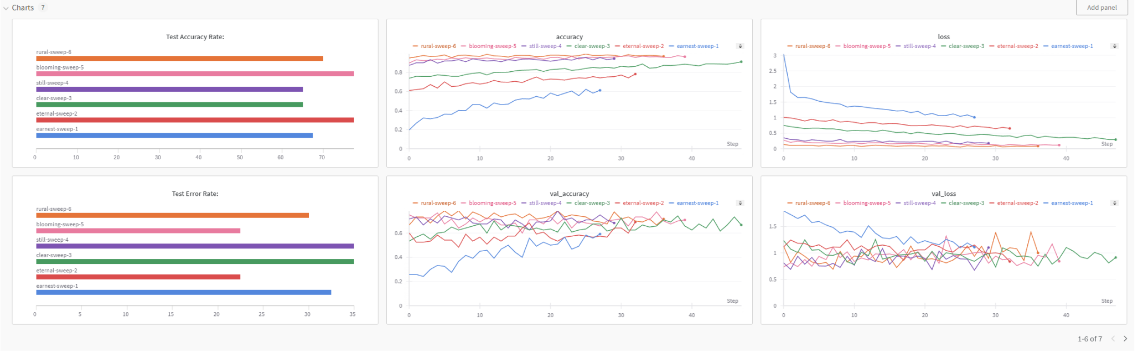

## 실험 모델 7
- learning rate = 0.00009
- batch size = 32  
- kernel = (2,2)   
- test accuracy(%) = 75
- optimizer = rmsprop
- epochs = 50
- Dence = 255->128   
- dropout = 30%
- cnnlayer filter 16,32,64,64에서 -> 16,32,32,32로 조정


In [58]:
BATCH_SIZE = 32

In [59]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [60]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [61]:
# 키 입력
wandb.login(key = "본인의 키를 입력하세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [62]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [63]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (2, 2),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [64]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: 8y7tqnj6
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/8y7tqnj6


In [65]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: 1c0xctoo with config:
wandb: 	epoch: 30
wandb: 	learning_rate: 2.6139699875753267e-05


Epoch 1/30
23/23 [==============================] - 4s 82ms/step - loss: 1.9253 - accuracy: 0.2011 - val_loss: 1.7659 - val_accuracy: 0.1500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 2/30
23/23 [==============================] - 2s 78ms/step - loss: 1.7293 - accuracy: 0.2518 - val_loss: 1.7855 - val_accuracy: 0.2417
Epoch 3/30
23/23 [==============================] - 2s 110ms/step - loss: 1.6852 - accuracy: 0.2935 - val_loss: 1.7421 - val_accuracy: 0.3333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 4/30
23/23 [==============================] - 2s 77ms/step - loss: 1.6742 - accuracy: 0.2935 - val_loss: 1.6419 - val_accuracy: 0.2833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 5/30
23/23 [==============================] - 2s 74ms/step - loss: 1.6515 - accuracy: 0.2826 - val_loss: 1.6800 - val_accuracy: 0.3000
Epoch 6/30
23/23 [==============================] - 2s 75ms/step - loss: 1.5969 - accuracy: 0.3514 - val_loss: 1.5989 - val_accuracy: 0.2250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 7/30
23/23 [==============================] - 2s 76ms/step - loss: 1.5632 - accuracy: 0.3370 - val_loss: 1.5895 - val_accuracy: 0.3000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 8/30
23/23 [==============================] - 2s 74ms/step - loss: 1.5497 - accuracy: 0.3533 - val_loss: 1.5531 - val_accuracy: 0.3250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 9/30
23/23 [==============================] - 2s 75ms/step - loss: 1.5191 - accuracy: 0.3641 - val_loss: 1.6451 - val_accuracy: 0.2917
Epoch 10/30
23/23 [==============================] - 2s 85ms/step - loss: 1.5347 - accuracy: 0.3696 - val_loss: 1.5698 - val_accuracy: 0.2833
Epoch 11/30
23/23 [==============================] - 2s 75ms/step - loss: 1.5194 - accuracy: 0.3967 - val_loss: 1.5692 - val_accuracy: 0.3083
Epoch 12/30
23/23 [==============================] - 2s 74ms/step - loss: 1.4647 - accuracy: 0.4022 - val_loss: 1.5555 - val_accuracy: 0.2917
Epoch 13/30
23/23 [==============================] - 2s 70ms/step - loss: 1.4421 - accuracy: 0.4149 - val_loss: 1.5643 - val_accuracy: 0.3083
Epoch 14/30
23/23 [==============================] - 2s 74ms/step - loss: 1.4515 - accuracy: 0.3895 - val_loss: 1.5783 - val_accuracy: 0.3250
Epoch 15/30
23/23 [==============================] - 2s 72ms/step - loss: 1.4348 - accuracy: 0.4185 - val_loss: 1.4818 - val_accuracy: 0.3500
INFO:te

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 16/30
23/23 [==============================] - 2s 79ms/step - loss: 1.4079 - accuracy: 0.4203 - val_loss: 1.5183 - val_accuracy: 0.3750
Epoch 17/30
23/23 [==============================] - 2s 70ms/step - loss: 1.4248 - accuracy: 0.4257 - val_loss: 1.4676 - val_accuracy: 0.4250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 18/30
23/23 [==============================] - 2s 74ms/step - loss: 1.3590 - accuracy: 0.4457 - val_loss: 1.5021 - val_accuracy: 0.3417
Epoch 19/30
23/23 [==============================] - 2s 79ms/step - loss: 1.4189 - accuracy: 0.3931 - val_loss: 1.4206 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 20/30
23/23 [==============================] - 2s 78ms/step - loss: 1.3496 - accuracy: 0.4620 - val_loss: 1.4579 - val_accuracy: 0.4000
Epoch 21/30
23/23 [==============================] - 2s 80ms/step - loss: 1.3749 - accuracy: 0.4438 - val_loss: 1.4059 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 22/30
23/23 [==============================] - 2s 77ms/step - loss: 1.3523 - accuracy: 0.4493 - val_loss: 1.3626 - val_accuracy: 0.4417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 23/30
23/23 [==============================] - 2s 76ms/step - loss: 1.3422 - accuracy: 0.4620 - val_loss: 1.4460 - val_accuracy: 0.4083
Epoch 24/30
23/23 [==============================] - 2s 72ms/step - loss: 1.3648 - accuracy: 0.4457 - val_loss: 1.4351 - val_accuracy: 0.3667
Epoch 25/30
23/23 [==============================] - 2s 84ms/step - loss: 1.2821 - accuracy: 0.5018 - val_loss: 1.3729 - val_accuracy: 0.4333
Epoch 26/30
23/23 [==============================] - 2s 83ms/step - loss: 1.3437 - accuracy: 0.4457 - val_loss: 1.2841 - val_accuracy: 0.5167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082251-1c0xctoo/files/model-best)... Done. 0.1s


Epoch 27/30
23/23 [==============================] - 2s 78ms/step - loss: 1.3022 - accuracy: 0.4801 - val_loss: 1.3383 - val_accuracy: 0.3833
Epoch 28/30
23/23 [==============================] - 2s 76ms/step - loss: 1.3319 - accuracy: 0.4420 - val_loss: 1.3791 - val_accuracy: 0.4083
Epoch 29/30
23/23 [==============================] - 2s 75ms/step - loss: 1.2540 - accuracy: 0.5036 - val_loss: 1.3798 - val_accuracy: 0.4667
Epoch 30/30
23/23 [==============================] - 2s 72ms/step - loss: 1.2937 - accuracy: 0.4692 - val_loss: 1.3480 - val_accuracy: 0.4250
2/2 - 0s - loss: 1.1334 - accuracy: 0.6250


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r54kyg4f with config:
wandb: 	epoch: 18
wandb: 	learning_rate: 2.2450549742913986e-05


Epoch 1/18
23/23 [==============================] - 4s 86ms/step - loss: 1.2928 - accuracy: 0.4801 - val_loss: 1.3778 - val_accuracy: 0.4417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best)... Done. 0.1s


Epoch 2/18
23/23 [==============================] - 2s 89ms/step - loss: 1.2563 - accuracy: 0.4692 - val_loss: 1.3174 - val_accuracy: 0.3917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best)... Done. 0.1s


Epoch 3/18
23/23 [==============================] - 2s 82ms/step - loss: 1.2438 - accuracy: 0.5109 - val_loss: 1.3629 - val_accuracy: 0.4417
Epoch 4/18
23/23 [==============================] - 2s 78ms/step - loss: 1.2543 - accuracy: 0.5072 - val_loss: 1.3454 - val_accuracy: 0.4500
Epoch 5/18
23/23 [==============================] - 2s 84ms/step - loss: 1.2220 - accuracy: 0.4928 - val_loss: 1.3492 - val_accuracy: 0.4250
Epoch 6/18
23/23 [==============================] - 2s 76ms/step - loss: 1.2258 - accuracy: 0.5362 - val_loss: 1.3418 - val_accuracy: 0.4583
Epoch 7/18
23/23 [==============================] - 2s 78ms/step - loss: 1.2184 - accuracy: 0.5236 - val_loss: 1.3389 - val_accuracy: 0.4750
Epoch 8/18
23/23 [==============================] - 2s 74ms/step - loss: 1.2188 - accuracy: 0.5018 - val_loss: 1.3047 - val_accuracy: 0.4833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best)... Done. 0.1s


Epoch 9/18
23/23 [==============================] - 2s 83ms/step - loss: 1.1935 - accuracy: 0.5254 - val_loss: 1.4175 - val_accuracy: 0.3917
Epoch 10/18
23/23 [==============================] - 2s 80ms/step - loss: 1.2056 - accuracy: 0.5181 - val_loss: 1.3349 - val_accuracy: 0.4917
Epoch 11/18
23/23 [==============================] - 2s 82ms/step - loss: 1.2131 - accuracy: 0.5199 - val_loss: 1.2405 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082538-r54kyg4f/files/model-best)... Done. 0.1s


Epoch 12/18
23/23 [==============================] - 2s 80ms/step - loss: 1.1735 - accuracy: 0.5362 - val_loss: 1.2914 - val_accuracy: 0.4333
Epoch 13/18
23/23 [==============================] - 2s 68ms/step - loss: 1.2221 - accuracy: 0.5272 - val_loss: 1.4060 - val_accuracy: 0.4583
Epoch 14/18
23/23 [==============================] - 2s 79ms/step - loss: 1.1478 - accuracy: 0.5543 - val_loss: 1.3083 - val_accuracy: 0.5167
Epoch 15/18
23/23 [==============================] - 2s 74ms/step - loss: 1.1542 - accuracy: 0.5562 - val_loss: 1.3036 - val_accuracy: 0.4583
Epoch 16/18
23/23 [==============================] - 2s 78ms/step - loss: 1.1708 - accuracy: 0.5399 - val_loss: 1.3073 - val_accuracy: 0.4583
Epoch 17/18
23/23 [==============================] - 2s 87ms/step - loss: 1.2121 - accuracy: 0.5236 - val_loss: 1.2675 - val_accuracy: 0.4750
Epoch 18/18
23/23 [==============================] - 2s 80ms/step - loss: 1.1296 - accuracy: 0.5634 - val_loss: 1.3202 - val_accuracy: 0.4500
2/2 - 

wandb: Agent Starting Run: vfph2y2f with config:
wandb: 	epoch: 44
wandb: 	learning_rate: 4.5543081410738205e-05


Epoch 1/44
23/23 [==============================] - 4s 83ms/step - loss: 1.3885 - accuracy: 0.4547 - val_loss: 1.3418 - val_accuracy: 0.4500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 2/44
23/23 [==============================] - 2s 83ms/step - loss: 1.1912 - accuracy: 0.5326 - val_loss: 1.4660 - val_accuracy: 0.4417
Epoch 3/44
23/23 [==============================] - 2s 81ms/step - loss: 1.2400 - accuracy: 0.5018 - val_loss: 1.4067 - val_accuracy: 0.4667
Epoch 4/44
23/23 [==============================] - 2s 78ms/step - loss: 1.1747 - accuracy: 0.5543 - val_loss: 1.2507 - val_accuracy: 0.5167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 5/44
23/23 [==============================] - 2s 82ms/step - loss: 1.1680 - accuracy: 0.5326 - val_loss: 1.3280 - val_accuracy: 0.4417
Epoch 6/44
23/23 [==============================] - 2s 76ms/step - loss: 1.2201 - accuracy: 0.5236 - val_loss: 1.2459 - val_accuracy: 0.5167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 7/44
23/23 [==============================] - 2s 106ms/step - loss: 1.1834 - accuracy: 0.5489 - val_loss: 1.2494 - val_accuracy: 0.4917
Epoch 8/44
23/23 [==============================] - 2s 79ms/step - loss: 1.0983 - accuracy: 0.5851 - val_loss: 1.1918 - val_accuracy: 0.5333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 9/44
23/23 [==============================] - 2s 78ms/step - loss: 1.1828 - accuracy: 0.5272 - val_loss: 1.2852 - val_accuracy: 0.4667loss: 1.1963 - accuracy
Epoch 10/44
23/23 [==============================] - 2s 79ms/step - loss: 1.1724 - accuracy: 0.5091 - val_loss: 1.2565 - val_accuracy: 0.5000
Epoch 11/44
23/23 [==============================] - 2s 76ms/step - loss: 1.1665 - accuracy: 0.5290 - val_loss: 1.2947 - val_accuracy: 0.4917
Epoch 12/44
23/23 [==============================] - 2s 91ms/step - loss: 1.0795 - accuracy: 0.5833 - val_loss: 1.2713 - val_accuracy: 0.4833
Epoch 13/44
23/23 [==============================] - 2s 77ms/step - loss: 1.0793 - accuracy: 0.5833 - val_loss: 1.2740 - val_accuracy: 0.5000
Epoch 14/44
23/23 [==============================] - 2s 79ms/step - loss: 1.1289 - accuracy: 0.5525 - val_loss: 1.1513 - val_accuracy: 0.4917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 15/44
23/23 [==============================] - 2s 79ms/step - loss: 1.0643 - accuracy: 0.5725 - val_loss: 1.1905 - val_accuracy: 0.5333
Epoch 16/44
23/23 [==============================] - 2s 81ms/step - loss: 1.0759 - accuracy: 0.5851 - val_loss: 1.2487 - val_accuracy: 0.4417
Epoch 17/44
23/23 [==============================] - 2s 81ms/step - loss: 1.0598 - accuracy: 0.5815 - val_loss: 1.2814 - val_accuracy: 0.4417
Epoch 18/44
23/23 [==============================] - 2s 74ms/step - loss: 1.0992 - accuracy: 0.5670 - val_loss: 1.1494 - val_accuracy: 0.5667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 19/44
23/23 [==============================] - 2s 85ms/step - loss: 1.1138 - accuracy: 0.5380 - val_loss: 1.1484 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.3s


Epoch 20/44
23/23 [==============================] - 2s 79ms/step - loss: 1.0558 - accuracy: 0.5725 - val_loss: 1.1916 - val_accuracy: 0.5250ss: 1.0504 - accuracy: 
Epoch 21/44
23/23 [==============================] - 2s 75ms/step - loss: 1.0326 - accuracy: 0.5906 - val_loss: 1.1854 - val_accuracy: 0.5250
Epoch 22/44
23/23 [==============================] - 2s 80ms/step - loss: 1.0741 - accuracy: 0.5942 - val_loss: 1.1483 - val_accuracy: 0.5750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 23/44
23/23 [==============================] - 2s 96ms/step - loss: 0.9933 - accuracy: 0.5906 - val_loss: 1.1369 - val_accuracy: 0.5083
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 24/44
23/23 [==============================] - 2s 77ms/step - loss: 1.0615 - accuracy: 0.6105 - val_loss: 1.1816 - val_accuracy: 0.5167
Epoch 25/44
23/23 [==============================] - 2s 81ms/step - loss: 1.0149 - accuracy: 0.6087 - val_loss: 1.1922 - val_accuracy: 0.5333
Epoch 26/44
23/23 [==============================] - 2s 82ms/step - loss: 1.0240 - accuracy: 0.6014 - val_loss: 1.1253 - val_accuracy: 0.5500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 27/44
23/23 [==============================] - 2s 77ms/step - loss: 1.0482 - accuracy: 0.5960 - val_loss: 1.2064 - val_accuracy: 0.5583
Epoch 28/44
23/23 [==============================] - 2s 74ms/step - loss: 0.9757 - accuracy: 0.6322 - val_loss: 1.1457 - val_accuracy: 0.5500
Epoch 29/44
23/23 [==============================] - 2s 80ms/step - loss: 0.9891 - accuracy: 0.6196 - val_loss: 1.0897 - val_accuracy: 0.6000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 30/44
23/23 [==============================] - 2s 82ms/step - loss: 0.9976 - accuracy: 0.6178 - val_loss: 1.2532 - val_accuracy: 0.4833
Epoch 31/44
23/23 [==============================] - 2s 74ms/step - loss: 0.9454 - accuracy: 0.6341 - val_loss: 1.2024 - val_accuracy: 0.5667
Epoch 32/44
23/23 [==============================] - 2s 75ms/step - loss: 0.9778 - accuracy: 0.6322 - val_loss: 1.2556 - val_accuracy: 0.5417
Epoch 33/44
23/23 [==============================] - 2s 76ms/step - loss: 0.9955 - accuracy: 0.6141 - val_loss: 1.0922 - val_accuracy: 0.5583
Epoch 34/44
23/23 [==============================] - 2s 82ms/step - loss: 0.9497 - accuracy: 0.6558 - val_loss: 1.2132 - val_accuracy: 0.5750
Epoch 35/44
23/23 [==============================] - 2s 73ms/step - loss: 0.9560 - accuracy: 0.6232 - val_loss: 1.0898 - val_accuracy: 0.5917
Epoch 36/44
23/23 [==============================] - 2s 81ms/step - loss: 0.9762 - accuracy: 0.6286 - val_loss: 1.1904 - val_accuracy: 0.5917
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 40/44
23/23 [==============================] - 2s 81ms/step - loss: 0.9491 - accuracy: 0.6286 - val_loss: 1.1986 - val_accuracy: 0.5667
Epoch 41/44
23/23 [==============================] - 2s 78ms/step - loss: 0.9502 - accuracy: 0.6467 - val_loss: 0.9830 - val_accuracy: 0.5917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082639-vfph2y2f/files/model-best)... Done. 0.1s


Epoch 42/44
23/23 [==============================] - 2s 86ms/step - loss: 0.9316 - accuracy: 0.6540 - val_loss: 1.0771 - val_accuracy: 0.5500
Epoch 43/44
23/23 [==============================] - 2s 74ms/step - loss: 0.8903 - accuracy: 0.6667 - val_loss: 1.0365 - val_accuracy: 0.5417
Epoch 44/44
23/23 [==============================] - 2s 79ms/step - loss: 0.9543 - accuracy: 0.6467 - val_loss: 1.0612 - val_accuracy: 0.5833
2/2 - 0s - loss: 0.8278 - accuracy: 0.7250


wandb: Agent Starting Run: trxm8sr0 with config:
wandb: 	epoch: 50
wandb: 	learning_rate: 9.519943328852636e-05


Epoch 1/50
23/23 [==============================] - 4s 99ms/step - loss: 1.2218 - accuracy: 0.5290 - val_loss: 1.1454 - val_accuracy: 0.4917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 2/50
23/23 [==============================] - 2s 79ms/step - loss: 1.0240 - accuracy: 0.6196 - val_loss: 1.1239 - val_accuracy: 0.5667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 3/50
23/23 [==============================] - 2s 83ms/step - loss: 0.9637 - accuracy: 0.6467 - val_loss: 1.2798 - val_accuracy: 0.4917
Epoch 4/50
23/23 [==============================] - 2s 76ms/step - loss: 1.0375 - accuracy: 0.6087 - val_loss: 1.0646 - val_accuracy: 0.5917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 5/50
23/23 [==============================] - 2s 78ms/step - loss: 0.9564 - accuracy: 0.6359 - val_loss: 1.0380 - val_accuracy: 0.5583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 6/50
23/23 [==============================] - 2s 73ms/step - loss: 0.9505 - accuracy: 0.6341 - val_loss: 1.2856 - val_accuracy: 0.5333
Epoch 7/50
23/23 [==============================] - 2s 80ms/step - loss: 0.9121 - accuracy: 0.6467 - val_loss: 1.1272 - val_accuracy: 0.5750
Epoch 8/50
23/23 [==============================] - 2s 74ms/step - loss: 1.0104 - accuracy: 0.6051 - val_loss: 1.2379 - val_accuracy: 0.5083
Epoch 9/50
23/23 [==============================] - 2s 76ms/step - loss: 0.8798 - accuracy: 0.6793 - val_loss: 1.1014 - val_accuracy: 0.6167
Epoch 10/50
23/23 [==============================] - 2s 70ms/step - loss: 0.9535 - accuracy: 0.6540 - val_loss: 1.0917 - val_accuracy: 0.6083
Epoch 11/50
23/23 [==============================] - 2s 74ms/step - loss: 0.8553 - accuracy: 0.6812 - val_loss: 1.0866 - val_accuracy: 0.5667
Epoch 12/50
23/23 [==============================] - 2s 73ms/step - loss: 0.8799 - accuracy: 0.6685 - val_loss: 1.0432 - val_accuracy: 0.6083
Epoch 13/5

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 19/50
23/23 [==============================] - 2s 84ms/step - loss: 0.8407 - accuracy: 0.6993 - val_loss: 1.1239 - val_accuracy: 0.5083
Epoch 20/50
23/23 [==============================] - 2s 73ms/step - loss: 0.7881 - accuracy: 0.7120 - val_loss: 1.0591 - val_accuracy: 0.6083
Epoch 21/50
23/23 [==============================] - 2s 77ms/step - loss: 0.8052 - accuracy: 0.6902 - val_loss: 1.0082 - val_accuracy: 0.5917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 22/50
23/23 [==============================] - 2s 73ms/step - loss: 0.7820 - accuracy: 0.7192 - val_loss: 0.9595 - val_accuracy: 0.6167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 23/50
23/23 [==============================] - 2s 76ms/step - loss: 0.8269 - accuracy: 0.6884 - val_loss: 1.0056 - val_accuracy: 0.6167
Epoch 24/50
23/23 [==============================] - 2s 74ms/step - loss: 0.7361 - accuracy: 0.7210 - val_loss: 0.9875 - val_accuracy: 0.5833
Epoch 25/50
23/23 [==============================] - 2s 76ms/step - loss: 0.8187 - accuracy: 0.6938 - val_loss: 1.0382 - val_accuracy: 0.6333
Epoch 26/50
23/23 [==============================] - 2s 77ms/step - loss: 0.7430 - accuracy: 0.7373 - val_loss: 0.9663 - val_accuracy: 0.6000
Epoch 27/50
23/23 [==============================] - 2s 68ms/step - loss: 0.7358 - accuracy: 0.7446 - val_loss: 1.0958 - val_accuracy: 0.6000
Epoch 28/50
23/23 [==============================] - 2s 76ms/step - loss: 0.7692 - accuracy: 0.7301 - val_loss: 1.1234 - val_accuracy: 0.6000
Epoch 29/50
23/23 [==============================] - 2s 75ms/step - loss: 0.6988 - accuracy: 0.7500 - val_loss: 1.0768 - val_accuracy: 0.6083
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 32/50
23/23 [==============================] - 2s 75ms/step - loss: 0.7366 - accuracy: 0.7409 - val_loss: 0.9510 - val_accuracy: 0.6333
Epoch 33/50
23/23 [==============================] - 2s 69ms/step - loss: 0.6709 - accuracy: 0.7591 - val_loss: 1.0786 - val_accuracy: 0.6250
Epoch 34/50
23/23 [==============================] - 2s 74ms/step - loss: 0.7249 - accuracy: 0.7373 - val_loss: 0.9140 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 35/50
23/23 [==============================] - 2s 74ms/step - loss: 0.7036 - accuracy: 0.7591 - val_loss: 0.9904 - val_accuracy: 0.5333
Epoch 36/50
23/23 [==============================] - 2s 78ms/step - loss: 0.6765 - accuracy: 0.7645 - val_loss: 1.0567 - val_accuracy: 0.6750
Epoch 37/50
23/23 [==============================] - 2s 71ms/step - loss: 0.6299 - accuracy: 0.7826 - val_loss: 1.1080 - val_accuracy: 0.5500
Epoch 38/50
23/23 [==============================] - 2s 79ms/step - loss: 0.7253 - accuracy: 0.7283 - val_loss: 0.9037 - val_accuracy: 0.6500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 39/50
23/23 [==============================] - 2s 75ms/step - loss: 0.6243 - accuracy: 0.7717 - val_loss: 0.8990 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 40/50
23/23 [==============================] - 2s 73ms/step - loss: 0.6995 - accuracy: 0.7482 - val_loss: 1.0417 - val_accuracy: 0.6250
Epoch 41/50
23/23 [==============================] - 1s 66ms/step - loss: 0.5629 - accuracy: 0.8134 - val_loss: 0.8758 - val_accuracy: 0.6583
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 42/50
23/23 [==============================] - 2s 83ms/step - loss: 0.6181 - accuracy: 0.7989 - val_loss: 1.1107 - val_accuracy: 0.6417
Epoch 43/50
23/23 [==============================] - 2s 68ms/step - loss: 0.6368 - accuracy: 0.7826 - val_loss: 0.9671 - val_accuracy: 0.5917
Epoch 44/50
23/23 [==============================] - 2s 79ms/step - loss: 0.6062 - accuracy: 0.7645 - val_loss: 0.8744 - val_accuracy: 0.6417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_082857-trxm8sr0/files/model-best)... Done. 0.1s


Epoch 45/50
23/23 [==============================] - 2s 78ms/step - loss: 0.6149 - accuracy: 0.7844 - val_loss: 0.9995 - val_accuracy: 0.6167
Epoch 46/50
23/23 [==============================] - 2s 70ms/step - loss: 0.6153 - accuracy: 0.7591 - val_loss: 0.9485 - val_accuracy: 0.6667
Epoch 47/50
23/23 [==============================] - 2s 96ms/step - loss: 0.6382 - accuracy: 0.7627 - val_loss: 1.0109 - val_accuracy: 0.6917
Epoch 48/50
23/23 [==============================] - 2s 92ms/step - loss: 0.6347 - accuracy: 0.7699 - val_loss: 0.9080 - val_accuracy: 0.5917
Epoch 49/50
23/23 [==============================] - 2s 69ms/step - loss: 0.5780 - accuracy: 0.7953 - val_loss: 1.0076 - val_accuracy: 0.6583
Epoch 50/50
23/23 [==============================] - 2s 80ms/step - loss: 0.6233 - accuracy: 0.7717 - val_loss: 0.9678 - val_accuracy: 0.5917
2/2 - 0s - loss: 0.8949 - accuracy: 0.7500


wandb: Agent Starting Run: 64vtkheb with config:
wandb: 	epoch: 27
wandb: 	learning_rate: 3.677118632786392e-05


Epoch 1/27
23/23 [==============================] - 4s 82ms/step - loss: 0.5290 - accuracy: 0.8043 - val_loss: 0.9041 - val_accuracy: 0.6500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 2/27
23/23 [==============================] - 2s 77ms/step - loss: 0.5095 - accuracy: 0.8261 - val_loss: 0.8991 - val_accuracy: 0.6917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 3/27
23/23 [==============================] - 2s 80ms/step - loss: 0.4647 - accuracy: 0.8424 - val_loss: 0.8530 - val_accuracy: 0.6833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 4/27
23/23 [==============================] - 2s 81ms/step - loss: 0.5009 - accuracy: 0.8297 - val_loss: 0.9085 - val_accuracy: 0.6750
Epoch 5/27
23/23 [==============================] - 2s 74ms/step - loss: 0.4819 - accuracy: 0.8406 - val_loss: 0.8821 - val_accuracy: 0.7083
Epoch 6/27
23/23 [==============================] - 2s 72ms/step - loss: 0.4703 - accuracy: 0.8297 - val_loss: 0.9962 - val_accuracy: 0.6250
Epoch 7/27
23/23 [==============================] - 2s 71ms/step - loss: 0.4599 - accuracy: 0.8587 - val_loss: 0.8376 - val_accuracy: 0.7417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 8/27
23/23 [==============================] - 2s 74ms/step - loss: 0.4812 - accuracy: 0.8152 - val_loss: 0.9859 - val_accuracy: 0.6000
Epoch 9/27
23/23 [==============================] - 2s 75ms/step - loss: 0.4911 - accuracy: 0.8297 - val_loss: 0.8258 - val_accuracy: 0.7000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 10/27
23/23 [==============================] - 2s 79ms/step - loss: 0.4780 - accuracy: 0.8315 - val_loss: 0.9352 - val_accuracy: 0.6583
Epoch 11/27
23/23 [==============================] - 2s 74ms/step - loss: 0.5006 - accuracy: 0.8152 - val_loss: 0.9333 - val_accuracy: 0.6667
Epoch 12/27
23/23 [==============================] - 2s 73ms/step - loss: 0.4538 - accuracy: 0.8496 - val_loss: 0.8405 - val_accuracy: 0.6667
Epoch 13/27
23/23 [==============================] - 2s 74ms/step - loss: 0.4490 - accuracy: 0.8460 - val_loss: 0.7955 - val_accuracy: 0.7167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 14/27
23/23 [==============================] - 2s 76ms/step - loss: 0.4468 - accuracy: 0.8514 - val_loss: 0.8273 - val_accuracy: 0.7000
Epoch 15/27
23/23 [==============================] - 2s 74ms/step - loss: 0.4810 - accuracy: 0.8351 - val_loss: 0.9584 - val_accuracy: 0.6167
Epoch 16/27
23/23 [==============================] - 2s 74ms/step - loss: 0.4656 - accuracy: 0.8406 - val_loss: 0.7701 - val_accuracy: 0.7083 0s - loss: 0.4609 - accura
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 17/27
23/23 [==============================] - 2s 76ms/step - loss: 0.4270 - accuracy: 0.8641 - val_loss: 0.9451 - val_accuracy: 0.6583
Epoch 18/27
23/23 [==============================] - 2s 75ms/step - loss: 0.4556 - accuracy: 0.8442 - val_loss: 0.8784 - val_accuracy: 0.6500
Epoch 19/27
23/23 [==============================] - 2s 75ms/step - loss: 0.4332 - accuracy: 0.8551 - val_loss: 0.9055 - val_accuracy: 0.6417
Epoch 20/27
23/23 [==============================] - 2s 75ms/step - loss: 0.4896 - accuracy: 0.8388 - val_loss: 0.9089 - val_accuracy: 0.6667
Epoch 21/27
23/23 [==============================] - 2s 75ms/step - loss: 0.4350 - accuracy: 0.8605 - val_loss: 0.8688 - val_accuracy: 0.7250
Epoch 22/27
23/23 [==============================] - 2s 73ms/step - loss: 0.4371 - accuracy: 0.8514 - val_loss: 0.8692 - val_accuracy: 0.6583
Epoch 23/27
23/23 [==============================] - 2s 76ms/step - loss: 0.4456 - accuracy: 0.8424 - val_loss: 0.9454 - val_accuracy: 0.6500
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083120-64vtkheb/files/model-best)... Done. 0.1s


Epoch 25/27
23/23 [==============================] - 2s 79ms/step - loss: 0.4550 - accuracy: 0.8370 - val_loss: 0.9209 - val_accuracy: 0.6583
Epoch 26/27
23/23 [==============================] - 2s 76ms/step - loss: 0.4325 - accuracy: 0.8714 - val_loss: 1.0351 - val_accuracy: 0.6167
Epoch 27/27
23/23 [==============================] - 2s 75ms/step - loss: 0.4446 - accuracy: 0.8623 - val_loss: 0.8671 - val_accuracy: 0.7250
2/2 - 0s - loss: 0.8975 - accuracy: 0.7000


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1o00t31i with config:
wandb: 	epoch: 33
wandb: 	learning_rate: 7.069004882713071e-05


Epoch 1/33
23/23 [==============================] - 4s 84ms/step - loss: 0.4778 - accuracy: 0.8297 - val_loss: 1.0236 - val_accuracy: 0.6417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best)... Done. 0.4s


Epoch 2/33
23/23 [==============================] - 2s 90ms/step - loss: 0.5139 - accuracy: 0.8243 - val_loss: 1.0556 - val_accuracy: 0.5833
Epoch 3/33
23/23 [==============================] - 2s 105ms/step - loss: 0.4917 - accuracy: 0.8424 - val_loss: 0.8766 - val_accuracy: 0.7000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best)... Done. 0.1s


Epoch 4/33
23/23 [==============================] - 2s 79ms/step - loss: 0.4324 - accuracy: 0.8388 - val_loss: 0.9580 - val_accuracy: 0.6583
Epoch 5/33
23/23 [==============================] - 2s 79ms/step - loss: 0.4613 - accuracy: 0.8424 - val_loss: 0.9120 - val_accuracy: 0.6750
Epoch 6/33
23/23 [==============================] - 2s 74ms/step - loss: 0.4127 - accuracy: 0.8623 - val_loss: 0.8073 - val_accuracy: 0.6833
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best)... Done. 0.1s


Epoch 7/33
23/23 [==============================] - 2s 71ms/step - loss: 0.4582 - accuracy: 0.8315 - val_loss: 0.9655 - val_accuracy: 0.6333
Epoch 8/33
23/23 [==============================] - 2s 75ms/step - loss: 0.4481 - accuracy: 0.8496 - val_loss: 0.9268 - val_accuracy: 0.6417
Epoch 9/33
23/23 [==============================] - 2s 73ms/step - loss: 0.4570 - accuracy: 0.8243 - val_loss: 0.9091 - val_accuracy: 0.6250- loss: 0.4484 - accuracy: 0.
Epoch 10/33
23/23 [==============================] - 2s 74ms/step - loss: 0.4342 - accuracy: 0.8442 - val_loss: 0.9078 - val_accuracy: 0.6833
Epoch 11/33
23/23 [==============================] - 2s 69ms/step - loss: 0.4160 - accuracy: 0.8424 - val_loss: 0.9885 - val_accuracy: 0.5917
Epoch 12/33
23/23 [==============================] - 2s 70ms/step - loss: 0.4361 - accuracy: 0.8496 - val_loss: 0.8285 - val_accuracy: 0.7000
Epoch 13/33
23/23 [==============================] - 2s 67ms/step - loss: 0.4772 - accuracy: 0.8478 - val_loss: 1.0408 - v

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best)... Done. 0.1s


Epoch 22/33
23/23 [==============================] - 2s 80ms/step - loss: 0.4252 - accuracy: 0.8351 - val_loss: 1.0151 - val_accuracy: 0.6583
Epoch 23/33
23/23 [==============================] - 2s 70ms/step - loss: 0.4016 - accuracy: 0.8641 - val_loss: 1.2275 - val_accuracy: 0.6333
Epoch 24/33
23/23 [==============================] - 2s 72ms/step - loss: 0.4041 - accuracy: 0.8587 - val_loss: 0.7395 - val_accuracy: 0.7333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_083252-1o00t31i/files/model-best)... Done. 0.1s


Epoch 25/33
23/23 [==============================] - 2s 74ms/step - loss: 0.3889 - accuracy: 0.8750 - val_loss: 0.8156 - val_accuracy: 0.6917
Epoch 26/33
23/23 [==============================] - 2s 74ms/step - loss: 0.4189 - accuracy: 0.8460 - val_loss: 1.0290 - val_accuracy: 0.6250
Epoch 27/33
23/23 [==============================] - 2s 85ms/step - loss: 0.3527 - accuracy: 0.8822 - val_loss: 1.0294 - val_accuracy: 0.6417
Epoch 28/33
23/23 [==============================] - 2s 75ms/step - loss: 0.3933 - accuracy: 0.8678 - val_loss: 0.8827 - val_accuracy: 0.6500
Epoch 29/33
23/23 [==============================] - 2s 70ms/step - loss: 0.4144 - accuracy: 0.8659 - val_loss: 0.9050 - val_accuracy: 0.6000
Epoch 30/33
23/23 [==============================] - 2s 76ms/step - loss: 0.3621 - accuracy: 0.8623 - val_loss: 0.9340 - val_accuracy: 0.6167
Epoch 31/33
23/23 [==============================] - 2s 81ms/step - loss: 0.3716 - accuracy: 0.8714 - val_loss: 0.7973 - val_accuracy: 0.6917
Epoch 

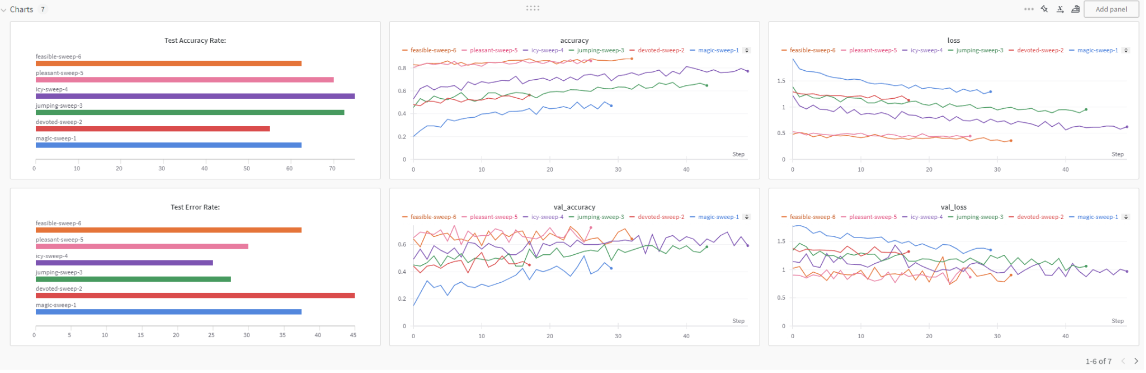

## 실험 모델 14
- learning rate = 0.000006
- batch size = 32  #배치사이즈 수정
- kernel = (3,3)   
- Dence_filter = 255
- test accuracy(%) = 67.5
- optimizer = rmsprop
- epochs = 34
- Dence = 255   
- dropout = 30%

In [2]:
# 모델 작업 - 함수화 
from tensorflow.keras.regularizers import l2
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [ ]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.00001,
            "max" : 0.001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [37]:
# 키 입력
wandb.login(key = "본인키를 입력해 주세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [39]:
# wandb 모델 훈련 함수
from tensorflow. keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[early_stopping,WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [40]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (3, 3),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [41]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"minkyu{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: kq7ug956
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/kq7ug956


In [42]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: 7k5s08q9 with config:
wandb: 	epoch: 48
wandb: 	learning_rate: 0.00019801270892518252


Epoch 1/48
23/23 [==============================] - 4s 99ms/step - loss: 3.6956 - accuracy: 0.2296 - val_loss: 1.5258 - val_accuracy: 0.4375
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 2/48
23/23 [==============================] - 2s 100ms/step - loss: 1.6499 - accuracy: 0.3247 - val_loss: 1.5268 - val_accuracy: 0.3500
Epoch 3/48
23/23 [==============================] - 2s 100ms/step - loss: 1.4993 - accuracy: 0.3791 - val_loss: 1.2976 - val_accuracy: 0.4875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.2s


Epoch 4/48
23/23 [==============================] - 2s 97ms/step - loss: 1.4079 - accuracy: 0.4361 - val_loss: 1.3769 - val_accuracy: 0.3938
Epoch 5/48
23/23 [==============================] - 2s 92ms/step - loss: 1.3197 - accuracy: 0.4524 - val_loss: 1.2013 - val_accuracy: 0.5312loss: 1.3293 - accuracy: 
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 6/48
23/23 [==============================] - 2s 99ms/step - loss: 1.2314 - accuracy: 0.4986 - val_loss: 1.1664 - val_accuracy: 0.5312
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 7/48
23/23 [==============================] - 2s 95ms/step - loss: 1.2412 - accuracy: 0.4959 - val_loss: 1.0750 - val_accuracy: 0.5813
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 8/48
23/23 [==============================] - 2s 100ms/step - loss: 1.1801 - accuracy: 0.5557 - val_loss: 1.1002 - val_accuracy: 0.5250
Epoch 9/48
23/23 [==============================] - 2s 93ms/step - loss: 1.1555 - accuracy: 0.5421 - val_loss: 1.0796 - val_accuracy: 0.5688
Epoch 10/48
23/23 [==============================] - 2s 90ms/step - loss: 1.1002 - accuracy: 0.5693 - val_loss: 1.1390 - val_accuracy: 0.5437
Epoch 11/48
23/23 [==============================] - 2s 110ms/step - loss: 1.0860 - accuracy: 0.5734 - val_loss: 1.0800 - val_accuracy: 0.5813
Epoch 12/48
23/23 [==============================] - 2s 94ms/step - loss: 0.9848 - accuracy: 0.6196 - val_loss: 1.0680 - val_accuracy: 0.5500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.0s


Epoch 13/48
23/23 [==============================] - 2s 96ms/step - loss: 1.0255 - accuracy: 0.6087 - val_loss: 0.9318 - val_accuracy: 0.6438
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.9s


Epoch 14/48
23/23 [==============================] - 2s 98ms/step - loss: 0.9247 - accuracy: 0.6576 - val_loss: 1.0085 - val_accuracy: 0.6062
Epoch 15/48
23/23 [==============================] - 2s 92ms/step - loss: 0.9288 - accuracy: 0.6671 - val_loss: 1.1006 - val_accuracy: 0.5625
Epoch 16/48
23/23 [==============================] - 2s 89ms/step - loss: 0.8841 - accuracy: 0.6753 - val_loss: 0.9616 - val_accuracy: 0.6250
Epoch 17/48
23/23 [==============================] - 2s 91ms/step - loss: 0.8447 - accuracy: 0.6834 - val_loss: 0.9718 - val_accuracy: 0.6187
Epoch 18/48
23/23 [==============================] - 2s 91ms/step - loss: 0.8506 - accuracy: 0.6834 - val_loss: 1.0206 - val_accuracy: 0.5938
Epoch 19/48
23/23 [==============================] - 2s 86ms/step - loss: 0.8387 - accuracy: 0.6957 - val_loss: 1.0023 - val_accuracy: 0.6062
Epoch 20/48
23/23 [==============================] - 2s 92ms/step - loss: 0.8215 - accuracy: 0.6984 - val_loss: 0.9896 - val_accuracy: 0.6125
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 23/48
23/23 [==============================] - 2s 97ms/step - loss: 0.6978 - accuracy: 0.7568 - val_loss: 1.0477 - val_accuracy: 0.6375
Epoch 24/48
23/23 [==============================] - 2s 92ms/step - loss: 0.6397 - accuracy: 0.7636 - val_loss: 0.9439 - val_accuracy: 0.5875
Epoch 25/48
23/23 [==============================] - 2s 84ms/step - loss: 0.6922 - accuracy: 0.7432 - val_loss: 0.7964 - val_accuracy: 0.7250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 26/48
23/23 [==============================] - 2s 95ms/step - loss: 0.6173 - accuracy: 0.7840 - val_loss: 0.7159 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 0.9s


Epoch 27/48
23/23 [==============================] - 2s 99ms/step - loss: 0.6387 - accuracy: 0.7690 - val_loss: 1.0732 - val_accuracy: 0.6000
Epoch 28/48
23/23 [==============================] - 2s 84ms/step - loss: 0.6240 - accuracy: 0.7745 - val_loss: 0.8950 - val_accuracy: 0.6562
Epoch 29/48
23/23 [==============================] - 2s 96ms/step - loss: 0.6006 - accuracy: 0.7880 - val_loss: 0.8553 - val_accuracy: 0.6125
Epoch 30/48
23/23 [==============================] - 2s 84ms/step - loss: 0.5506 - accuracy: 0.7921 - val_loss: 0.9283 - val_accuracy: 0.6313
Epoch 31/48
23/23 [==============================] - 2s 96ms/step - loss: 0.5170 - accuracy: 0.8234 - val_loss: 0.8752 - val_accuracy: 0.6313
Epoch 32/48
23/23 [==============================] - 2s 87ms/step - loss: 0.4909 - accuracy: 0.8424 - val_loss: 0.7548 - val_accuracy: 0.6687
Epoch 33/48
23/23 [==============================] - 2s 87ms/step - loss: 0.5432 - accuracy: 0.8030 - val_loss: 0.8656 - val_accuracy: 0.6438
Epoch 

wandb: Agent Starting Run: cmpkxf7w with config:
wandb: 	epoch: 43
wandb: 	learning_rate: 0.0003658341375087936


Epoch 1/43
23/23 [==============================] - 4s 97ms/step - loss: 1.1736 - accuracy: 0.6359 - val_loss: 1.1325 - val_accuracy: 0.4750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.1s


Epoch 2/43
23/23 [==============================] - 2s 100ms/step - loss: 0.7599 - accuracy: 0.7079 - val_loss: 1.0519 - val_accuracy: 0.5875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 0.9s


Epoch 3/43
23/23 [==============================] - 2s 100ms/step - loss: 0.7867 - accuracy: 0.7024 - val_loss: 0.9603 - val_accuracy: 0.6313
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.1s


Epoch 4/43
23/23 [==============================] - 2s 99ms/step - loss: 0.7695 - accuracy: 0.7092 - val_loss: 0.9362 - val_accuracy: 0.6313
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.0s


Epoch 5/43
23/23 [==============================] - 2s 100ms/step - loss: 0.7290 - accuracy: 0.7418 - val_loss: 0.8529 - val_accuracy: 0.6750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 2.8s


Epoch 6/43
23/23 [==============================] - 2s 98ms/step - loss: 0.6608 - accuracy: 0.7554 - val_loss: 1.1318 - val_accuracy: 0.6187
Epoch 7/43
23/23 [==============================] - 2s 90ms/step - loss: 0.6448 - accuracy: 0.7717 - val_loss: 1.0324 - val_accuracy: 0.6125
Epoch 8/43
23/23 [==============================] - 2s 88ms/step - loss: 0.5993 - accuracy: 0.7962 - val_loss: 0.9314 - val_accuracy: 0.6875- loss: 0.6265 - accuracy
Epoch 9/43
23/23 [==============================] - 2s 92ms/step - loss: 0.6230 - accuracy: 0.7867 - val_loss: 1.1242 - val_accuracy: 0.6250
Epoch 10/43
23/23 [==============================] - 2s 85ms/step - loss: 0.5617 - accuracy: 0.7921 - val_loss: 0.9485 - val_accuracy: 0.6187
Epoch 11/43
23/23 [==============================] - 2s 89ms/step - loss: 0.5523 - accuracy: 0.7921 - val_loss: 0.7876 - val_accuracy: 0.7125
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.0s


Epoch 12/43
23/23 [==============================] - 2s 97ms/step - loss: 0.5621 - accuracy: 0.7948 - val_loss: 0.8801 - val_accuracy: 0.6750
Epoch 13/43
23/23 [==============================] - 2s 85ms/step - loss: 0.5002 - accuracy: 0.8302 - val_loss: 0.7815 - val_accuracy: 0.6938
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.8s


Epoch 14/43
23/23 [==============================] - 2s 100ms/step - loss: 0.4685 - accuracy: 0.8247 - val_loss: 0.8859 - val_accuracy: 0.6875
Epoch 15/43
23/23 [==============================] - 2s 88ms/step - loss: 0.4623 - accuracy: 0.8207 - val_loss: 1.2609 - val_accuracy: 0.6062
Epoch 16/43
23/23 [==============================] - 2s 89ms/step - loss: 0.5391 - accuracy: 0.8234 - val_loss: 0.8204 - val_accuracy: 0.6812
Epoch 17/43
23/23 [==============================] - 2s 86ms/step - loss: 0.4192 - accuracy: 0.8560 - val_loss: 0.7321 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.0s


Epoch 18/43
23/23 [==============================] - 2s 96ms/step - loss: 0.4512 - accuracy: 0.8505 - val_loss: 1.0008 - val_accuracy: 0.6625
Epoch 19/43
23/23 [==============================] - 2s 83ms/step - loss: 0.3738 - accuracy: 0.8628 - val_loss: 0.9093 - val_accuracy: 0.7188
Epoch 20/43
23/23 [==============================] - 2s 87ms/step - loss: 0.4374 - accuracy: 0.8397 - val_loss: 0.8584 - val_accuracy: 0.6750
Epoch 21/43
23/23 [==============================] - 2s 84ms/step - loss: 0.3450 - accuracy: 0.8791 - val_loss: 0.8850 - val_accuracy: 0.7188
Epoch 22/43
23/23 [==============================] - 2s 83ms/step - loss: 0.4098 - accuracy: 0.8641 - val_loss: 0.8719 - val_accuracy: 0.7125
Epoch 23/43
23/23 [==============================] - 2s 89ms/step - loss: 0.3325 - accuracy: 0.8832 - val_loss: 0.8654 - val_accuracy: 0.6750
Epoch 24/43
23/23 [==============================] - 2s 92ms/step - loss: 0.3707 - accuracy: 0.8750 - val_loss: 0.6806 - val_accuracy: 0.7312
INFO:t

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.3s


Epoch 25/43
23/23 [==============================] - 2s 93ms/step - loss: 0.2932 - accuracy: 0.9022 - val_loss: 0.8940 - val_accuracy: 0.7375
Epoch 26/43
23/23 [==============================] - 2s 91ms/step - loss: 0.3121 - accuracy: 0.8981 - val_loss: 1.6460 - val_accuracy: 0.5500
Epoch 27/43
23/23 [==============================] - 2s 87ms/step - loss: 0.2947 - accuracy: 0.8940 - val_loss: 0.9081 - val_accuracy: 0.7125
Epoch 28/43
23/23 [==============================] - 2s 89ms/step - loss: 0.2670 - accuracy: 0.9076 - val_loss: 0.8047 - val_accuracy: 0.7250
Epoch 29/43
23/23 [==============================] - 2s 84ms/step - loss: 0.2960 - accuracy: 0.8927 - val_loss: 0.8948 - val_accuracy: 0.7063
Epoch 30/43
23/23 [==============================] - 2s 91ms/step - loss: 0.2493 - accuracy: 0.9226 - val_loss: 0.8222 - val_accuracy: 0.7375
Epoch 31/43
23/23 [==============================] - 2s 86ms/step - loss: 0.2530 - accuracy: 0.9076 - val_loss: 0.8106 - val_accuracy: 0.6938
Epoch 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jsosndb3 with config:
wandb: 	epoch: 11
wandb: 	learning_rate: 0.0002670405958465729


Epoch 1/11
23/23 [==============================] - 4s 93ms/step - loss: 0.3688 - accuracy: 0.8872 - val_loss: 0.6645 - val_accuracy: 0.7625
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094015-jsosndb3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094015-jsosndb3/files/model-best)... Done. 1.1s


Epoch 2/11
23/23 [==============================] - 2s 100ms/step - loss: 0.2496 - accuracy: 0.9226 - val_loss: 0.7506 - val_accuracy: 0.7937
Epoch 3/11
23/23 [==============================] - 2s 93ms/step - loss: 0.2155 - accuracy: 0.9307 - val_loss: 0.8227 - val_accuracy: 0.7188
Epoch 4/11
23/23 [==============================] - 2s 98ms/step - loss: 0.2726 - accuracy: 0.9117 - val_loss: 0.6914 - val_accuracy: 0.7750
Epoch 5/11
23/23 [==============================] - 2s 91ms/step - loss: 0.1791 - accuracy: 0.9443 - val_loss: 0.7888 - val_accuracy: 0.7437
Epoch 6/11
23/23 [==============================] - 2s 90ms/step - loss: 0.2246 - accuracy: 0.9321 - val_loss: 0.7800 - val_accuracy: 0.7625
Epoch 7/11
23/23 [==============================] - 2s 90ms/step - loss: 0.2122 - accuracy: 0.9307 - val_loss: 0.7694 - val_accuracy: 0.7500
Epoch 8/11
23/23 [==============================] - 2s 88ms/step - loss: 0.2135 - accuracy: 0.9334 - val_loss: 0.7264 - val_accuracy: 0.7500
Epoch 9/11
2

wandb: Agent Starting Run: t13xqz5j with config:
wandb: 	epoch: 29
wandb: 	learning_rate: 0.0001291111459208868


Epoch 1/29
23/23 [==============================] - 4s 97ms/step - loss: 0.2508 - accuracy: 0.9144 - val_loss: 0.7738 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.1s


Epoch 2/29
23/23 [==============================] - 2s 99ms/step - loss: 0.1903 - accuracy: 0.9348 - val_loss: 0.7181 - val_accuracy: 0.7875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.1s


Epoch 3/29
23/23 [==============================] - 2s 92ms/step - loss: 0.1994 - accuracy: 0.9307 - val_loss: 0.7215 - val_accuracy: 0.7250
Epoch 4/29
23/23 [==============================] - 2s 91ms/step - loss: 0.1631 - accuracy: 0.9470 - val_loss: 0.6980 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.1s


Epoch 5/29
23/23 [==============================] - 2s 96ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 0.7459 - val_accuracy: 0.7937
Epoch 6/29
23/23 [==============================] - 2s 99ms/step - loss: 0.1578 - accuracy: 0.9443 - val_loss: 0.7669 - val_accuracy: 0.7688
Epoch 7/29
23/23 [==============================] - 2s 84ms/step - loss: 0.1447 - accuracy: 0.9497 - val_loss: 0.7912 - val_accuracy: 0.7500
Epoch 8/29
23/23 [==============================] - 2s 89ms/step - loss: 0.1333 - accuracy: 0.9647 - val_loss: 0.9050 - val_accuracy: 0.7312
Epoch 9/29
23/23 [==============================] - 2s 89ms/step - loss: 0.1588 - accuracy: 0.9348 - val_loss: 0.7347 - val_accuracy: 0.7688
Epoch 10/29
23/23 [==============================] - 2s 92ms/step - loss: 0.1446 - accuracy: 0.9552 - val_loss: 0.6311 - val_accuracy: 0.7875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.9s


Epoch 11/29
23/23 [==============================] - 2s 99ms/step - loss: 0.1066 - accuracy: 0.9647 - val_loss: 0.7176 - val_accuracy: 0.7250
Epoch 12/29
23/23 [==============================] - 2s 92ms/step - loss: 0.1361 - accuracy: 0.9538 - val_loss: 0.7380 - val_accuracy: 0.7625
Epoch 13/29
23/23 [==============================] - 2s 86ms/step - loss: 0.1185 - accuracy: 0.9633 - val_loss: 0.8333 - val_accuracy: 0.7500
Epoch 14/29
23/23 [==============================] - 2s 91ms/step - loss: 0.1258 - accuracy: 0.9579 - val_loss: 0.8599 - val_accuracy: 0.7312
Epoch 15/29
23/23 [==============================] - 2s 86ms/step - loss: 0.1192 - accuracy: 0.9633 - val_loss: 0.7634 - val_accuracy: 0.7625
Epoch 16/29
23/23 [==============================] - 2s 91ms/step - loss: 0.1205 - accuracy: 0.9688 - val_loss: 0.7932 - val_accuracy: 0.7563
Epoch 17/29
23/23 [==============================] - 2s 88ms/step - loss: 0.1132 - accuracy: 0.9728 - val_loss: 0.7283 - val_accuracy: 0.7688
Epoch 

wandb: Agent Starting Run: 976nij2p with config:
wandb: 	epoch: 16
wandb: 	learning_rate: 0.00026021218770335715


Epoch 1/16
23/23 [==============================] - 4s 94ms/step - loss: 0.3051 - accuracy: 0.8913 - val_loss: 0.7002 - val_accuracy: 0.8062
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best)... Done. 1.0s


Epoch 2/16
23/23 [==============================] - 2s 98ms/step - loss: 0.1726 - accuracy: 0.9429 - val_loss: 0.9689 - val_accuracy: 0.7563
Epoch 3/16
23/23 [==============================] - 2s 97ms/step - loss: 0.1658 - accuracy: 0.9457 - val_loss: 0.7571 - val_accuracy: 0.7875
Epoch 4/16
23/23 [==============================] - 2s 86ms/step - loss: 0.1552 - accuracy: 0.9497 - val_loss: 0.8776 - val_accuracy: 0.7188
Epoch 5/16
23/23 [==============================] - 2s 93ms/step - loss: 0.1591 - accuracy: 0.9389 - val_loss: 0.9281 - val_accuracy: 0.7312
Epoch 6/16
23/23 [==============================] - 2s 85ms/step - loss: 0.1614 - accuracy: 0.9592 - val_loss: 0.8584 - val_accuracy: 0.7563
Epoch 7/16
23/23 [==============================] - 2s 89ms/step - loss: 0.1500 - accuracy: 0.9524 - val_loss: 0.9083 - val_accuracy: 0.7312
Epoch 8/16
23/23 [==============================] - 2s 88ms/step - loss: 0.1422 - accuracy: 0.9565 - val_loss: 0.6979 - val_accuracy: 0.7812
INFO:tensorfl

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best)... Done. 1.1s


Epoch 9/16
23/23 [==============================] - 2s 99ms/step - loss: 0.1617 - accuracy: 0.9457 - val_loss: 0.7308 - val_accuracy: 0.7937
Epoch 10/16
23/23 [==============================] - 2s 87ms/step - loss: 0.1303 - accuracy: 0.9647 - val_loss: 0.7541 - val_accuracy: 0.8000
Epoch 11/16
23/23 [==============================] - 2s 89ms/step - loss: 0.1364 - accuracy: 0.9552 - val_loss: 0.7702 - val_accuracy: 0.7937
Epoch 12/16
23/23 [==============================] - 2s 84ms/step - loss: 0.1443 - accuracy: 0.9457 - val_loss: 0.8463 - val_accuracy: 0.7437
Epoch 13/16
23/23 [==============================] - 2s 86ms/step - loss: 0.1098 - accuracy: 0.9647 - val_loss: 0.7854 - val_accuracy: 0.7563
Epoch 14/16
23/23 [==============================] - 2s 86ms/step - loss: 0.1355 - accuracy: 0.9538 - val_loss: 0.7405 - val_accuracy: 0.7375
Epoch 15/16
23/23 [==============================] - 2s 85ms/step - loss: 0.1348 - accuracy: 0.9552 - val_loss: 0.8847 - val_accuracy: 0.7750
Epoch 1

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best)... Done. 1.1s


2/2 - 0s - loss: 1.7333 - accuracy: 0.6750


wandb: Agent Starting Run: plnfs295 with config:
wandb: 	epoch: 18
wandb: 	learning_rate: 0.0002648177074972438


Epoch 1/18
23/23 [==============================] - 4s 98ms/step - loss: 0.2236 - accuracy: 0.9334 - val_loss: 0.9097 - val_accuracy: 0.7688
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 1.1s


Epoch 2/18
23/23 [==============================] - 2s 98ms/step - loss: 0.1194 - accuracy: 0.9620 - val_loss: 0.8123 - val_accuracy: 0.7625
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 0.9s


Epoch 3/18
23/23 [==============================] - 2s 101ms/step - loss: 0.0848 - accuracy: 0.9755 - val_loss: 0.7588 - val_accuracy: 0.8000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 1.0s


Epoch 4/18
23/23 [==============================] - 2s 101ms/step - loss: 0.1552 - accuracy: 0.9484 - val_loss: 0.8054 - val_accuracy: 0.7688
Epoch 5/18
23/23 [==============================] - 2s 85ms/step - loss: 0.1082 - accuracy: 0.9647 - val_loss: 1.0511 - val_accuracy: 0.7437
Epoch 6/18
23/23 [==============================] - 2s 92ms/step - loss: 0.1250 - accuracy: 0.9647 - val_loss: 1.1811 - val_accuracy: 0.7437
Epoch 7/18
23/23 [==============================] - 2s 88ms/step - loss: 0.1014 - accuracy: 0.9742 - val_loss: 0.8085 - val_accuracy: 0.7750
Epoch 8/18
23/23 [==============================] - 2s 90ms/step - loss: 0.0891 - accuracy: 0.9674 - val_loss: 0.7513 - val_accuracy: 0.7688
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 0.9s


Epoch 9/18
23/23 [==============================] - 2s 95ms/step - loss: 0.1099 - accuracy: 0.9633 - val_loss: 0.8403 - val_accuracy: 0.7688
Epoch 10/18
23/23 [==============================] - 2s 84ms/step - loss: 0.1027 - accuracy: 0.9606 - val_loss: 1.0113 - val_accuracy: 0.7563
Epoch 11/18
23/23 [==============================] - 2s 89ms/step - loss: 0.1035 - accuracy: 0.9633 - val_loss: 0.8314 - val_accuracy: 0.7688
Epoch 12/18
23/23 [==============================] - 2s 89ms/step - loss: 0.0900 - accuracy: 0.9769 - val_loss: 1.1249 - val_accuracy: 0.7750
Epoch 13/18
23/23 [==============================] - 2s 85ms/step - loss: 0.0969 - accuracy: 0.9660 - val_loss: 1.4709 - val_accuracy: 0.6438
Epoch 14/18
23/23 [==============================] - 2s 91ms/step - loss: 0.1041 - accuracy: 0.9592 - val_loss: 0.8552 - val_accuracy: 0.7750
Epoch 15/18
23/23 [==============================] - 2s 88ms/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.8019 - val_accuracy: 0.8000
Epoch 1

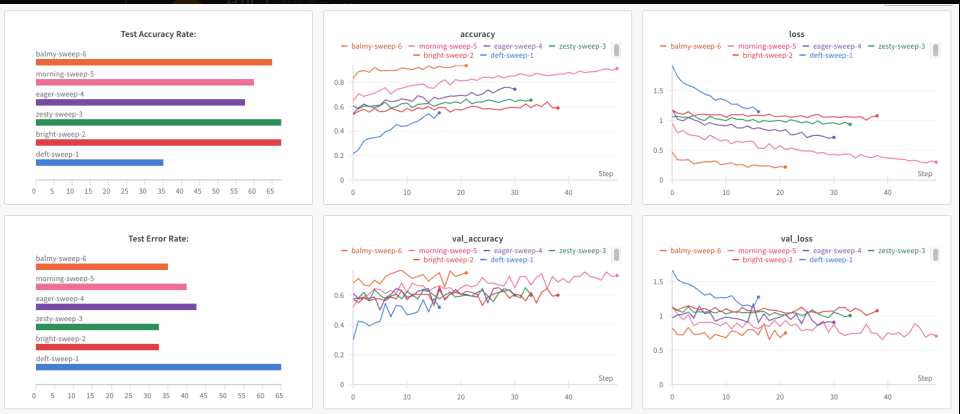

## 실험 모델 15
- learning rate = 0.0002
- learning rate범위 변경 더 낮은값도 찾아볼수있게
        "learning_rate" : {
            "min" : 0.00001,
            "max" : 0.001
            },
- batch size = 32  #배치사이즈 수정
- kernel = (3,3)   
- Dence_filter = 255
- test accuracy(%) = 70
- optimizer = rmsprop
- epochs = 34
- Dence = 255   
- dropout = 30%

In [35]:
# 모델 작업 - 함수화 
from tensorflow.keras.regularizers import l2
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [36]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.00001,
            "max" : 0.001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [37]:
# 키 입력
wandb.login(key = "본인의 키를 입력하세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [39]:
# wandb 모델 훈련 함수
from tensorflow. keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[early_stopping,WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [40]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (3, 3),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [41]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: kq7ug956
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/kq7ug956


In [42]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: 7k5s08q9 with config:
wandb: 	epoch: 48
wandb: 	learning_rate: 0.00019801270892518252


Epoch 1/48
23/23 [==============================] - 4s 99ms/step - loss: 3.6956 - accuracy: 0.2296 - val_loss: 1.5258 - val_accuracy: 0.4375
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 2/48
23/23 [==============================] - 2s 100ms/step - loss: 1.6499 - accuracy: 0.3247 - val_loss: 1.5268 - val_accuracy: 0.3500
Epoch 3/48
23/23 [==============================] - 2s 100ms/step - loss: 1.4993 - accuracy: 0.3791 - val_loss: 1.2976 - val_accuracy: 0.4875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.2s


Epoch 4/48
23/23 [==============================] - 2s 97ms/step - loss: 1.4079 - accuracy: 0.4361 - val_loss: 1.3769 - val_accuracy: 0.3938
Epoch 5/48
23/23 [==============================] - 2s 92ms/step - loss: 1.3197 - accuracy: 0.4524 - val_loss: 1.2013 - val_accuracy: 0.5312loss: 1.3293 - accuracy: 
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 6/48
23/23 [==============================] - 2s 99ms/step - loss: 1.2314 - accuracy: 0.4986 - val_loss: 1.1664 - val_accuracy: 0.5312
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 7/48
23/23 [==============================] - 2s 95ms/step - loss: 1.2412 - accuracy: 0.4959 - val_loss: 1.0750 - val_accuracy: 0.5813
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 8/48
23/23 [==============================] - 2s 100ms/step - loss: 1.1801 - accuracy: 0.5557 - val_loss: 1.1002 - val_accuracy: 0.5250
Epoch 9/48
23/23 [==============================] - 2s 93ms/step - loss: 1.1555 - accuracy: 0.5421 - val_loss: 1.0796 - val_accuracy: 0.5688
Epoch 10/48
23/23 [==============================] - 2s 90ms/step - loss: 1.1002 - accuracy: 0.5693 - val_loss: 1.1390 - val_accuracy: 0.5437
Epoch 11/48
23/23 [==============================] - 2s 110ms/step - loss: 1.0860 - accuracy: 0.5734 - val_loss: 1.0800 - val_accuracy: 0.5813
Epoch 12/48
23/23 [==============================] - 2s 94ms/step - loss: 0.9848 - accuracy: 0.6196 - val_loss: 1.0680 - val_accuracy: 0.5500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.0s


Epoch 13/48
23/23 [==============================] - 2s 96ms/step - loss: 1.0255 - accuracy: 0.6087 - val_loss: 0.9318 - val_accuracy: 0.6438
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.9s


Epoch 14/48
23/23 [==============================] - 2s 98ms/step - loss: 0.9247 - accuracy: 0.6576 - val_loss: 1.0085 - val_accuracy: 0.6062
Epoch 15/48
23/23 [==============================] - 2s 92ms/step - loss: 0.9288 - accuracy: 0.6671 - val_loss: 1.1006 - val_accuracy: 0.5625
Epoch 16/48
23/23 [==============================] - 2s 89ms/step - loss: 0.8841 - accuracy: 0.6753 - val_loss: 0.9616 - val_accuracy: 0.6250
Epoch 17/48
23/23 [==============================] - 2s 91ms/step - loss: 0.8447 - accuracy: 0.6834 - val_loss: 0.9718 - val_accuracy: 0.6187
Epoch 18/48
23/23 [==============================] - 2s 91ms/step - loss: 0.8506 - accuracy: 0.6834 - val_loss: 1.0206 - val_accuracy: 0.5938
Epoch 19/48
23/23 [==============================] - 2s 86ms/step - loss: 0.8387 - accuracy: 0.6957 - val_loss: 1.0023 - val_accuracy: 0.6062
Epoch 20/48
23/23 [==============================] - 2s 92ms/step - loss: 0.8215 - accuracy: 0.6984 - val_loss: 0.9896 - val_accuracy: 0.6125
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 23/48
23/23 [==============================] - 2s 97ms/step - loss: 0.6978 - accuracy: 0.7568 - val_loss: 1.0477 - val_accuracy: 0.6375
Epoch 24/48
23/23 [==============================] - 2s 92ms/step - loss: 0.6397 - accuracy: 0.7636 - val_loss: 0.9439 - val_accuracy: 0.5875
Epoch 25/48
23/23 [==============================] - 2s 84ms/step - loss: 0.6922 - accuracy: 0.7432 - val_loss: 0.7964 - val_accuracy: 0.7250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 1.1s


Epoch 26/48
23/23 [==============================] - 2s 95ms/step - loss: 0.6173 - accuracy: 0.7840 - val_loss: 0.7159 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093505-7k5s08q9/files/model-best)... Done. 0.9s


Epoch 27/48
23/23 [==============================] - 2s 99ms/step - loss: 0.6387 - accuracy: 0.7690 - val_loss: 1.0732 - val_accuracy: 0.6000
Epoch 28/48
23/23 [==============================] - 2s 84ms/step - loss: 0.6240 - accuracy: 0.7745 - val_loss: 0.8950 - val_accuracy: 0.6562
Epoch 29/48
23/23 [==============================] - 2s 96ms/step - loss: 0.6006 - accuracy: 0.7880 - val_loss: 0.8553 - val_accuracy: 0.6125
Epoch 30/48
23/23 [==============================] - 2s 84ms/step - loss: 0.5506 - accuracy: 0.7921 - val_loss: 0.9283 - val_accuracy: 0.6313
Epoch 31/48
23/23 [==============================] - 2s 96ms/step - loss: 0.5170 - accuracy: 0.8234 - val_loss: 0.8752 - val_accuracy: 0.6313
Epoch 32/48
23/23 [==============================] - 2s 87ms/step - loss: 0.4909 - accuracy: 0.8424 - val_loss: 0.7548 - val_accuracy: 0.6687
Epoch 33/48
23/23 [==============================] - 2s 87ms/step - loss: 0.5432 - accuracy: 0.8030 - val_loss: 0.8656 - val_accuracy: 0.6438
Epoch 

wandb: Agent Starting Run: cmpkxf7w with config:
wandb: 	epoch: 43
wandb: 	learning_rate: 0.0003658341375087936


Epoch 1/43
23/23 [==============================] - 4s 97ms/step - loss: 1.1736 - accuracy: 0.6359 - val_loss: 1.1325 - val_accuracy: 0.4750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.1s


Epoch 2/43
23/23 [==============================] - 2s 100ms/step - loss: 0.7599 - accuracy: 0.7079 - val_loss: 1.0519 - val_accuracy: 0.5875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 0.9s


Epoch 3/43
23/23 [==============================] - 2s 100ms/step - loss: 0.7867 - accuracy: 0.7024 - val_loss: 0.9603 - val_accuracy: 0.6313
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.1s


Epoch 4/43
23/23 [==============================] - 2s 99ms/step - loss: 0.7695 - accuracy: 0.7092 - val_loss: 0.9362 - val_accuracy: 0.6313
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.0s


Epoch 5/43
23/23 [==============================] - 2s 100ms/step - loss: 0.7290 - accuracy: 0.7418 - val_loss: 0.8529 - val_accuracy: 0.6750
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 2.8s


Epoch 6/43
23/23 [==============================] - 2s 98ms/step - loss: 0.6608 - accuracy: 0.7554 - val_loss: 1.1318 - val_accuracy: 0.6187
Epoch 7/43
23/23 [==============================] - 2s 90ms/step - loss: 0.6448 - accuracy: 0.7717 - val_loss: 1.0324 - val_accuracy: 0.6125
Epoch 8/43
23/23 [==============================] - 2s 88ms/step - loss: 0.5993 - accuracy: 0.7962 - val_loss: 0.9314 - val_accuracy: 0.6875- loss: 0.6265 - accuracy
Epoch 9/43
23/23 [==============================] - 2s 92ms/step - loss: 0.6230 - accuracy: 0.7867 - val_loss: 1.1242 - val_accuracy: 0.6250
Epoch 10/43
23/23 [==============================] - 2s 85ms/step - loss: 0.5617 - accuracy: 0.7921 - val_loss: 0.9485 - val_accuracy: 0.6187
Epoch 11/43
23/23 [==============================] - 2s 89ms/step - loss: 0.5523 - accuracy: 0.7921 - val_loss: 0.7876 - val_accuracy: 0.7125
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.0s


Epoch 12/43
23/23 [==============================] - 2s 97ms/step - loss: 0.5621 - accuracy: 0.7948 - val_loss: 0.8801 - val_accuracy: 0.6750
Epoch 13/43
23/23 [==============================] - 2s 85ms/step - loss: 0.5002 - accuracy: 0.8302 - val_loss: 0.7815 - val_accuracy: 0.6938
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.8s


Epoch 14/43
23/23 [==============================] - 2s 100ms/step - loss: 0.4685 - accuracy: 0.8247 - val_loss: 0.8859 - val_accuracy: 0.6875
Epoch 15/43
23/23 [==============================] - 2s 88ms/step - loss: 0.4623 - accuracy: 0.8207 - val_loss: 1.2609 - val_accuracy: 0.6062
Epoch 16/43
23/23 [==============================] - 2s 89ms/step - loss: 0.5391 - accuracy: 0.8234 - val_loss: 0.8204 - val_accuracy: 0.6812
Epoch 17/43
23/23 [==============================] - 2s 86ms/step - loss: 0.4192 - accuracy: 0.8560 - val_loss: 0.7321 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.0s


Epoch 18/43
23/23 [==============================] - 2s 96ms/step - loss: 0.4512 - accuracy: 0.8505 - val_loss: 1.0008 - val_accuracy: 0.6625
Epoch 19/43
23/23 [==============================] - 2s 83ms/step - loss: 0.3738 - accuracy: 0.8628 - val_loss: 0.9093 - val_accuracy: 0.7188
Epoch 20/43
23/23 [==============================] - 2s 87ms/step - loss: 0.4374 - accuracy: 0.8397 - val_loss: 0.8584 - val_accuracy: 0.6750
Epoch 21/43
23/23 [==============================] - 2s 84ms/step - loss: 0.3450 - accuracy: 0.8791 - val_loss: 0.8850 - val_accuracy: 0.7188
Epoch 22/43
23/23 [==============================] - 2s 83ms/step - loss: 0.4098 - accuracy: 0.8641 - val_loss: 0.8719 - val_accuracy: 0.7125
Epoch 23/43
23/23 [==============================] - 2s 89ms/step - loss: 0.3325 - accuracy: 0.8832 - val_loss: 0.8654 - val_accuracy: 0.6750
Epoch 24/43
23/23 [==============================] - 2s 92ms/step - loss: 0.3707 - accuracy: 0.8750 - val_loss: 0.6806 - val_accuracy: 0.7312
INFO:t

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093727-cmpkxf7w/files/model-best)... Done. 1.3s


Epoch 25/43
23/23 [==============================] - 2s 93ms/step - loss: 0.2932 - accuracy: 0.9022 - val_loss: 0.8940 - val_accuracy: 0.7375
Epoch 26/43
23/23 [==============================] - 2s 91ms/step - loss: 0.3121 - accuracy: 0.8981 - val_loss: 1.6460 - val_accuracy: 0.5500
Epoch 27/43
23/23 [==============================] - 2s 87ms/step - loss: 0.2947 - accuracy: 0.8940 - val_loss: 0.9081 - val_accuracy: 0.7125
Epoch 28/43
23/23 [==============================] - 2s 89ms/step - loss: 0.2670 - accuracy: 0.9076 - val_loss: 0.8047 - val_accuracy: 0.7250
Epoch 29/43
23/23 [==============================] - 2s 84ms/step - loss: 0.2960 - accuracy: 0.8927 - val_loss: 0.8948 - val_accuracy: 0.7063
Epoch 30/43
23/23 [==============================] - 2s 91ms/step - loss: 0.2493 - accuracy: 0.9226 - val_loss: 0.8222 - val_accuracy: 0.7375
Epoch 31/43
23/23 [==============================] - 2s 86ms/step - loss: 0.2530 - accuracy: 0.9076 - val_loss: 0.8106 - val_accuracy: 0.6938
Epoch 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jsosndb3 with config:
wandb: 	epoch: 11
wandb: 	learning_rate: 0.0002670405958465729


Epoch 1/11
23/23 [==============================] - 4s 93ms/step - loss: 0.3688 - accuracy: 0.8872 - val_loss: 0.6645 - val_accuracy: 0.7625
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094015-jsosndb3/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094015-jsosndb3/files/model-best)... Done. 1.1s


Epoch 2/11
23/23 [==============================] - 2s 100ms/step - loss: 0.2496 - accuracy: 0.9226 - val_loss: 0.7506 - val_accuracy: 0.7937
Epoch 3/11
23/23 [==============================] - 2s 93ms/step - loss: 0.2155 - accuracy: 0.9307 - val_loss: 0.8227 - val_accuracy: 0.7188
Epoch 4/11
23/23 [==============================] - 2s 98ms/step - loss: 0.2726 - accuracy: 0.9117 - val_loss: 0.6914 - val_accuracy: 0.7750
Epoch 5/11
23/23 [==============================] - 2s 91ms/step - loss: 0.1791 - accuracy: 0.9443 - val_loss: 0.7888 - val_accuracy: 0.7437
Epoch 6/11
23/23 [==============================] - 2s 90ms/step - loss: 0.2246 - accuracy: 0.9321 - val_loss: 0.7800 - val_accuracy: 0.7625
Epoch 7/11
23/23 [==============================] - 2s 90ms/step - loss: 0.2122 - accuracy: 0.9307 - val_loss: 0.7694 - val_accuracy: 0.7500
Epoch 8/11
23/23 [==============================] - 2s 88ms/step - loss: 0.2135 - accuracy: 0.9334 - val_loss: 0.7264 - val_accuracy: 0.7500
Epoch 9/11
2

wandb: Agent Starting Run: t13xqz5j with config:
wandb: 	epoch: 29
wandb: 	learning_rate: 0.0001291111459208868


Epoch 1/29
23/23 [==============================] - 4s 97ms/step - loss: 0.2508 - accuracy: 0.9144 - val_loss: 0.7738 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.1s


Epoch 2/29
23/23 [==============================] - 2s 99ms/step - loss: 0.1903 - accuracy: 0.9348 - val_loss: 0.7181 - val_accuracy: 0.7875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.1s


Epoch 3/29
23/23 [==============================] - 2s 92ms/step - loss: 0.1994 - accuracy: 0.9307 - val_loss: 0.7215 - val_accuracy: 0.7250
Epoch 4/29
23/23 [==============================] - 2s 91ms/step - loss: 0.1631 - accuracy: 0.9470 - val_loss: 0.6980 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.1s


Epoch 5/29
23/23 [==============================] - 2s 96ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 0.7459 - val_accuracy: 0.7937
Epoch 6/29
23/23 [==============================] - 2s 99ms/step - loss: 0.1578 - accuracy: 0.9443 - val_loss: 0.7669 - val_accuracy: 0.7688
Epoch 7/29
23/23 [==============================] - 2s 84ms/step - loss: 0.1447 - accuracy: 0.9497 - val_loss: 0.7912 - val_accuracy: 0.7500
Epoch 8/29
23/23 [==============================] - 2s 89ms/step - loss: 0.1333 - accuracy: 0.9647 - val_loss: 0.9050 - val_accuracy: 0.7312
Epoch 9/29
23/23 [==============================] - 2s 89ms/step - loss: 0.1588 - accuracy: 0.9348 - val_loss: 0.7347 - val_accuracy: 0.7688
Epoch 10/29
23/23 [==============================] - 2s 92ms/step - loss: 0.1446 - accuracy: 0.9552 - val_loss: 0.6311 - val_accuracy: 0.7875
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094140-t13xqz5j/files/model-best)... Done. 1.9s


Epoch 11/29
23/23 [==============================] - 2s 99ms/step - loss: 0.1066 - accuracy: 0.9647 - val_loss: 0.7176 - val_accuracy: 0.7250
Epoch 12/29
23/23 [==============================] - 2s 92ms/step - loss: 0.1361 - accuracy: 0.9538 - val_loss: 0.7380 - val_accuracy: 0.7625
Epoch 13/29
23/23 [==============================] - 2s 86ms/step - loss: 0.1185 - accuracy: 0.9633 - val_loss: 0.8333 - val_accuracy: 0.7500
Epoch 14/29
23/23 [==============================] - 2s 91ms/step - loss: 0.1258 - accuracy: 0.9579 - val_loss: 0.8599 - val_accuracy: 0.7312
Epoch 15/29
23/23 [==============================] - 2s 86ms/step - loss: 0.1192 - accuracy: 0.9633 - val_loss: 0.7634 - val_accuracy: 0.7625
Epoch 16/29
23/23 [==============================] - 2s 91ms/step - loss: 0.1205 - accuracy: 0.9688 - val_loss: 0.7932 - val_accuracy: 0.7563
Epoch 17/29
23/23 [==============================] - 2s 88ms/step - loss: 0.1132 - accuracy: 0.9728 - val_loss: 0.7283 - val_accuracy: 0.7688
Epoch 

wandb: Agent Starting Run: 976nij2p with config:
wandb: 	epoch: 16
wandb: 	learning_rate: 0.00026021218770335715


Epoch 1/16
23/23 [==============================] - 4s 94ms/step - loss: 0.3051 - accuracy: 0.8913 - val_loss: 0.7002 - val_accuracy: 0.8062
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best)... Done. 1.0s


Epoch 2/16
23/23 [==============================] - 2s 98ms/step - loss: 0.1726 - accuracy: 0.9429 - val_loss: 0.9689 - val_accuracy: 0.7563
Epoch 3/16
23/23 [==============================] - 2s 97ms/step - loss: 0.1658 - accuracy: 0.9457 - val_loss: 0.7571 - val_accuracy: 0.7875
Epoch 4/16
23/23 [==============================] - 2s 86ms/step - loss: 0.1552 - accuracy: 0.9497 - val_loss: 0.8776 - val_accuracy: 0.7188
Epoch 5/16
23/23 [==============================] - 2s 93ms/step - loss: 0.1591 - accuracy: 0.9389 - val_loss: 0.9281 - val_accuracy: 0.7312
Epoch 6/16
23/23 [==============================] - 2s 85ms/step - loss: 0.1614 - accuracy: 0.9592 - val_loss: 0.8584 - val_accuracy: 0.7563
Epoch 7/16
23/23 [==============================] - 2s 89ms/step - loss: 0.1500 - accuracy: 0.9524 - val_loss: 0.9083 - val_accuracy: 0.7312
Epoch 8/16
23/23 [==============================] - 2s 88ms/step - loss: 0.1422 - accuracy: 0.9565 - val_loss: 0.6979 - val_accuracy: 0.7812
INFO:tensorfl

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best)... Done. 1.1s


Epoch 9/16
23/23 [==============================] - 2s 99ms/step - loss: 0.1617 - accuracy: 0.9457 - val_loss: 0.7308 - val_accuracy: 0.7937
Epoch 10/16
23/23 [==============================] - 2s 87ms/step - loss: 0.1303 - accuracy: 0.9647 - val_loss: 0.7541 - val_accuracy: 0.8000
Epoch 11/16
23/23 [==============================] - 2s 89ms/step - loss: 0.1364 - accuracy: 0.9552 - val_loss: 0.7702 - val_accuracy: 0.7937
Epoch 12/16
23/23 [==============================] - 2s 84ms/step - loss: 0.1443 - accuracy: 0.9457 - val_loss: 0.8463 - val_accuracy: 0.7437
Epoch 13/16
23/23 [==============================] - 2s 86ms/step - loss: 0.1098 - accuracy: 0.9647 - val_loss: 0.7854 - val_accuracy: 0.7563
Epoch 14/16
23/23 [==============================] - 2s 86ms/step - loss: 0.1355 - accuracy: 0.9538 - val_loss: 0.7405 - val_accuracy: 0.7375
Epoch 15/16
23/23 [==============================] - 2s 85ms/step - loss: 0.1348 - accuracy: 0.9552 - val_loss: 0.8847 - val_accuracy: 0.7750
Epoch 1

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094301-976nij2p/files/model-best)... Done. 1.1s


2/2 - 0s - loss: 1.7333 - accuracy: 0.6750


wandb: Agent Starting Run: plnfs295 with config:
wandb: 	epoch: 18
wandb: 	learning_rate: 0.0002648177074972438


Epoch 1/18
23/23 [==============================] - 4s 98ms/step - loss: 0.2236 - accuracy: 0.9334 - val_loss: 0.9097 - val_accuracy: 0.7688
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 1.1s


Epoch 2/18
23/23 [==============================] - 2s 98ms/step - loss: 0.1194 - accuracy: 0.9620 - val_loss: 0.8123 - val_accuracy: 0.7625
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 0.9s


Epoch 3/18
23/23 [==============================] - 2s 101ms/step - loss: 0.0848 - accuracy: 0.9755 - val_loss: 0.7588 - val_accuracy: 0.8000
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 1.0s


Epoch 4/18
23/23 [==============================] - 2s 101ms/step - loss: 0.1552 - accuracy: 0.9484 - val_loss: 0.8054 - val_accuracy: 0.7688
Epoch 5/18
23/23 [==============================] - 2s 85ms/step - loss: 0.1082 - accuracy: 0.9647 - val_loss: 1.0511 - val_accuracy: 0.7437
Epoch 6/18
23/23 [==============================] - 2s 92ms/step - loss: 0.1250 - accuracy: 0.9647 - val_loss: 1.1811 - val_accuracy: 0.7437
Epoch 7/18
23/23 [==============================] - 2s 88ms/step - loss: 0.1014 - accuracy: 0.9742 - val_loss: 0.8085 - val_accuracy: 0.7750
Epoch 8/18
23/23 [==============================] - 2s 90ms/step - loss: 0.0891 - accuracy: 0.9674 - val_loss: 0.7513 - val_accuracy: 0.7688
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094434-plnfs295/files/model-best)... Done. 0.9s


Epoch 9/18
23/23 [==============================] - 2s 95ms/step - loss: 0.1099 - accuracy: 0.9633 - val_loss: 0.8403 - val_accuracy: 0.7688
Epoch 10/18
23/23 [==============================] - 2s 84ms/step - loss: 0.1027 - accuracy: 0.9606 - val_loss: 1.0113 - val_accuracy: 0.7563
Epoch 11/18
23/23 [==============================] - 2s 89ms/step - loss: 0.1035 - accuracy: 0.9633 - val_loss: 0.8314 - val_accuracy: 0.7688
Epoch 12/18
23/23 [==============================] - 2s 89ms/step - loss: 0.0900 - accuracy: 0.9769 - val_loss: 1.1249 - val_accuracy: 0.7750
Epoch 13/18
23/23 [==============================] - 2s 85ms/step - loss: 0.0969 - accuracy: 0.9660 - val_loss: 1.4709 - val_accuracy: 0.6438
Epoch 14/18
23/23 [==============================] - 2s 91ms/step - loss: 0.1041 - accuracy: 0.9592 - val_loss: 0.8552 - val_accuracy: 0.7750
Epoch 15/18
23/23 [==============================] - 2s 88ms/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.8019 - val_accuracy: 0.8000
Epoch 1

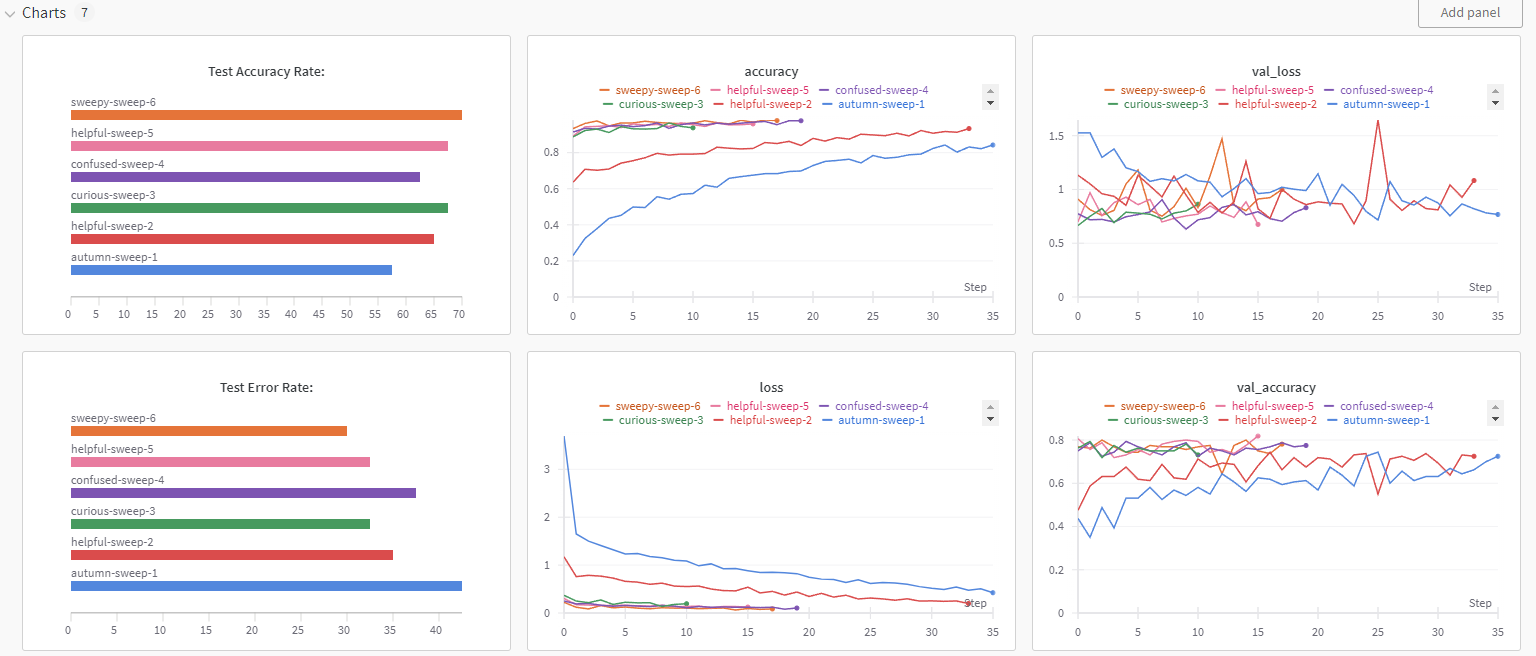

## 실험 모델 16
### optimizer 변경(test acc 가 제일높았던 80%모델에서 rmsprop-> sgd로 optimizer 변경)
- learning rate = 0.00008
- batch size = 24
- kernel = (3,3)   
- Dence_filter = 255
- test accuracy(%) = 52.5
- optimizer = rmsprop-> sgd
- epochs = 24
- Dence = 255   
- dropout = 30%추가

In [66]:
BATCH_SIZE = 24

In [67]:
# 모델 작업 - 함수화 
from tensorflow.keras.regularizers import l2
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [68]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [69]:
# 키 입력
wandb.login(key = "본인의 키를 입력해주세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [70]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [71]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (3, 3),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "sgd",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [72]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: 4clnt0zm
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/4clnt0zm


In [73]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: xa22cplx with config:
wandb: 	epoch: 46
wandb: 	learning_rate: 1.465789066007529e-05


Epoch 1/46
31/31 [==============================] - 4s 72ms/step - loss: 2.2844 - accuracy: 0.1573 - val_loss: 1.8164 - val_accuracy: 0.1786
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 2/46
31/31 [==============================] - 2s 77ms/step - loss: 1.9732 - accuracy: 0.2056 - val_loss: 1.8266 - val_accuracy: 0.2202
Epoch 3/46
31/31 [==============================] - 2s 68ms/step - loss: 1.9950 - accuracy: 0.1909 - val_loss: 1.8137 - val_accuracy: 0.1845
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 4/46
31/31 [==============================] - 2s 73ms/step - loss: 1.9361 - accuracy: 0.2177 - val_loss: 1.7810 - val_accuracy: 0.2560
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 5/46
31/31 [==============================] - 2s 70ms/step - loss: 1.9304 - accuracy: 0.1855 - val_loss: 1.8086 - val_accuracy: 0.2143
Epoch 6/46
31/31 [==============================] - 2s 67ms/step - loss: 1.8826 - accuracy: 0.2016 - val_loss: 1.7909 - val_accuracy: 0.2202
Epoch 7/46
31/31 [==============================] - 2s 81ms/step - loss: 1.9009 - accuracy: 0.2124 - val_loss: 1.8215 - val_accuracy: 0.1726
Epoch 8/46
31/31 [==============================] - 2s 79ms/step - loss: 1.8645 - accuracy: 0.2245 - val_loss: 1.8061 - val_accuracy: 0.1786
Epoch 9/46
31/31 [==============================] - 2s 71ms/step - loss: 1.9035 - accuracy: 0.2151 - val_loss: 1.7797 - val_accuracy: 0.2202
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 10/46
31/31 [==============================] - 2s 68ms/step - loss: 1.8898 - accuracy: 0.2070 - val_loss: 1.7753 - val_accuracy: 0.2262
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 11/46
31/31 [==============================] - 2s 72ms/step - loss: 1.8352 - accuracy: 0.2097 - val_loss: 1.7607 - val_accuracy: 0.2262
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 12/46
31/31 [==============================] - 2s 69ms/step - loss: 1.8692 - accuracy: 0.2083 - val_loss: 1.7496 - val_accuracy: 0.2619
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 13/46
31/31 [==============================] - 2s 68ms/step - loss: 1.8166 - accuracy: 0.2473 - val_loss: 1.7569 - val_accuracy: 0.2500
Epoch 14/46
31/31 [==============================] - 2s 72ms/step - loss: 1.8009 - accuracy: 0.2218 - val_loss: 1.7254 - val_accuracy: 0.2440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 15/46
31/31 [==============================] - 2s 73ms/step - loss: 1.8031 - accuracy: 0.2406 - val_loss: 1.7590 - val_accuracy: 0.2321
Epoch 16/46
31/31 [==============================] - 2s 70ms/step - loss: 1.7893 - accuracy: 0.2433 - val_loss: 1.7008 - val_accuracy: 0.2619
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 17/46
31/31 [==============================] - 2s 69ms/step - loss: 1.7688 - accuracy: 0.2433 - val_loss: 1.7580 - val_accuracy: 0.2083
Epoch 18/46
31/31 [==============================] - 2s 66ms/step - loss: 1.7619 - accuracy: 0.2487 - val_loss: 1.7353 - val_accuracy: 0.2500
Epoch 19/46
31/31 [==============================] - 2s 69ms/step - loss: 1.7897 - accuracy: 0.2419 - val_loss: 1.7261 - val_accuracy: 0.2440 0s - loss: 1.7618 
Epoch 20/46
31/31 [==============================] - 2s 65ms/step - loss: 1.7450 - accuracy: 0.2527 - val_loss: 1.7283 - val_accuracy: 0.2738
Epoch 21/46
31/31 [==============================] - 2s 71ms/step - loss: 1.7724 - accuracy: 0.2554 - val_loss: 1.7198 - val_accuracy: 0.2738
Epoch 22/46
31/31 [==============================] - 2s 63ms/step - loss: 1.7254 - accuracy: 0.2890 - val_loss: 1.7228 - val_accuracy: 0.2857
Epoch 23/46
31/31 [==============================] - 2s 71ms/step - loss: 1.7262 - accuracy: 0.2836 - val_loss: 1.7229 - val_accu

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 37/46
31/31 [==============================] - 2s 78ms/step - loss: 1.6906 - accuracy: 0.2876 - val_loss: 1.7081 - val_accuracy: 0.2738
Epoch 38/46
31/31 [==============================] - 2s 68ms/step - loss: 1.6822 - accuracy: 0.2930 - val_loss: 1.6926 - val_accuracy: 0.2917
Epoch 39/46
31/31 [==============================] - 2s 66ms/step - loss: 1.6844 - accuracy: 0.2688 - val_loss: 1.7299 - val_accuracy: 0.2381
Epoch 40/46
31/31 [==============================] - 2s 70ms/step - loss: 1.6674 - accuracy: 0.2970 - val_loss: 1.7282 - val_accuracy: 0.2381
Epoch 41/46
31/31 [==============================] - 2s 71ms/step - loss: 1.6791 - accuracy: 0.2796 - val_loss: 1.6979 - val_accuracy: 0.2619
Epoch 42/46
31/31 [==============================] - 2s 68ms/step - loss: 1.6889 - accuracy: 0.2688 - val_loss: 1.6937 - val_accuracy: 0.2440
Epoch 43/46
31/31 [==============================] - 2s 69ms/step - loss: 1.6667 - accuracy: 0.2903 - val_loss: 1.7382 - val_accuracy: 0.2381
Epoch 

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.4s


Epoch 45/46
31/31 [==============================] - 2s 77ms/step - loss: 1.6528 - accuracy: 0.3024 - val_loss: 1.6749 - val_accuracy: 0.2738
Epoch 46/46
31/31 [==============================] - 2s 65ms/step - loss: 1.6624 - accuracy: 0.2930 - val_loss: 1.6654 - val_accuracy: 0.3155
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090435-xa22cplx/files/model-best)... Done. 0.3s


2/2 - 0s - loss: 1.6529 - accuracy: 0.3250


wandb: Agent Starting Run: 8c4idvnw with config:
wandb: 	epoch: 13
wandb: 	learning_rate: 4.4186371586730387e-05


Epoch 1/13
31/31 [==============================] - 4s 76ms/step - loss: 1.6982 - accuracy: 0.2728 - val_loss: 1.6756 - val_accuracy: 0.2619s - loss: 1.6856 - accu
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090714-8c4idvnw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090714-8c4idvnw/files/model-best)... Done. 0.4s


Epoch 2/13
31/31 [==============================] - 2s 76ms/step - loss: 1.6746 - accuracy: 0.2944 - val_loss: 1.6899 - val_accuracy: 0.2500
Epoch 3/13
31/31 [==============================] - 2s 73ms/step - loss: 1.6647 - accuracy: 0.2782 - val_loss: 1.6957 - val_accuracy: 0.2560
Epoch 4/13
31/31 [==============================] - 2s 71ms/step - loss: 1.6490 - accuracy: 0.3401 - val_loss: 1.6995 - val_accuracy: 0.2679
Epoch 5/13
31/31 [==============================] - 2s 70ms/step - loss: 1.6516 - accuracy: 0.3078 - val_loss: 1.6820 - val_accuracy: 0.2976
Epoch 6/13
31/31 [==============================] - 2s 69ms/step - loss: 1.6272 - accuracy: 0.3333 - val_loss: 1.6631 - val_accuracy: 0.2976
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090714-8c4idvnw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090714-8c4idvnw/files/model-best)... Done. 0.4s


Epoch 7/13
31/31 [==============================] - 2s 74ms/step - loss: 1.6294 - accuracy: 0.3172 - val_loss: 1.6894 - val_accuracy: 0.2619
Epoch 8/13
31/31 [==============================] - 3s 98ms/step - loss: 1.6376 - accuracy: 0.3011 - val_loss: 1.6792 - val_accuracy: 0.3274
Epoch 9/13
31/31 [==============================] - 2s 72ms/step - loss: 1.6227 - accuracy: 0.3091 - val_loss: 1.6993 - val_accuracy: 0.2917
Epoch 10/13
31/31 [==============================] - 2s 68ms/step - loss: 1.6234 - accuracy: 0.3253 - val_loss: 1.6748 - val_accuracy: 0.2976
Epoch 11/13
31/31 [==============================] - 2s 68ms/step - loss: 1.6385 - accuracy: 0.2930 - val_loss: 1.6967 - val_accuracy: 0.3095
Epoch 12/13
31/31 [==============================] - 2s 68ms/step - loss: 1.6158 - accuracy: 0.3185 - val_loss: 1.6600 - val_accuracy: 0.3155
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090714-8c4idvnw/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090714-8c4idvnw/files/model-best)... Done. 0.4s


Epoch 13/13
31/31 [==============================] - 2s 72ms/step - loss: 1.6418 - accuracy: 0.3051 - val_loss: 1.6641 - val_accuracy: 0.3155
2/2 - 0s - loss: 1.6122 - accuracy: 0.3250


wandb: Agent Starting Run: eigci3je with config:
wandb: 	epoch: 41
wandb: 	learning_rate: 6.74649914059703e-06


Epoch 1/41
31/31 [==============================] - 4s 75ms/step - loss: 1.6151 - accuracy: 0.3105 - val_loss: 1.6862 - val_accuracy: 0.2440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.3s


Epoch 2/41
31/31 [==============================] - 2s 75ms/step - loss: 1.6088 - accuracy: 0.3374 - val_loss: 1.6682 - val_accuracy: 0.3095
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.4s


Epoch 3/41
31/31 [==============================] - 2s 73ms/step - loss: 1.6200 - accuracy: 0.3239 - val_loss: 1.6616 - val_accuracy: 0.3036
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.4s


Epoch 4/41
31/31 [==============================] - 2s 74ms/step - loss: 1.5974 - accuracy: 0.3374 - val_loss: 1.6579 - val_accuracy: 0.2917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.3s


Epoch 5/41
31/31 [==============================] - 2s 74ms/step - loss: 1.6154 - accuracy: 0.3360 - val_loss: 1.6449 - val_accuracy: 0.3274
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.4s


Epoch 6/41
31/31 [==============================] - 2s 72ms/step - loss: 1.6074 - accuracy: 0.3427 - val_loss: 1.6665 - val_accuracy: 0.3095
Epoch 7/41
31/31 [==============================] - 2s 69ms/step - loss: 1.6191 - accuracy: 0.3253 - val_loss: 1.6753 - val_accuracy: 0.2679
Epoch 8/41
31/31 [==============================] - 2s 66ms/step - loss: 1.6084 - accuracy: 0.3374 - val_loss: 1.6438 - val_accuracy: 0.3095
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.4s


Epoch 9/41
31/31 [==============================] - 2s 70ms/step - loss: 1.5977 - accuracy: 0.3468 - val_loss: 1.6652 - val_accuracy: 0.2798
Epoch 10/41
31/31 [==============================] - 2s 73ms/step - loss: 1.6159 - accuracy: 0.3441 - val_loss: 1.6533 - val_accuracy: 0.2917
Epoch 11/41
31/31 [==============================] - 2s 67ms/step - loss: 1.6163 - accuracy: 0.3656 - val_loss: 1.6875 - val_accuracy: 0.2738
Epoch 12/41
31/31 [==============================] - 2s 78ms/step - loss: 1.6136 - accuracy: 0.3401 - val_loss: 1.6785 - val_accuracy: 0.2976
Epoch 13/41
31/31 [==============================] - 2s 65ms/step - loss: 1.6167 - accuracy: 0.3239 - val_loss: 1.6741 - val_accuracy: 0.2679
Epoch 14/41
31/31 [==============================] - 2s 74ms/step - loss: 1.6248 - accuracy: 0.3212 - val_loss: 1.6709 - val_accuracy: 0.2917
Epoch 15/41
31/31 [==============================] - 2s 64ms/step - loss: 1.6159 - accuracy: 0.3118 - val_loss: 1.6483 - val_accuracy: 0.3333
Epoch 1

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_090809-eigci3je/files/model-best)... Done. 0.4s


Epoch 20/41
31/31 [==============================] - 2s 70ms/step - loss: 1.5999 - accuracy: 0.3468 - val_loss: 1.6644 - val_accuracy: 0.3155
Epoch 21/41
31/31 [==============================] - 2s 62ms/step - loss: 1.6112 - accuracy: 0.3454 - val_loss: 1.6412 - val_accuracy: 0.3274
Epoch 22/41
31/31 [==============================] - 2s 67ms/step - loss: 1.5957 - accuracy: 0.3522 - val_loss: 1.6554 - val_accuracy: 0.3274
Epoch 23/41
31/31 [==============================] - 2s 67ms/step - loss: 1.5965 - accuracy: 0.3374 - val_loss: 1.6726 - val_accuracy: 0.2798
Epoch 24/41
31/31 [==============================] - 2s 66ms/step - loss: 1.5825 - accuracy: 0.3360 - val_loss: 1.6740 - val_accuracy: 0.3036
Epoch 25/41
31/31 [==============================] - 2s 63ms/step - loss: 1.6075 - accuracy: 0.3212 - val_loss: 1.6371 - val_accuracy: 0.3393
Epoch 26/41
31/31 [==============================] - 2s 63ms/step - loss: 1.6030 - accuracy: 0.3441 - val_loss: 1.6491 - val_accuracy: 0.3036s - los

wandb: Agent Starting Run: 0qrdrnqn with config:
wandb: 	epoch: 11
wandb: 	learning_rate: 4.293741630663278e-05


Epoch 1/11
31/31 [==============================] - 4s 70ms/step - loss: 1.5763 - accuracy: 0.3118 - val_loss: 1.6694 - val_accuracy: 0.2917
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best)... Done. 0.4s


Epoch 2/11
31/31 [==============================] - 2s 68ms/step - loss: 1.5720 - accuracy: 0.3508 - val_loss: 1.6384 - val_accuracy: 0.3690
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best)... Done. 0.3s


Epoch 3/11
31/31 [==============================] - 2s 75ms/step - loss: 1.5794 - accuracy: 0.3642 - val_loss: 1.6537 - val_accuracy: 0.3512
Epoch 4/11
31/31 [==============================] - 2s 66ms/step - loss: 1.5709 - accuracy: 0.3414 - val_loss: 1.6377 - val_accuracy: 0.3274
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best)... Done. 0.4s


Epoch 5/11
31/31 [==============================] - 2s 70ms/step - loss: 1.5907 - accuracy: 0.3427 - val_loss: 1.6597 - val_accuracy: 0.2798
Epoch 6/11
31/31 [==============================] - 2s 69ms/step - loss: 1.5707 - accuracy: 0.3387 - val_loss: 1.6085 - val_accuracy: 0.3274
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091020-0qrdrnqn/files/model-best)... Done. 0.4s


Epoch 7/11
31/31 [==============================] - 2s 68ms/step - loss: 1.5785 - accuracy: 0.3575 - val_loss: 1.6210 - val_accuracy: 0.3393
Epoch 8/11
31/31 [==============================] - 2s 65ms/step - loss: 1.5612 - accuracy: 0.3522 - val_loss: 1.6628 - val_accuracy: 0.3036
Epoch 9/11
31/31 [==============================] - 2s 63ms/step - loss: 1.5869 - accuracy: 0.3495 - val_loss: 1.6571 - val_accuracy: 0.2857
Epoch 10/11
31/31 [==============================] - 2s 65ms/step - loss: 1.5626 - accuracy: 0.3737 - val_loss: 1.6101 - val_accuracy: 0.3452
Epoch 11/11
31/31 [==============================] - 2s 66ms/step - loss: 1.5657 - accuracy: 0.3817 - val_loss: 1.6340 - val_accuracy: 0.3214
2/2 - 0s - loss: 1.5556 - accuracy: 0.4000


wandb: Agent Starting Run: 2xv7paib with config:
wandb: 	epoch: 24
wandb: 	learning_rate: 8.728212882144466e-05


Epoch 1/24
31/31 [==============================] - 4s 70ms/step - loss: 1.5616 - accuracy: 0.3750 - val_loss: 1.6185 - val_accuracy: 0.3512
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.3s


Epoch 2/24
31/31 [==============================] - 2s 68ms/step - loss: 1.5677 - accuracy: 0.3562 - val_loss: 1.6358 - val_accuracy: 0.3333
Epoch 3/24
31/31 [==============================] - 2s 70ms/step - loss: 1.5553 - accuracy: 0.3911 - val_loss: 1.6082 - val_accuracy: 0.2738
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.4s


Epoch 4/24
31/31 [==============================] - 2s 70ms/step - loss: 1.5513 - accuracy: 0.3656 - val_loss: 1.6120 - val_accuracy: 0.3869
Epoch 5/24
31/31 [==============================] - 2s 67ms/step - loss: 1.5678 - accuracy: 0.3562 - val_loss: 1.6222 - val_accuracy: 0.2798
Epoch 6/24
31/31 [==============================] - 2s 64ms/step - loss: 1.5286 - accuracy: 0.3804 - val_loss: 1.6206 - val_accuracy: 0.3155
Epoch 7/24
31/31 [==============================] - 2s 69ms/step - loss: 1.5411 - accuracy: 0.3683 - val_loss: 1.6365 - val_accuracy: 0.3393
Epoch 8/24
31/31 [==============================] - 2s 65ms/step - loss: 1.5581 - accuracy: 0.3602 - val_loss: 1.5967 - val_accuracy: 0.3571
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.4s


Epoch 9/24
31/31 [==============================] - 2s 69ms/step - loss: 1.5245 - accuracy: 0.3804 - val_loss: 1.5907 - val_accuracy: 0.3333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.4s


Epoch 10/24
31/31 [==============================] - 3s 92ms/step - loss: 1.5440 - accuracy: 0.3831 - val_loss: 1.5619 - val_accuracy: 0.4286
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.4s


Epoch 11/24
31/31 [==============================] - 2s 76ms/step - loss: 1.4906 - accuracy: 0.3952 - val_loss: 1.6106 - val_accuracy: 0.3631
Epoch 12/24
31/31 [==============================] - 2s 68ms/step - loss: 1.5432 - accuracy: 0.3804 - val_loss: 1.6142 - val_accuracy: 0.3571
Epoch 13/24
31/31 [==============================] - 2s 70ms/step - loss: 1.4974 - accuracy: 0.4005 - val_loss: 1.5725 - val_accuracy: 0.3571
Epoch 14/24
31/31 [==============================] - 2s 70ms/step - loss: 1.5187 - accuracy: 0.3750 - val_loss: 1.5864 - val_accuracy: 0.3571
Epoch 15/24
31/31 [==============================] - 2s 70ms/step - loss: 1.4985 - accuracy: 0.4059 - val_loss: 1.5642 - val_accuracy: 0.3333
Epoch 16/24
31/31 [==============================] - 2s 66ms/step - loss: 1.4988 - accuracy: 0.3992 - val_loss: 1.5710 - val_accuracy: 0.3631
Epoch 17/24
31/31 [==============================] - 2s 66ms/step - loss: 1.4593 - accuracy: 0.4180 - val_loss: 1.5439 - val_accuracy: 0.3631
INFO:t

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.4s


Epoch 18/24
31/31 [==============================] - 2s 72ms/step - loss: 1.5008 - accuracy: 0.4046 - val_loss: 1.5654 - val_accuracy: 0.3512
Epoch 19/24
31/31 [==============================] - 2s 68ms/step - loss: 1.4849 - accuracy: 0.3790 - val_loss: 1.5811 - val_accuracy: 0.3571
Epoch 20/24
31/31 [==============================] - 2s 66ms/step - loss: 1.5048 - accuracy: 0.3790 - val_loss: 1.5750 - val_accuracy: 0.3214
Epoch 21/24
31/31 [==============================] - 2s 67ms/step - loss: 1.4827 - accuracy: 0.4153 - val_loss: 1.5709 - val_accuracy: 0.3571
Epoch 22/24
31/31 [==============================] - 2s 69ms/step - loss: 1.5048 - accuracy: 0.3898 - val_loss: 1.5653 - val_accuracy: 0.3571
Epoch 23/24
31/31 [==============================] - 2s 72ms/step - loss: 1.4724 - accuracy: 0.4247 - val_loss: 1.5382 - val_accuracy: 0.4048
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 0.4s


Epoch 24/24
31/31 [==============================] - 2s 68ms/step - loss: 1.4563 - accuracy: 0.4220 - val_loss: 1.5207 - val_accuracy: 0.3631
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091111-2xv7paib/files/model-best)... Done. 1.9s


2/2 - 0s - loss: 1.4440 - accuracy: 0.5250


wandb: Agent Starting Run: rdtm28s9 with config:
wandb: 	epoch: 41
wandb: 	learning_rate: 6.579228890716073e-06


Epoch 1/41
31/31 [==============================] - 4s 71ms/step - loss: 1.4574 - accuracy: 0.4247 - val_loss: 1.5589 - val_accuracy: 0.3690
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best)... Done. 0.4s


Epoch 2/41
31/31 [==============================] - 2s 74ms/step - loss: 1.4466 - accuracy: 0.4516 - val_loss: 1.5511 - val_accuracy: 0.4107
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best)... Done. 0.4s


Epoch 3/41
31/31 [==============================] - 2s 76ms/step - loss: 1.4543 - accuracy: 0.4153 - val_loss: 1.5434 - val_accuracy: 0.3810
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best)... Done. 0.4s


Epoch 4/41
31/31 [==============================] - 2s 73ms/step - loss: 1.4662 - accuracy: 0.4032 - val_loss: 1.5544 - val_accuracy: 0.3750
Epoch 5/41
31/31 [==============================] - 2s 68ms/step - loss: 1.4496 - accuracy: 0.4315 - val_loss: 1.5502 - val_accuracy: 0.3810
Epoch 6/41
31/31 [==============================] - 2s 70ms/step - loss: 1.4460 - accuracy: 0.4194 - val_loss: 1.5349 - val_accuracy: 0.3869
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best)... Done. 0.4s


Epoch 7/41
31/31 [==============================] - 3s 83ms/step - loss: 1.4526 - accuracy: 0.4355 - val_loss: 1.4969 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_091248-rdtm28s9/files/model-best)... Done. 0.4s


Epoch 8/41
31/31 [==============================] - 2s 78ms/step - loss: 1.4481 - accuracy: 0.4341 - val_loss: 1.5419 - val_accuracy: 0.4226
Epoch 9/41
31/31 [==============================] - 2s 69ms/step - loss: 1.4565 - accuracy: 0.4153 - val_loss: 1.5272 - val_accuracy: 0.3869
Epoch 10/41
31/31 [==============================] - 2s 63ms/step - loss: 1.4690 - accuracy: 0.4113 - val_loss: 1.5153 - val_accuracy: 0.4107
Epoch 11/41
31/31 [==============================] - 2s 67ms/step - loss: 1.4617 - accuracy: 0.4126 - val_loss: 1.5793 - val_accuracy: 0.3631
Epoch 12/41
31/31 [==============================] - 2s 62ms/step - loss: 1.4379 - accuracy: 0.4409 - val_loss: 1.5376 - val_accuracy: 0.3988
Epoch 13/41
31/31 [==============================] - 2s 65ms/step - loss: 1.4604 - accuracy: 0.4382 - val_loss: 1.5820 - val_accuracy: 0.3452
Epoch 14/41
31/31 [==============================] - 2s 62ms/step - loss: 1.4549 - accuracy: 0.4194 - val_loss: 1.5408 - val_accuracy: 0.3631
Epoch 15

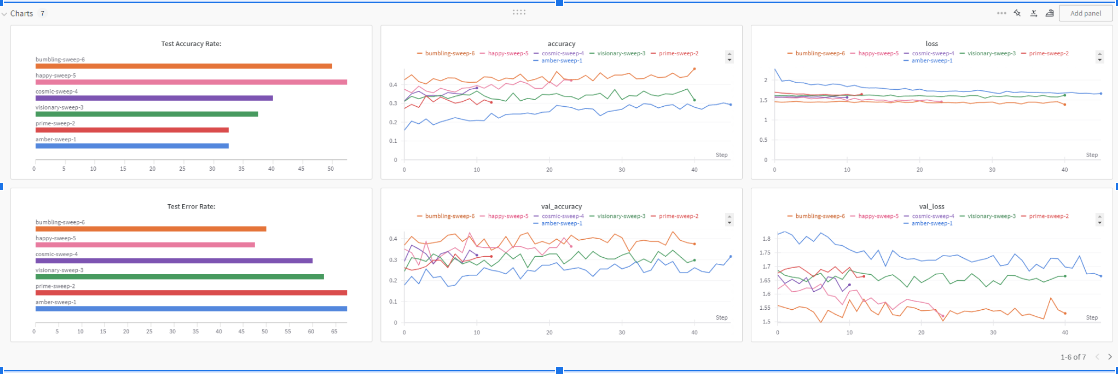

## 실험 모델 17
### optimizer 변경(test acc 가 제일높았던 80%모델에서 rmsprop-> adam로 optimizer 변경)
- learning rate = 0.00005
- batch size = 24
- kernel = (3,3)   
- Dence_filter = 255
- test accuracy(%) = 77.5
- optimizer = rmsprop-> adam
- epochs = 49
- Dence = 255   
- dropout = 30%추가


In [74]:
BATCH_SIZE = 24

In [75]:
# 모델 작업 - 함수화 
from tensorflow.keras.regularizers import l2
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [76]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.000001,
            "max" : 0.0001
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 10,
            "max" : 51 # 10에서 수정
            }
                    
        }
    }

In [77]:
# 키 입력
wandb.login(key = "본인의 키를 입력해 주세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [79]:
# wandb 모델 훈련 함수
from tensorflow. keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[early_stopping, WandbCallback(validation_data=val_batches,
                                             labels=CLASS_NAMES,
                                             predictions=10,
                                             input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [80]:
# learning rate 지정
base_learning_rate = 0.0001

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (3, 3),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "adam",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [81]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: l7vnpllo
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/l7vnpllo


In [82]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=6)

wandb: Agent Starting Run: vzpflh98 with config:
wandb: 	epoch: 31
wandb: 	learning_rate: 5.3153714203861874e-05


Epoch 1/31
31/31 [==============================] - 4s 72ms/step - loss: 2.0106 - accuracy: 0.2500 - val_loss: 1.7067 - val_accuracy: 0.2560
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 2/31
31/31 [==============================] - 2s 78ms/step - loss: 1.6385 - accuracy: 0.3427 - val_loss: 1.5932 - val_accuracy: 0.3155
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 3/31
31/31 [==============================] - 2s 72ms/step - loss: 1.4849 - accuracy: 0.3871 - val_loss: 1.5392 - val_accuracy: 0.3333- loss: 1.5012 - accuracy: 
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 2.2s


Epoch 4/31
31/31 [==============================] - 3s 79ms/step - loss: 1.4313 - accuracy: 0.3844 - val_loss: 1.4599 - val_accuracy: 0.3571
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 5/31
31/31 [==============================] - 2s 78ms/step - loss: 1.3748 - accuracy: 0.4220 - val_loss: 1.4925 - val_accuracy: 0.3452
Epoch 6/31
31/31 [==============================] - 2s 68ms/step - loss: 1.3132 - accuracy: 0.4677 - val_loss: 1.4142 - val_accuracy: 0.4107
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 7/31
31/31 [==============================] - 2s 78ms/step - loss: 1.2815 - accuracy: 0.4960 - val_loss: 1.4052 - val_accuracy: 0.4345
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.5s


Epoch 8/31
31/31 [==============================] - 2s 76ms/step - loss: 1.2667 - accuracy: 0.4785 - val_loss: 1.3347 - val_accuracy: 0.4464
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.6s


Epoch 9/31
31/31 [==============================] - 2s 74ms/step - loss: 1.1960 - accuracy: 0.5188 - val_loss: 1.3131 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.6s


Epoch 10/31
31/31 [==============================] - 2s 67ms/step - loss: 1.1665 - accuracy: 0.5538 - val_loss: 1.2788 - val_accuracy: 0.4643
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 2.0s


Epoch 11/31
31/31 [==============================] - 2s 81ms/step - loss: 1.1301 - accuracy: 0.5565 - val_loss: 1.2803 - val_accuracy: 0.4881
Epoch 12/31
31/31 [==============================] - 2s 73ms/step - loss: 1.0958 - accuracy: 0.5578 - val_loss: 1.2182 - val_accuracy: 0.4643
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 3.1s


Epoch 13/31
31/31 [==============================] - 3s 86ms/step - loss: 1.0959 - accuracy: 0.5739 - val_loss: 1.1725 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.6s


Epoch 14/31
31/31 [==============================] - 2s 70ms/step - loss: 1.0585 - accuracy: 0.6089 - val_loss: 1.3676 - val_accuracy: 0.5060
Epoch 15/31
31/31 [==============================] - 2s 69ms/step - loss: 1.0759 - accuracy: 0.5941 - val_loss: 1.2711 - val_accuracy: 0.5119
Epoch 16/31
31/31 [==============================] - 2s 77ms/step - loss: 0.9846 - accuracy: 0.6331 - val_loss: 1.2045 - val_accuracy: 0.4881s - loss: 0.9819 - accuracy: 0.63 - ETA: 0s - loss: 0.9763 - accuracy - ETA: 0s - loss: 1.0001 - accuracy: 
Epoch 17/31
31/31 [==============================] - 3s 83ms/step - loss: 1.0025 - accuracy: 0.6129 - val_loss: 1.1509 - val_accuracy: 0.5298
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 18/31
31/31 [==============================] - 2s 74ms/step - loss: 0.9161 - accuracy: 0.6707 - val_loss: 1.1335 - val_accuracy: 0.5298
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 19/31
31/31 [==============================] - 2s 81ms/step - loss: 0.9177 - accuracy: 0.6707 - val_loss: 1.1128 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 2.1s


Epoch 20/31
31/31 [==============================] - 2s 74ms/step - loss: 0.8891 - accuracy: 0.6640 - val_loss: 1.1349 - val_accuracy: 0.5298- loss: 0.8957 - accu
Epoch 21/31
31/31 [==============================] - 2s 67ms/step - loss: 0.8825 - accuracy: 0.6761 - val_loss: 1.1521 - val_accuracy: 0.5238
Epoch 22/31
31/31 [==============================] - 2s 65ms/step - loss: 0.8408 - accuracy: 0.7003 - val_loss: 1.1344 - val_accuracy: 0.56550.8644 - accura
Epoch 23/31
31/31 [==============================] - 2s 70ms/step - loss: 0.8246 - accuracy: 0.6976 - val_loss: 1.1485 - val_accuracy: 0.5298
Epoch 24/31
31/31 [==============================] - 2s 66ms/step - loss: 0.7799 - accuracy: 0.7151 - val_loss: 1.0982 - val_accuracy: 0.5714
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 25/31
31/31 [==============================] - 2s 79ms/step - loss: 0.8340 - accuracy: 0.7070 - val_loss: 1.1030 - val_accuracy: 0.5536
Epoch 26/31
31/31 [==============================] - 2s 71ms/step - loss: 0.8199 - accuracy: 0.6922 - val_loss: 1.0905 - val_accuracy: 0.5655
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.8s


Epoch 27/31
31/31 [==============================] - 2s 66ms/step - loss: 0.7520 - accuracy: 0.7231 - val_loss: 1.0585 - val_accuracy: 0.6012
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 2.1s


Epoch 28/31
31/31 [==============================] - 2s 77ms/step - loss: 0.7493 - accuracy: 0.7366 - val_loss: 0.9723 - val_accuracy: 0.660790 - accuracy: 0.
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093510-vzpflh98/files/model-best)... Done. 1.7s


Epoch 29/31
31/31 [==============================] - 2s 74ms/step - loss: 0.6987 - accuracy: 0.7661 - val_loss: 1.0666 - val_accuracy: 0.5774- loss: 0.6969 - accu
Epoch 30/31
31/31 [==============================] - 2s 70ms/step - loss: 0.7156 - accuracy: 0.7473 - val_loss: 1.0294 - val_accuracy: 0.5774
Epoch 31/31
31/31 [==============================] - 2s 65ms/step - loss: 0.7140 - accuracy: 0.7500 - val_loss: 1.0395 - val_accuracy: 0.5952
2/2 - 0s - loss: 0.8965 - accuracy: 0.7250


wandb: Agent Starting Run: oh671xx0 with config:
wandb: 	epoch: 44
wandb: 	learning_rate: 2.3754529251532848e-06


Epoch 1/44
31/31 [==============================] - 4s 73ms/step - loss: 0.6201 - accuracy: 0.8091 - val_loss: 1.0113 - val_accuracy: 0.5952
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 2.3s


Epoch 2/44
31/31 [==============================] - 2s 75ms/step - loss: 0.6290 - accuracy: 0.7903 - val_loss: 0.9986 - val_accuracy: 0.5774
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 1.7s


Epoch 3/44
31/31 [==============================] - 2s 69ms/step - loss: 0.6219 - accuracy: 0.7876 - val_loss: 0.9944 - val_accuracy: 0.6190
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 1.7s


Epoch 4/44
31/31 [==============================] - 3s 85ms/step - loss: 0.5938 - accuracy: 0.8118 - val_loss: 1.0843 - val_accuracy: 0.5714
Epoch 5/44
31/31 [==============================] - 3s 89ms/step - loss: 0.6041 - accuracy: 0.7997 - val_loss: 1.0366 - val_accuracy: 0.6071
Epoch 6/44
31/31 [==============================] - 2s 65ms/step - loss: 0.5884 - accuracy: 0.8132 - val_loss: 1.0624 - val_accuracy: 0.5655
Epoch 7/44
31/31 [==============================] - 2s 66ms/step - loss: 0.6226 - accuracy: 0.7769 - val_loss: 0.9741 - val_accuracy: 0.6310
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 1.8s


Epoch 8/44
31/31 [==============================] - 2s 69ms/step - loss: 0.6182 - accuracy: 0.7849 - val_loss: 0.9619 - val_accuracy: 0.6369
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 2.4s


Epoch 9/44
31/31 [==============================] - 2s 76ms/step - loss: 0.5784 - accuracy: 0.8132 - val_loss: 0.9875 - val_accuracy: 0.6310
Epoch 10/44
31/31 [==============================] - 2s 70ms/step - loss: 0.5990 - accuracy: 0.7809 - val_loss: 1.0159 - val_accuracy: 0.6190
Epoch 11/44
31/31 [==============================] - 2s 68ms/step - loss: 0.6080 - accuracy: 0.7823 - val_loss: 0.9431 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 1.7s


Epoch 12/44
31/31 [==============================] - 2s 80ms/step - loss: 0.6062 - accuracy: 0.7997 - val_loss: 1.0303 - val_accuracy: 0.6071
Epoch 13/44
31/31 [==============================] - 2s 68ms/step - loss: 0.6085 - accuracy: 0.7970 - val_loss: 1.0051 - val_accuracy: 0.6190
Epoch 14/44
31/31 [==============================] - 2s 69ms/step - loss: 0.5940 - accuracy: 0.7930 - val_loss: 0.9609 - val_accuracy: 0.6310
Epoch 15/44
31/31 [==============================] - 2s 64ms/step - loss: 0.6185 - accuracy: 0.7997 - val_loss: 1.0220 - val_accuracy: 0.5655
Epoch 16/44
31/31 [==============================] - 2s 66ms/step - loss: 0.5594 - accuracy: 0.8105 - val_loss: 0.9920 - val_accuracy: 0.6190
Epoch 17/44
31/31 [==============================] - 2s 66ms/step - loss: 0.6020 - accuracy: 0.8118 - val_loss: 0.9259 - val_accuracy: 0.6429
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 1.6s


Epoch 18/44
31/31 [==============================] - 2s 71ms/step - loss: 0.5913 - accuracy: 0.8011 - val_loss: 0.8832 - val_accuracy: 0.6845
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_093833-oh671xx0/files/model-best)... Done. 1.6s


Epoch 19/44
31/31 [==============================] - 2s 69ms/step - loss: 0.5908 - accuracy: 0.7930 - val_loss: 1.0285 - val_accuracy: 0.6310
Epoch 20/44
31/31 [==============================] - 2s 63ms/step - loss: 0.5757 - accuracy: 0.8118 - val_loss: 1.0428 - val_accuracy: 0.5655
Epoch 21/44
31/31 [==============================] - 2s 67ms/step - loss: 0.5527 - accuracy: 0.8239 - val_loss: 0.9789 - val_accuracy: 0.5833
Epoch 22/44
31/31 [==============================] - 2s 65ms/step - loss: 0.5619 - accuracy: 0.8159 - val_loss: 0.9720 - val_accuracy: 0.6131
Epoch 23/44
31/31 [==============================] - 2s 76ms/step - loss: 0.5924 - accuracy: 0.8038 - val_loss: 1.0543 - val_accuracy: 0.5536
Epoch 24/44
31/31 [==============================] - 2s 68ms/step - loss: 0.5565 - accuracy: 0.8239 - val_loss: 1.0788 - val_accuracy: 0.5536
Epoch 25/44
31/31 [==============================] - 2s 65ms/step - loss: 0.6272 - accuracy: 0.7836 - val_loss: 0.9871 - val_accuracy: 0.6131
Epoch 

wandb: Agent Starting Run: 4omhl6im with config:
wandb: 	epoch: 27
wandb: 	learning_rate: 8.971035974557853e-05


Epoch 1/27
31/31 [==============================] - 4s 72ms/step - loss: 0.7690 - accuracy: 0.7164 - val_loss: 1.1081 - val_accuracy: 0.5417 0s - loss: 0.747
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best)... Done. 1.7s


Epoch 2/27
31/31 [==============================] - 3s 80ms/step - loss: 0.7187 - accuracy: 0.7352 - val_loss: 1.0000 - val_accuracy: 0.5952
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best)... Done. 1.6s


Epoch 3/27
31/31 [==============================] - 2s 72ms/step - loss: 0.7051 - accuracy: 0.7581 - val_loss: 0.9945 - val_accuracy: 0.6012
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best)... Done. 1.7s


Epoch 4/27
31/31 [==============================] - 2s 72ms/step - loss: 0.6503 - accuracy: 0.7594 - val_loss: 1.0512 - val_accuracy: 0.6012: 0.6613 - accuracy
Epoch 5/27
31/31 [==============================] - 2s 67ms/step - loss: 0.6501 - accuracy: 0.7608 - val_loss: 0.9478 - val_accuracy: 0.6488
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best)... Done. 1.7s


Epoch 6/27
31/31 [==============================] - 2s 72ms/step - loss: 0.6161 - accuracy: 0.7930 - val_loss: 1.0620 - val_accuracy: 0.6012
Epoch 7/27
31/31 [==============================] - 2s 68ms/step - loss: 0.6236 - accuracy: 0.7728 - val_loss: 1.0045 - val_accuracy: 0.6131
Epoch 8/27
31/31 [==============================] - 2s 64ms/step - loss: 0.5947 - accuracy: 0.7890 - val_loss: 0.9494 - val_accuracy: 0.6429
Epoch 9/27
31/31 [==============================] - 2s 72ms/step - loss: 0.5302 - accuracy: 0.8212 - val_loss: 0.9365 - val_accuracy: 0.6429
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best)... Done. 1.7s


Epoch 10/27
31/31 [==============================] - 2s 79ms/step - loss: 0.5390 - accuracy: 0.8105 - val_loss: 1.0033 - val_accuracy: 0.6250
Epoch 11/27
31/31 [==============================] - 2s 71ms/step - loss: 0.5029 - accuracy: 0.8266 - val_loss: 0.9668 - val_accuracy: 0.6667
Epoch 12/27
31/31 [==============================] - 2s 65ms/step - loss: 0.5340 - accuracy: 0.8132 - val_loss: 0.8799 - val_accuracy: 0.6310
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094041-4omhl6im/files/model-best)... Done. 1.6s


Epoch 13/27
31/31 [==============================] - 2s 73ms/step - loss: 0.4880 - accuracy: 0.8347 - val_loss: 0.9148 - val_accuracy: 0.5952
Epoch 14/27
31/31 [==============================] - 2s 70ms/step - loss: 0.5033 - accuracy: 0.8185 - val_loss: 0.9610 - val_accuracy: 0.6607
Epoch 15/27
31/31 [==============================] - 2s 67ms/step - loss: 0.4731 - accuracy: 0.8495 - val_loss: 0.9784 - val_accuracy: 0.6310
Epoch 16/27
31/31 [==============================] - 2s 64ms/step - loss: 0.4534 - accuracy: 0.8522 - val_loss: 1.0244 - val_accuracy: 0.6190
Epoch 17/27
31/31 [==============================] - 2s 66ms/step - loss: 0.4255 - accuracy: 0.8454 - val_loss: 0.9569 - val_accuracy: 0.6369
Epoch 18/27
31/31 [==============================] - 2s 69ms/step - loss: 0.4266 - accuracy: 0.8696 - val_loss: 1.0128 - val_accuracy: 0.6131
Epoch 19/27
31/31 [==============================] - 2s 69ms/step - loss: 0.4296 - accuracy: 0.8548 - val_loss: 0.9016 - val_accuracy: 0.6845
Epoch 

wandb: Agent Starting Run: oymz5ie9 with config:
wandb: 	epoch: 49
wandb: 	learning_rate: 5.510630890837101e-05


Epoch 1/49
31/31 [==============================] - 4s 72ms/step - loss: 0.4585 - accuracy: 0.8333 - val_loss: 0.9877 - val_accuracy: 0.6131
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best)... Done. 2.1s


Epoch 2/49
31/31 [==============================] - 2s 75ms/step - loss: 0.4595 - accuracy: 0.8602 - val_loss: 0.9558 - val_accuracy: 0.6190
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best)... Done. 1.6s


Epoch 3/49
31/31 [==============================] - 2s 80ms/step - loss: 0.4557 - accuracy: 0.8401 - val_loss: 1.0136 - val_accuracy: 0.6488
Epoch 4/49
31/31 [==============================] - 2s 73ms/step - loss: 0.4197 - accuracy: 0.8522 - val_loss: 0.8686 - val_accuracy: 0.6905
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best)... Done. 1.7s


Epoch 5/49
31/31 [==============================] - 2s 72ms/step - loss: 0.4170 - accuracy: 0.8629 - val_loss: 0.9307 - val_accuracy: 0.6786
Epoch 6/49
31/31 [==============================] - 2s 75ms/step - loss: 0.3959 - accuracy: 0.8723 - val_loss: 0.8471 - val_accuracy: 0.6607 0s - loss: 0.3845 - accuracy: 0.
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best)... Done. 1.7s


Epoch 7/49
31/31 [==============================] - 2s 82ms/step - loss: 0.4174 - accuracy: 0.8589 - val_loss: 0.9997 - val_accuracy: 0.6250
Epoch 8/49
31/31 [==============================] - 2s 68ms/step - loss: 0.3435 - accuracy: 0.8871 - val_loss: 0.9812 - val_accuracy: 0.6548
Epoch 9/49
31/31 [==============================] - 2s 66ms/step - loss: 0.4002 - accuracy: 0.8629 - val_loss: 0.8824 - val_accuracy: 0.6429
Epoch 10/49
31/31 [==============================] - 2s 67ms/step - loss: 0.3663 - accuracy: 0.8790 - val_loss: 0.8728 - val_accuracy: 0.6548
Epoch 11/49
31/31 [==============================] - 2s 68ms/step - loss: 0.3707 - accuracy: 0.8710 - val_loss: 0.8879 - val_accuracy: 0.6607
Epoch 12/49
31/31 [==============================] - 2s 68ms/step - loss: 0.3962 - accuracy: 0.8737 - val_loss: 1.0011 - val_accuracy: 0.6607
Epoch 13/49
31/31 [==============================] - 2s 70ms/step - loss: 0.3581 - accuracy: 0.8817 - val_loss: 0.9262 - val_accuracy: 0.6964
Epoch 14/

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best)... Done. 1.6s


Epoch 17/49
31/31 [==============================] - 3s 83ms/step - loss: 0.3370 - accuracy: 0.8911 - val_loss: 0.9513 - val_accuracy: 0.6429
Epoch 18/49
31/31 [==============================] - 2s 65ms/step - loss: 0.3010 - accuracy: 0.9073 - val_loss: 0.8048 - val_accuracy: 0.7321ss: 0.2960 - accu
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094223-oymz5ie9/files/model-best)... Done. 1.7s


Epoch 19/49
31/31 [==============================] - 2s 69ms/step - loss: 0.2867 - accuracy: 0.9140 - val_loss: 0.9617 - val_accuracy: 0.6488
Epoch 20/49
31/31 [==============================] - 2s 66ms/step - loss: 0.2836 - accuracy: 0.9086 - val_loss: 0.9538 - val_accuracy: 0.6429
Epoch 21/49
31/31 [==============================] - 2s 66ms/step - loss: 0.2785 - accuracy: 0.9153 - val_loss: 1.0348 - val_accuracy: 0.6488
Epoch 22/49
31/31 [==============================] - 2s 65ms/step - loss: 0.2745 - accuracy: 0.9234 - val_loss: 0.8813 - val_accuracy: 0.7083
Epoch 23/49
31/31 [==============================] - 2s 64ms/step - loss: 0.2379 - accuracy: 0.9247 - val_loss: 0.9016 - val_accuracy: 0.7024
Epoch 24/49
31/31 [==============================] - 2s 62ms/step - loss: 0.2687 - accuracy: 0.9207 - val_loss: 0.9936 - val_accuracy: 0.6369
Epoch 25/49
31/31 [==============================] - 2s 71ms/step - loss: 0.2339 - accuracy: 0.9288 - val_loss: 1.0280 - val_accuracy: 0.6548
Epoch 

wandb: Agent Starting Run: l5rzvcqx with config:
wandb: 	epoch: 19
wandb: 	learning_rate: 4.364549798392269e-05


Epoch 1/19
31/31 [==============================] - 4s 69ms/step - loss: 0.3089 - accuracy: 0.9059 - val_loss: 0.9584 - val_accuracy: 0.6369
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best)... Done. 1.6s


Epoch 2/19
31/31 [==============================] - 2s 74ms/step - loss: 0.2980 - accuracy: 0.9046 - val_loss: 0.9576 - val_accuracy: 0.6607
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best)... Done. 1.7s


Epoch 3/19
31/31 [==============================] - 2s 76ms/step - loss: 0.2684 - accuracy: 0.9288 - val_loss: 0.8308 - val_accuracy: 0.7143- loss: 0.2667 - accuracy: 0.
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best)... Done. 1.8s


Epoch 4/19
31/31 [==============================] - 2s 80ms/step - loss: 0.2608 - accuracy: 0.9167 - val_loss: 0.9213 - val_accuracy: 0.6905
Epoch 5/19
31/31 [==============================] - 2s 67ms/step - loss: 0.2573 - accuracy: 0.9234 - val_loss: 1.1409 - val_accuracy: 0.6190
Epoch 6/19
31/31 [==============================] - 2s 69ms/step - loss: 0.2578 - accuracy: 0.9073 - val_loss: 0.9478 - val_accuracy: 0.6548
Epoch 7/19
31/31 [==============================] - 2s 66ms/step - loss: 0.2282 - accuracy: 0.9328 - val_loss: 0.8169 - val_accuracy: 0.7083
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best)... Done. 1.7s


Epoch 8/19
31/31 [==============================] - 2s 73ms/step - loss: 0.2371 - accuracy: 0.9341 - val_loss: 0.8937 - val_accuracy: 0.6845
Epoch 9/19
31/31 [==============================] - 2s 68ms/step - loss: 0.2332 - accuracy: 0.9261 - val_loss: 0.9154 - val_accuracy: 0.7024
Epoch 10/19
31/31 [==============================] - 2s 68ms/step - loss: 0.2244 - accuracy: 0.9328 - val_loss: 0.7502 - val_accuracy: 0.7440
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094448-l5rzvcqx/files/model-best)... Done. 1.7s


Epoch 11/19
31/31 [==============================] - 3s 89ms/step - loss: 0.2840 - accuracy: 0.9153 - val_loss: 0.9993 - val_accuracy: 0.6667
Epoch 12/19
31/31 [==============================] - 2s 66ms/step - loss: 0.2322 - accuracy: 0.9274 - val_loss: 0.9974 - val_accuracy: 0.6845
Epoch 13/19
31/31 [==============================] - 2s 68ms/step - loss: 0.2168 - accuracy: 0.9341 - val_loss: 0.8677 - val_accuracy: 0.7083
Epoch 14/19
31/31 [==============================] - 2s 65ms/step - loss: 0.2608 - accuracy: 0.9019 - val_loss: 0.8495 - val_accuracy: 0.7083
Epoch 15/19
31/31 [==============================] - 2s 67ms/step - loss: 0.1919 - accuracy: 0.9530 - val_loss: 0.8089 - val_accuracy: 0.7679
Epoch 16/19
31/31 [==============================] - 2s 66ms/step - loss: 0.2019 - accuracy: 0.9328 - val_loss: 0.8628 - val_accuracy: 0.7321
Epoch 17/19
31/31 [==============================] - 2s 65ms/step - loss: 0.2054 - accuracy: 0.9449 - val_loss: 0.8203 - val_accuracy: 0.7143
Epoch 

wandb: Agent Starting Run: 8yqqqg2w with config:
wandb: 	epoch: 23
wandb: 	learning_rate: 7.332769331645513e-05


Epoch 1/23
31/31 [==============================] - 4s 71ms/step - loss: 0.2330 - accuracy: 0.9355 - val_loss: 1.0380 - val_accuracy: 0.6429
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best)... Done. 1.6s


Epoch 2/23
31/31 [==============================] - 2s 70ms/step - loss: 0.2368 - accuracy: 0.9274 - val_loss: 1.0557 - val_accuracy: 0.6488
Epoch 3/23
31/31 [==============================] - 2s 73ms/step - loss: 0.2518 - accuracy: 0.9194 - val_loss: 0.9295 - val_accuracy: 0.6488
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best)... Done. 1.7s


Epoch 4/23
31/31 [==============================] - 2s 69ms/step - loss: 0.2622 - accuracy: 0.9153 - val_loss: 0.9336 - val_accuracy: 0.7321
Epoch 5/23
31/31 [==============================] - 2s 67ms/step - loss: 0.2138 - accuracy: 0.9355 - val_loss: 1.0841 - val_accuracy: 0.6726
Epoch 6/23
31/31 [==============================] - 2s 68ms/step - loss: 0.2126 - accuracy: 0.9355 - val_loss: 1.0319 - val_accuracy: 0.6964
Epoch 7/23
31/31 [==============================] - 2s 68ms/step - loss: 0.2253 - accuracy: 0.9382 - val_loss: 0.9949 - val_accuracy: 0.6548
Epoch 8/23
31/31 [==============================] - 2s 64ms/step - loss: 0.2175 - accuracy: 0.9368 - val_loss: 1.0369 - val_accuracy: 0.6369
Epoch 9/23
31/31 [==============================] - 3s 85ms/step - loss: 0.1968 - accuracy: 0.9435 - val_loss: 0.9112 - val_accuracy: 0.6667
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best)... Done. 1.7s


Epoch 10/23
31/31 [==============================] - 2s 73ms/step - loss: 0.1726 - accuracy: 0.9556 - val_loss: 0.7722 - val_accuracy: 0.6964
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best)... Done. 3.5s


Epoch 11/23
31/31 [==============================] - 2s 69ms/step - loss: 0.1789 - accuracy: 0.9530 - val_loss: 0.9699 - val_accuracy: 0.6845
Epoch 12/23
31/31 [==============================] - 2s 73ms/step - loss: 0.1597 - accuracy: 0.9570 - val_loss: 1.0285 - val_accuracy: 0.6786
Epoch 13/23
31/31 [==============================] - 2s 64ms/step - loss: 0.1760 - accuracy: 0.9462 - val_loss: 0.9156 - val_accuracy: 0.6905
Epoch 14/23
31/31 [==============================] - 2s 68ms/step - loss: 0.1773 - accuracy: 0.9462 - val_loss: 0.9065 - val_accuracy: 0.6845
Epoch 15/23
31/31 [==============================] - 2s 65ms/step - loss: 0.1722 - accuracy: 0.9530 - val_loss: 0.8226 - val_accuracy: 0.7202
Epoch 16/23
31/31 [==============================] - 2s 67ms/step - loss: 0.1396 - accuracy: 0.9610 - val_loss: 0.7333 - val_accuracy: 0.7381
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_094629-8yqqqg2w/files/model-best)... Done. 1.7s


Epoch 17/23
31/31 [==============================] - 2s 71ms/step - loss: 0.1364 - accuracy: 0.9610 - val_loss: 1.0581 - val_accuracy: 0.7024
Epoch 18/23
31/31 [==============================] - 2s 71ms/step - loss: 0.1570 - accuracy: 0.9624 - val_loss: 0.8954 - val_accuracy: 0.7321
Epoch 19/23
31/31 [==============================] - 2s 64ms/step - loss: 0.1446 - accuracy: 0.9543 - val_loss: 1.0285 - val_accuracy: 0.7024
Epoch 20/23
31/31 [==============================] - 2s 66ms/step - loss: 0.1419 - accuracy: 0.9570 - val_loss: 0.8319 - val_accuracy: 0.7143
Epoch 21/23
31/31 [==============================] - 2s 65ms/step - loss: 0.1072 - accuracy: 0.9772 - val_loss: 0.8421 - val_accuracy: 0.7381
Epoch 22/23
31/31 [==============================] - 2s 70ms/step - loss: 0.1501 - accuracy: 0.9624 - val_loss: 0.8754 - val_accuracy: 0.7262
Epoch 23/23
31/31 [==============================] - 2s 62ms/step - loss: 0.1618 - accuracy: 0.9570 - val_loss: 0.9322 - val_accuracy: 0.7024
2/2 - 

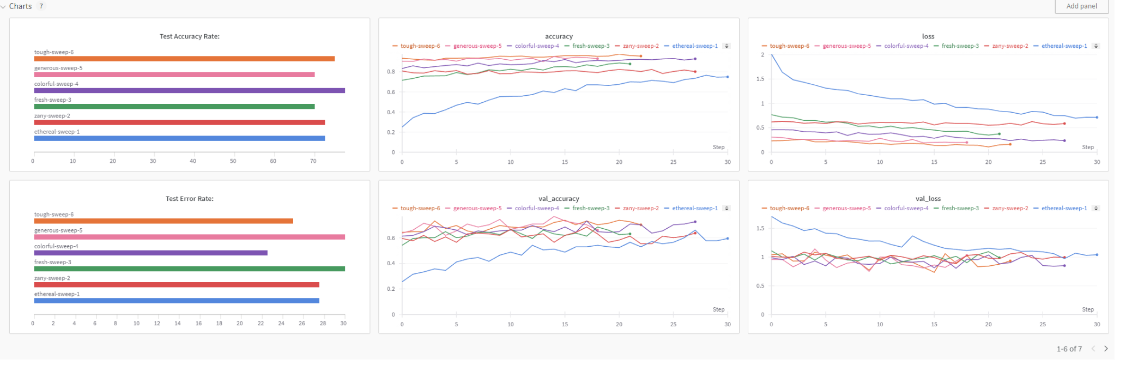

## 실험 모델 18
### epoch변경 (test acc 가 제일높았던 80%모델에서 epoch을 대폭 늘려봄)
- learning rate = 0.00009
- batch size = 24
- kernel = (3,3)   
- Dence_filter = 255
- test accuracy(%) = 67.5
- optimizer = rmsprop-
- epochs = 101
- Dence = 255   
- dropout = 30%

In [42]:
# 모델 작업 - 함수화 
from tensorflow.keras.regularizers import l2
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(255, activation='relu', kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [53]:
# wandb 활용 - 배치데이터 사용한 경우

# wandb 설치
# !pip install wandb==0.16.0

# wandb library
import wandb
from wandb.keras import WandbCallback

# sweep config 세팅
# sweep config
sweep_config = {
    "name": "본인이름", # 본인 이름 넣으세요
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
#         "learning_rate" : {
#             "min" : 0.000001,
#             "max" : 0.0001
#             },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 100,
            "max" : 101 # 10에서 수정
            }
                    
        }
    }

In [44]:
# 키 입력
wandb.login(key = "본인의 키를 입력하세요")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [54]:
# wandb 모델 훈련 함수

def train(model, config, train_batches, val_batches, test_batches, CLASS_NAMES):
    wandb.init(config=config)
    config = wandb.config

    if config.optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config.learning_rate)
        
    elif config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config.learning_rate)   
    
    elif config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config.learning_rate)
    
    else:
        raise ValueError(f"Unsupported optimizer: {config.optimizer}")

    # using gpu
    with tf.device('/GPU:0'):
        model.compile(optimizer=optimizer, loss=config.loss, metrics=config.metrics)

        model.fit(train_batches,
                  epochs=config.epoch,
                  steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
                  batch_size=config.batch_size,
                  validation_data=val_batches,
                  validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
                  callbacks=[WandbCallback(validation_data=val_batches,
                                            labels=CLASS_NAMES,
                                            predictions=10,
                                            input_type="images")])

        test_loss, test_accuracy = model.evaluate(test_batches, verbose=2)

        wandb.log({"Test Accuracy Rate:": round(test_accuracy * 100, 2),
               "Test Error Rate:": round((1 - test_accuracy) * 100, 2)})

In [55]:
# learning rate 지정
base_learning_rate = 0.00009

# 모델빌드
with tf.device('/GPU:0'):
    cnn_model = build_model()  # 이 모델이름을 아래 wandb.agent 부분에 넣습니다
    cnn_config = {             # 이 config 이름을 아래 wandb.agent 부분에 넣습니다
    "input": (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    "kernel": (3, 3),
    "activation": "relu",
    "learning_rate": base_learning_rate,
    "optimizer": "rmsprop",  # 모델 옵티마이저 넣어주세요!
    "loss": "sparse_categorical_crossentropy",
    "metrics": ["accuracy"],
    "epoch": EPOCHS,
    "batch_size": BATCH_SIZE
}

In [56]:
# sweep 이름 뒤에 타임스탬프 표기
import datetime

# Generate a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Update the sweep name with the timestamp
# sweep_config["name"] = f"(본인이름)_{timestamp}"
sweep_config["name"] = f"본인이름{timestamp}"

# Start the sweep with the updated configuration
sweep_id = wandb.sweep(sweep_config,
                       entity = "aiffel_7th",
                       project = "Jellyfish")

Create sweep with ID: 6ma9z7zt
Sweep URL: https://wandb.ai/aiffel_7th/Jellyfish/sweeps/6ma9z7zt


In [57]:
# index로 준비
CLASS_NAMES = [0, 1, 2, 3, 4, 5]

# run the sweep
wandb.agent(sweep_id,              # 여기 모델명 위에꺼 # 여기 config이름 위에꺼
            function=lambda: train(cnn_model, cnn_config, train_bat, val_bat, test_bat, CLASS_NAMES),
            count=1)

wandb: Agent Starting Run: ojktk9ng with config:
wandb: 	epoch: 101


Epoch 1/101
31/31 [==============================] - 4s 70ms/step - loss: 4.3106 - accuracy: 0.2231 - val_loss: 1.6136 - val_accuracy: 0.3571
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 2/101
31/31 [==============================] - 2s 73ms/step - loss: 1.6685 - accuracy: 0.3105 - val_loss: 1.6533 - val_accuracy: 0.2976
Epoch 3/101
31/31 [==============================] - 2s 67ms/step - loss: 1.5389 - accuracy: 0.3777 - val_loss: 1.6377 - val_accuracy: 0.3571
Epoch 4/101
31/31 [==============================] - 2s 65ms/step - loss: 1.5004 - accuracy: 0.3871 - val_loss: 1.5577 - val_accuracy: 0.3393
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 5/101
31/31 [==============================] - 2s 71ms/step - loss: 1.3975 - accuracy: 0.4019 - val_loss: 1.4445 - val_accuracy: 0.4167
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 6/101
31/31 [==============================] - 2s 75ms/step - loss: 1.3647 - accuracy: 0.4570 - val_loss: 1.4154 - val_accuracy: 0.3929
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 7/101
31/31 [==============================] - 2s 70ms/step - loss: 1.4119 - accuracy: 0.4220 - val_loss: 1.4292 - val_accuracy: 0.3929
Epoch 8/101
31/31 [==============================] - 2s 66ms/step - loss: 1.3039 - accuracy: 0.4597 - val_loss: 1.3995 - val_accuracy: 0.4881
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 9/101
31/31 [==============================] - 2s 73ms/step - loss: 1.3039 - accuracy: 0.4570 - val_loss: 1.4584 - val_accuracy: 0.3929
Epoch 10/101
31/31 [==============================] - 2s 70ms/step - loss: 1.2143 - accuracy: 0.5067 - val_loss: 1.3548 - val_accuracy: 0.4881
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.0s


Epoch 11/101
31/31 [==============================] - 2s 72ms/step - loss: 1.2140 - accuracy: 0.4946 - val_loss: 1.4286 - val_accuracy: 0.4286
Epoch 12/101
31/31 [==============================] - 2s 62ms/step - loss: 1.1616 - accuracy: 0.5255 - val_loss: 1.4334 - val_accuracy: 0.4762
Epoch 13/101
31/31 [==============================] - 2s 66ms/step - loss: 1.1423 - accuracy: 0.5484 - val_loss: 1.3191 - val_accuracy: 0.5179
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.0s


Epoch 14/101
31/31 [==============================] - 2s 73ms/step - loss: 1.0800 - accuracy: 0.5806 - val_loss: 1.4010 - val_accuracy: 0.4405
Epoch 15/101
31/31 [==============================] - 2s 66ms/step - loss: 1.0940 - accuracy: 0.5551 - val_loss: 1.4512 - val_accuracy: 0.4167
Epoch 16/101
31/31 [==============================] - 2s 69ms/step - loss: 1.0910 - accuracy: 0.5659 - val_loss: 1.2849 - val_accuracy: 0.5179
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 0.9s


Epoch 17/101
31/31 [==============================] - 2s 71ms/step - loss: 1.0451 - accuracy: 0.5927 - val_loss: 1.2572 - val_accuracy: 0.5238
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 18/101
31/31 [==============================] - 2s 72ms/step - loss: 1.0075 - accuracy: 0.5901 - val_loss: 1.3741 - val_accuracy: 0.4762- loss: 1.0129 - accuracy: 
Epoch 19/101
31/31 [==============================] - 2s 66ms/step - loss: 0.9798 - accuracy: 0.6048 - val_loss: 1.1578 - val_accuracy: 0.5119
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 20/101
31/31 [==============================] - 2s 73ms/step - loss: 0.9835 - accuracy: 0.5941 - val_loss: 1.3185 - val_accuracy: 0.5000
Epoch 21/101
31/31 [==============================] - 2s 64ms/step - loss: 0.9426 - accuracy: 0.6290 - val_loss: 1.3480 - val_accuracy: 0.4881
Epoch 22/101
31/31 [==============================] - 2s 64ms/step - loss: 0.9048 - accuracy: 0.6505 - val_loss: 1.1386 - val_accuracy: 0.5417
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.0s


Epoch 23/101
31/31 [==============================] - 2s 67ms/step - loss: 0.9208 - accuracy: 0.6169 - val_loss: 1.1247 - val_accuracy: 0.5536
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 24/101
31/31 [==============================] - 2s 72ms/step - loss: 0.8646 - accuracy: 0.6626 - val_loss: 1.2787 - val_accuracy: 0.4702
Epoch 25/101
31/31 [==============================] - 2s 64ms/step - loss: 0.8620 - accuracy: 0.6868 - val_loss: 1.1729 - val_accuracy: 0.6012
Epoch 26/101
31/31 [==============================] - 2s 67ms/step - loss: 0.8501 - accuracy: 0.6815 - val_loss: 1.2066 - val_accuracy: 0.5595
Epoch 27/101
31/31 [==============================] - 2s 78ms/step - loss: 0.8611 - accuracy: 0.6626 - val_loss: 1.1679 - val_accuracy: 0.5595
Epoch 28/101
31/31 [==============================] - 3s 84ms/step - loss: 0.7699 - accuracy: 0.7298 - val_loss: 1.1618 - val_accuracy: 0.5595
Epoch 29/101
31/31 [==============================] - 2s 65ms/step - loss: 0.8078 - accuracy: 0.7016 - val_loss: 1.1062 - val_accuracy: 0.5952
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 30/101
31/31 [==============================] - 2s 69ms/step - loss: 0.7425 - accuracy: 0.7285 - val_loss: 1.2435 - val_accuracy: 0.5536
Epoch 31/101
31/31 [==============================] - 2s 66ms/step - loss: 0.7810 - accuracy: 0.7151 - val_loss: 1.2301 - val_accuracy: 0.5298
Epoch 32/101
31/31 [==============================] - 2s 63ms/step - loss: 0.6920 - accuracy: 0.7406 - val_loss: 1.1068 - val_accuracy: 0.6071
Epoch 33/101
31/31 [==============================] - 2s 70ms/step - loss: 0.7251 - accuracy: 0.7406 - val_loss: 1.1006 - val_accuracy: 0.6131ss: 0.7465 - accu
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 34/101
31/31 [==============================] - 2s 72ms/step - loss: 0.7025 - accuracy: 0.7406 - val_loss: 1.0629 - val_accuracy: 0.5893
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.0s


Epoch 35/101
31/31 [==============================] - 2s 68ms/step - loss: 0.7091 - accuracy: 0.7272 - val_loss: 1.0558 - val_accuracy: 0.6190
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 36/101
31/31 [==============================] - 2s 70ms/step - loss: 0.6642 - accuracy: 0.7661 - val_loss: 1.1340 - val_accuracy: 0.6131
Epoch 37/101
31/31 [==============================] - 2s 67ms/step - loss: 0.6339 - accuracy: 0.7728 - val_loss: 1.2814 - val_accuracy: 0.5536
Epoch 38/101
31/31 [==============================] - 2s 69ms/step - loss: 0.6063 - accuracy: 0.7863 - val_loss: 0.9592 - val_accuracy: 0.6250
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.8s


Epoch 39/101
31/31 [==============================] - 2s 72ms/step - loss: 0.6233 - accuracy: 0.7769 - val_loss: 1.1245 - val_accuracy: 0.5952
Epoch 40/101
31/31 [==============================] - 2s 62ms/step - loss: 0.6297 - accuracy: 0.7661 - val_loss: 1.1426 - val_accuracy: 0.6131
Epoch 41/101
31/31 [==============================] - 2s 64ms/step - loss: 0.5732 - accuracy: 0.7917 - val_loss: 0.9844 - val_accuracy: 0.6488
Epoch 42/101
31/31 [==============================] - 2s 68ms/step - loss: 0.5766 - accuracy: 0.7728 - val_loss: 1.0225 - val_accuracy: 0.6250
Epoch 43/101
31/31 [==============================] - 2s 64ms/step - loss: 0.5868 - accuracy: 0.7849 - val_loss: 1.0398 - val_accuracy: 0.6250
Epoch 44/101
31/31 [==============================] - 2s 68ms/step - loss: 0.5157 - accuracy: 0.8239 - val_loss: 1.0858 - val_accuracy: 0.6250
Epoch 45/101
31/31 [==============================] - 2s 65ms/step - loss: 0.5433 - accuracy: 0.8038 - val_loss: 1.1066 - val_accuracy: 0.5833

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.3s


Epoch 52/101
31/31 [==============================] - 2s 67ms/step - loss: 0.4360 - accuracy: 0.8441 - val_loss: 0.9482 - val_accuracy: 0.6369- loss: 0.4033 - accuracy
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best/assets


wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 53/101
31/31 [==============================] - 2s 67ms/step - loss: 0.4089 - accuracy: 0.8575 - val_loss: 0.9764 - val_accuracy: 0.6726
Epoch 54/101
31/31 [==============================] - 2s 70ms/step - loss: 0.4243 - accuracy: 0.8495 - val_loss: 0.9560 - val_accuracy: 0.6667
Epoch 55/101
31/31 [==============================] - 2s 62ms/step - loss: 0.3751 - accuracy: 0.8737 - val_loss: 0.9498 - val_accuracy: 0.6905
Epoch 56/101
31/31 [==============================] - 2s 64ms/step - loss: 0.3632 - accuracy: 0.8750 - val_loss: 1.1182 - val_accuracy: 0.6190
Epoch 57/101
31/31 [==============================] - 2s 66ms/step - loss: 0.4248 - accuracy: 0.8602 - val_loss: 1.2294 - val_accuracy: 0.6429loss: 0.4236 - accuracy: 
Epoch 58/101
31/31 [==============================] - 2s 64ms/step - loss: 0.3510 - accuracy: 0.8696 - val_loss: 1.1802 - val_accuracy: 0.5952
Epoch 59/101
31/31 [==============================] - 2s 69ms/step - loss: 0.4191 - accuracy: 0.8589 - val_loss: 0.99

wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20240111_150849-ojktk9ng/files/model-best)... Done. 1.1s


Epoch 92/101
31/31 [==============================] - 2s 75ms/step - loss: 0.1827 - accuracy: 0.9409 - val_loss: 1.0599 - val_accuracy: 0.7202
Epoch 93/101
31/31 [==============================] - 2s 63ms/step - loss: 0.1532 - accuracy: 0.9516 - val_loss: 1.1494 - val_accuracy: 0.6964
Epoch 94/101
31/31 [==============================] - 2s 64ms/step - loss: 0.1678 - accuracy: 0.9489 - val_loss: 1.1995 - val_accuracy: 0.6845
Epoch 95/101
31/31 [==============================] - 2s 64ms/step - loss: 0.1348 - accuracy: 0.9651 - val_loss: 1.1134 - val_accuracy: 0.6548
Epoch 96/101
31/31 [==============================] - 2s 75ms/step - loss: 0.1470 - accuracy: 0.9489 - val_loss: 0.9297 - val_accuracy: 0.7381
Epoch 97/101
31/31 [==============================] - 2s 63ms/step - loss: 0.1602 - accuracy: 0.9462 - val_loss: 1.1508 - val_accuracy: 0.6905
Epoch 98/101
31/31 [==============================] - 2s 67ms/step - loss: 0.1507 - accuracy: 0.9516 - val_loss: 1.1501 - val_accuracy: 0.7024

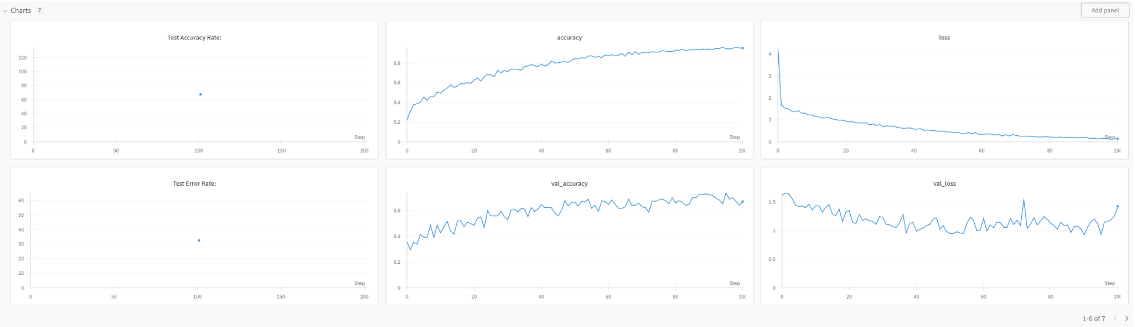

---

# ✅ 종합 ✅

## Lesson learned 1. 배치 사이즈와 학습률의 상관관계
- 배치사이즈에 따라 한번에 학습하는 양을 나눴기 때문에 배치 사이즈가 커지면 학습률을 더 적게 설정해야 할 것 같아서 증명을 해보기로 했다.
    - [Case1] 배치사이즈=30으로 설정 시, 학습률=0.00004일 때 test_accuracy=72.5
    - [Case2] 배치사이즈=16으로 설정 시, 학습률=0.0008일 때 test_accuracy=70
    - [Case3] 배치사이즈=24로 설정 시, 학습률=0.0001일 때 test_accuracy=67.5
    - [Case4] 배치사이즈=30으로 설정 시, 학습률=0.0001일 때 test_accuracy=77.5

👉 배치사이즈를 통해서 미니배치 형식으로 트레이닝 시 **학습률과 배치사이즈는 반비례하게 설정**해야 모델성능이 좋다!!!<br>
    - [Case1, 4 비교] 학습률이 작다고 무조건 좋은 accuracy가 나오진 않는다.


## Lesson learned 2.
- epoch을 100으로 늘린 경우, train / validation accuracy, loss 그래프가 이상적으로 수렴하는 그래프가 나옴
- epoch 값에 비해 모델 layer가 너무 얕아서 과대적합을 의심 : test accuracy 67.5%

👉 epoch 수를 대폭 늘린 부분은 이상적인 그래프를 얻게 된 좋은 시도였으나 과적합 위험이 있어서 규제기법을 늘리거나 skip connection 등 과적합방지를 위한 추가 기법이 필요


## Lesson learned 3. 최대 성능 : test accuracy 80% 
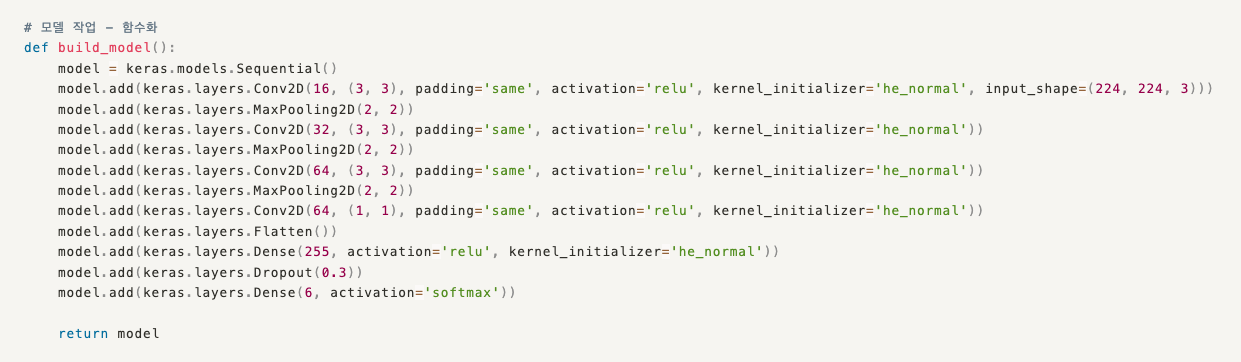
**CNN model**
- 배치사이즈 : 24
- optimizer : RMSprop
- kernel size : 3x3
- Dense node 255

# Lesson learned 4. 향후 시도해볼만한 사항
- 데이터 전처리 
    - 데이터 수가 900여개로 현저히 부족한 한계 극복
        👉 데이터 추가 : 새로운 이미지 수집
    - 일반화 성능 향상(강건성)을 위해
        👉 데이터 증강 시도 : 색상 조정(밝기), 노이즈 추가(랜덤노이즈추가), 기하학적 변형(이미지 기울임, 비틀기등)  


- 모델 구현 및 학습
    - W&B는 일정 범위 내에서 최적의 파라미터 조합을 찾아줌.
    실험하고자 하는 하이퍼파라미터 외의 조건(학습률, 에폭 등)이 범위 내에서 변경됨.
    (파라미터 범위는 고정하여 동일한 조건에서 시도하더라도)
        👉 실험하고자 하는 특정 하이퍼파라미터만 변경하는 방식. (다른 조건 완전 Fix) 
- padding을 사용하지 않거나 횟수 줄이기
    👉 모델 층이 얕으므로 특성 추출에 방해되지 않도록.
- k-fold교차검증방법 활용 
    👉 적은 datasets으로 인한 과적합 방지(데이터 활용 극대화), 일반화 성능 향상 목적.
- 앞선 개선사항을 적용하여 모델을 깊게 쌓아보기, 다양한 모델 구조 적용해보기

---

# 제품화

## 모델 특징 
- 데이터셋이 적은 분류 모델
  - 희귀 데이터 : 전문분야라 쉽게 데이터셋을 구하기 어려움
  - 모델의 층을 얕게 설계함
  👉 적은 양의 데이터를 갖고 전문가 성능을 내기 휘한 서비스에 적합한 모델

## 응용 분야
- 해파리 중 유해종을 분류하여 해파리 피해로 인한 물고기 폐사를 사전에 방지
  - 해파리 사전 수매 작업으로 어업 피해 방지 및 어획량 확보
    - 피해 실사례 뉴스 : https://v.daum.net/v/20220814214351423
- 해파리인식앱 서비스
    - 식물 사진을 찍으면 AI가 식물을 알려주는 앱처럼 일반인이 해파리를 사진찍으면 해파리 종 정보와 도감을 제공 

## 개선사항
- 바닷속에서 Object Detection이 가능한 로봇 제작 기술 접목
  - 단순 image classification을 넘어서 바닷속 여러 생물에 대해 object detection을 선행 -> 해파리종에 대한 세부 분류 작업
- 유해종 라벨링 추가
  - 상용화를 위해 다수의 해파리 종 데이터셋을 추가하고, 유해종에 대한 추가 라벨링으로 해파리 피해를 최소화하는데 활용
- 해파리 처리 방식 및 도구 디벨롭(해파리 특성 활용, 리소스 최소화하는 방향)


---
# 회고

## 이슬
### keep:
- 팀원간의 소통이 잘 되어 프로젝트를 진행하는데 큰 어려움이 없었습니다. 최강의 팀플레이를 했다고 자신..!
- 기존에 함수화해둔 시각화나 데이터셋을 만드는 코드를 다시 사용했고, wandb로 모델학습을 시키는 부분도 함수화해서 사용하는 시도를 해보았습니다.


### problem:
- 짧은 시간내에 wandb라는 새로운 툴을 이용해서 프로젝트의 결과를 시각화 하는게 쉽지 않았습니다. 다행히 wandb 툴 사용을 포기하기 직전 사용방식에 대한 이해가 조금씩 되어서 다행이었지만, 여전히 wandb의 시각데이터를 읽고 해석하는게 쉽지 않습니다.
- 백지상태의 노트북에 코드를 채워가는게 정말 어렵다는걸 다시 깨달았습니다. 데이터 폴더에서부터 데이터를 꺼내오고 시각화 하는 과정이 노드의 베이스코드를 따라가면서 작업하던 때와 다르게 낯설고 어려웠습니다.
- 여전히 데이터셋을 tf.instance로 만들었을때 데이터증강이나 kfold 등 익숙한 데이터셋을 사용할때와는 다르게 에러해결이 어려웠습니다.


### try:
- 주말에는 꼭 캐글 노트북의 데이터를 가져와서 이번 프로젝트에서 진행했던 방식처럼 코드를 만들어보고 노트북을 정답지 삼아 공부를 해볼수 있을것 같습니다. 단순히 캐글 노트북 필사를 해야겠다고 생각만 했는데, 구체적으로 시도해봐야겠습니다.
- tf instance를 활용한 노트북 자료를 찾고 공부해보려고합니다.

---

## 김양희
### keep:
- 지금까지의 학습 내용을 폭 넓게 적용해보았습니다. 
(데이터 특징에 따른 전처리 방향성, 함수화하면 편리한 코드, 모델 구현 및 향상 방법 등)
- 오류를 맞닥뜨리는 부담감이 예전에 비해 완화되어 해결한 경우가 소폭 늘어났습니다.
- 팀원 간 소통이 원활하여 자유로운 아이디어 공유 및 시도가 가능했고, 역할 분담과 주요 과업 진행이 빠르게 이루어졌습니다.


### problem:
- W&B 코드, 모델 구현, GPU 활용하는 코드를 함께 적용하는 과정에서 몇 가지 오류가 반복되는 무한 오류에 빠졌습니다.
- 짧은 시간 안에 W&B라는 새로운 툴을 빠르게 익히고 활용하는 것이 쉽지는 않았습니다.
- 모델 성능 향상 자체가 쉽지 않았고, 다양한 하이퍼파라미터와 모델 구조를 적용해보지는 못했습니다.


### try:
- 해결하지 못한 오류 해결해보기
- 데이터셋 보강하는 방법 찾아보고 적용해보기
- 모델 성능 향상시켜보기 (+Case 별로 적절한 하이퍼파라미터, 모델 구조 등을 확립하기)
- Callbacks&WandB 익히며 활용해보기
- 위의 내용들과 전체 과정을 자다가 물어봐도 대답할 수 있도록 반복 연습 & 숙달시키기!!

---

## 이승환
### keep:
- 다양한 파라미터, 모델구조 등을 여러방면으로 학습을 시켰다.
- 노드에서 배운 내용들을 적용할 수 있었다.
- 팀원분들 간 소통에 큰 어려움없이 문제를 해결하고 학습 진행이 잘 되었다.


### problem:
- 코드를 구현하면서 그래프 시각화 하는 부분이 많이 부족했다.
- 전처리 하는 과정에서 어려움이 있었다.
- WandB를 사용하는 과정에 이해에 어려움이 있었다.
- 다양한 파라미터를 정리하고 실행하는 부분이 부족했다.


### try:
- 그래프 시각화 부분을 다양한 플랫폼을 활용하여 배워야겠다.
- 코드 전처리하는 과정을 노드를 다시 학습하며 배워야겠다.
- WandB 사용하는 부분도 추가적인 학습을 해야겠다.
- 다양한 파라미터를 적용하기 전 변경할 자료들을 정리 후 차근차근 적용하면서 결과 값을 얻어야겠다.

---

## 전민규
### keep:
- 이번 DLthon을 진행하면서 팀원들과 의사소통하며 같이 발전하고 새로운시도들을 통해 배워갔던거같습니다
- 혼자라면 시간내에 시도하지 못했을거같은 실험들을 팀원들과 역할분담을 진행하며 같이 소통하여 많고 다양한 시도들을 진행할수있었습니다.
- 각자 데이터에 대한 이해가 다른만큼 여러가지방면에서 데이터셋을 분석하고 처리할수있었습니다.
- 오류가 많이 발생했지만 다양한시각과 팀원들과의 소통으로 잘 해결했던거같습니다.
- w&b툴을 처음 써봤고 이해가 안갔지만 팀원들과 상의후 방법들을 찾아보았더니 w&b툴에대한 이해와 활용도가 높아진거같습니다.
- 팀프로젝트는 처음이라 어떻게 시도해야할지 막막했지만 팀원들과 원활한 의사소통으로 빠르게 작업을 시작할수있었던거같다. 
- 오류나 다양한 문제를 직면했을때 팀원들과의 시도를 통해 다양한 해결방법과 시각으로 다가갈수있어서 너무좋았고 실력향상에 도움이 많이된것같다.

### problem:
- w&b툴을 처음쓰다보니 사용법과 다양한 옵션들 그리고 활용하는 방안을 생각하고 실행하는것에 시간을 많이쓰고 오류가 많았던거같다.
- 처음에 다양한 모델의 구조를 각각 시도해보는과정에서resnet18을 사용해보았는대 데이터셋이 적어서그런지 성능이 생각보다 너무 좋지않게 나왔다. 
- 데이터셋이 현저히 적어 어떻게해야 모델의 성능을 높여야할지 고민하는과정과 다양한 시도들에대해 shape문제, w&b와 활용하는 방법등 다양한 문제가 생겼다.
- 모델의 성능을 높이기위해 다양한 방법을 시도했지만 기대했던것보다 모델의 성능이 엄청 높거나 좋게 나오지는 않은것같다.


### try:
- 데이터셋이 적기때문에 모델의 구조를 얕게쌓았고 그로인해 과적합이 많이 발생했던것같아, 더많은 데이터셋을 가져오거나 과적합을 방지할수있는 다양한 방법들을 추가로 시도해보아야겠다.
- cnn구조뿐만아니라 다양한 네트워크의 장점들을 활용하여 다른모델의 구조로 변경하여 시도해봐야겠다.
- 에폭을 100으로 대폭향상시켰더니 그래프자체는 이상적인 모양으로 수렴하는것을 알수있었다. 에폭을 늘리는대신에 과적합이 발생하여 testacc는 떨어졌지만 그래프가 이상적으로나와 다양한 과적합 규제방법을통해 에폭을 늘렸을때의 testacc를 높이는 방법을 시도해보아야겠다. 
- w&b툴을 사용하는방법이 아직 완전히 익숙하지는 않은거같지만 활용시 좋은 성능을 비교할수있는 툴이기때문에 자세히 더 알아보아야겠다.
